In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.metrics import mean_squared_error

FOLDER_PATH = path = os.path.join("datasets", "food_demand")


def load_data(filename):
    file_path = os.path.join(FOLDER_PATH, filename)
    return pd.read_csv(file_path)

# Loading the data

In [2]:
center_info = load_data("fulfilment_center_info.csv")
meal_info = load_data("meal_info.csv")
data = load_data("train.csv")

# First look over the data

In [3]:
center_info

center_id  city_code  region_code center_type  op_area
0          11        679           56      TYPE_A      3.7
1          13        590           56      TYPE_B      6.7
2         124        590           56      TYPE_C      4.0
3          66        648           34      TYPE_A      4.1
4          94        632           34      TYPE_C      3.6
..        ...        ...          ...         ...      ...
72         53        590           56      TYPE_A      3.8
73         30        604           56      TYPE_A      3.5
74         76        614           85      TYPE_A      3.0
75         68        676           34      TYPE_B      4.1
76         51        638           56      TYPE_A      7.0

[77 rows x 5 columns]

In [4]:
meal_info

meal_id      category      cuisine
0      1885     Beverages         Thai
1      1993     Beverages         Thai
2      2539     Beverages         Thai
3      1248     Beverages       Indian
4      2631     Beverages       Indian
5      1311        Extras         Thai
6      1062     Beverages      Italian
7      1778     Beverages      Italian
8      1803        Extras         Thai
9      1198        Extras         Thai
10     2707     Beverages      Italian
11     1847          Soup         Thai
12     1438          Soup         Thai
13     2494          Soup         Thai
14     2760  Other Snacks         Thai
15     2490         Salad      Italian
16     1109     Rice Bowl       Indian
17     2290     Rice Bowl       Indian
18     1525  Other Snacks         Thai
19     2704  Other Snacks         Thai
20     1878      Starters         Thai
21     2640      Starters         Thai
22     2577      Starters         Thai
23     1754      Sandwich      Italian
24     1971      Sandwich      Italian
25     2306         Pasta      Italian
26     2139     Beverages       Indian
27     2826      Sandwich      Italian
28     2664         Salad      Italian
29     2569         Salad      Italian
30     1230     Beverages  Continental
31     1207     Beverages  Continental
32     2322     Beverages  Continental
33     2492        Desert       Indian
34     1216         Pasta      Italian
35     1727     Rice Bowl       Indian
36     1902       Biryani       Indian
37     1247       Biryani       Indian
38     2304        Desert       Indian
39     1543        Desert       Indian
40     1770       Biryani       Indian
41     2126         Pasta      Italian
42     1558         Pizza  Continental
43     2581         Pizza  Continental
44     1962         Pizza  Continental
45     1571          Fish  Continental
46     2956          Fish  Continental
47     2104          Fish  Continental
48     2444       Seafood  Continental
49     2867       Seafood  Continental
50     1445       Seafood  Continental

In [5]:
data

id  week  center_id  meal_id  checkout_price  base_price  \
0       1379560     1         55     1885          136.83      152.29   
1       1466964     1         55     1993          136.83      135.83   
2       1346989     1         55     2539          134.86      135.86   
3       1338232     1         55     2139          339.50      437.53   
4       1448490     1         55     2631          243.50      242.50   
...         ...   ...        ...      ...             ...         ...   
456543  1271326   145         61     1543          484.09      484.09   
456544  1062036   145         61     2304          482.09      482.09   
456545  1110849   145         61     2664          237.68      321.07   
456546  1147725   145         61     2569          243.50      313.34   
456547  1361984   145         61     2490          292.03      290.03   

        emailer_for_promotion  homepage_featured  num_orders  
0                           0                  0         177  
1                           0                  0         270  
2                           0                  0         189  
3                           0                  0          54  
4                           0                  0          40  
...                       ...                ...         ...  
456543                      0                  0          68  
456544                      0                  0          42  
456545                      0                  0         501  
456546                      0                  0         729  
456547                      0                  0         162  

[456548 rows x 9 columns]

# Checking for null values

In [6]:
center_info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [7]:
meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


# Check if every meal and center in the dataset have entries

In [9]:
data["center_id"].value_counts()


13     7046
10     7015
52     6993
43     6970
67     6915
       ... 
139    4627
57     4501
162    4366
41     4083
91     3432
Name: center_id, Length: 77, dtype: int64

In [10]:
data['center_id'].isin(center_info['center_id']).value_counts()

True    456548
Name: center_id, dtype: int64

All center ids in the data set exist

In [11]:
data['meal_id'].isin(meal_info['meal_id']).value_counts()


True    456548
Name: meal_id, dtype: int64

All meal ids in the dataset exist

# Splitting data set into train/test sets

Normally, we'd want to split the data randomly and balanced. As such:

In [12]:
# from sklearn.model_selection import train_test_split

# train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

However, in our situation, we're working with a data set that has information for each week and the final purpose is to use information from previous weeks to predict the demand for future weeks. As such, the split above is not correct as it will result in gaps of info in the training set and past week data in the test set. We should keep the data of the last 20% (or less) of weeks in the set as the test set. EX: We will train on weeks 1-125 and predict weeks 126-145.
We will try and keep in the test set the last 10 weeks of data.

In [13]:
data['week'].value_counts()

122    3359
105    3348
106    3347
140    3332
123    3331
       ... 
13     2838
12     2831
14     2830
7      2795
8      2786
Name: week, Length: 145, dtype: int64

<Axes: xlabel='week', ylabel='count'>

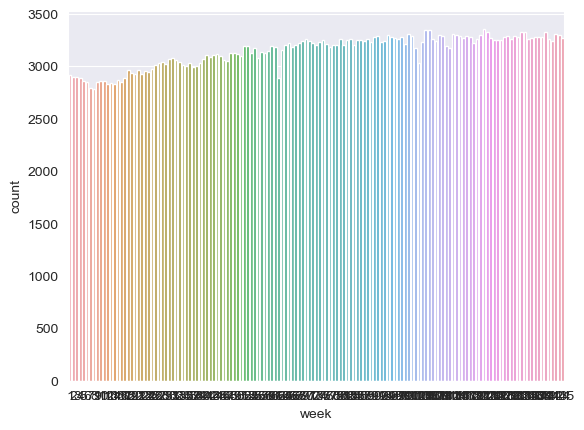

In [14]:
import seaborn as sns

sns.countplot(x="week", data=data)

Looks fine, every week has similar amounts of data.

Let's include in the test set weeks 131-145

In [15]:
train_set = data[data["week"] <= 135]
test_set = data[data["week"] > 135]

# Merging the train into one data frame by joining with the centers and meals

In [16]:
full_train_data = train_set.merge(center_info, on="center_id", how="inner")
full_train_data = full_train_data.merge(meal_info, on="meal_id", how="inner")

In [17]:
full_train_data

id  week  center_id  meal_id  checkout_price  base_price  \
0       1379560     1         55     1885          136.83      152.29   
1       1018704     2         55     1885          135.83      152.29   
2       1196273     3         55     1885          132.92      133.92   
3       1116527     4         55     1885          135.86      134.86   
4       1343872     5         55     1885          146.50      147.50   
...         ...   ...        ...      ...             ...         ...   
423722  1282954   131         61     2104          445.29      630.53   
423723  1094245   132         61     2104          435.53      630.53   
423724  1380866   133         61     2104          601.43      630.53   
423725  1111394   134         61     2104          600.43      631.53   
423726  1439333   135         61     2104          602.43      631.53   

        emailer_for_promotion  homepage_featured  num_orders  city_code  \
0                           0                  0         177        647   
1                           0                  0         323        647   
2                           0                  0          96        647   
3                           0                  0         163        647   
4                           0                  0         215        647   
...                       ...                ...         ...        ...   
423722                      0                  1         270        473   
423723                      0                  1         339        473   
423724                      0                  1         107        473   
423725                      0                  1          41        473   
423726                      0                  1          28        473   

        region_code center_type  op_area   category      cuisine  
0                56      TYPE_C      2.0  Beverages         Thai  
1                56      TYPE_C      2.0  Beverages         Thai  
2                56      TYPE_C      2.0  Beverages         Thai  
3                56      TYPE_C      2.0  Beverages         Thai  
4                56      TYPE_C      2.0  Beverages         Thai  
...             ...         ...      ...        ...          ...  
423722           77      TYPE_A      4.5       Fish  Continental  
423723           77      TYPE_A      4.5       Fish  Continental  
423724           77      TYPE_A      4.5       Fish  Continental  
423725           77      TYPE_A      4.5       Fish  Continental  
423726           77      TYPE_A      4.5       Fish  Continental  

[423727 rows x 15 columns]

# Checking numerical values

In [18]:
full_train_data.describe()

id           week      center_id        meal_id  \
count  4.237270e+05  423727.000000  423727.000000  423727.000000   
mean   1.249964e+06      69.677332      82.109469    2023.956295   
std    1.443431e+05      38.686607      45.977420     547.370379   
min    1.000000e+06       1.000000      10.000000    1062.000000   
25%    1.124878e+06      37.000000      43.000000    1558.000000   
50%    1.249955e+06      70.000000      76.000000    1971.000000   
75%    1.374949e+06     103.000000     110.000000    2539.000000   
max    1.499999e+06     135.000000     186.000000    2956.000000   

       checkout_price     base_price  emailer_for_promotion  \
count   423727.000000  423727.000000          423727.000000   
mean       331.526166     353.732761               0.083353   
std        153.085823     160.919513               0.276416   
min          2.970000      55.350000               0.000000   
25%        228.010000     243.500000               0.000000   
50%        292.030000     309.490000               0.000000   
75%        444.290000     458.870000               0.000000   
max        866.270000     866.270000               1.000000   

       homepage_featured     num_orders      city_code    region_code  \
count      423727.000000  423727.000000  423727.000000  423727.000000   
mean            0.111315     264.550536     601.562478      56.609468   
std             0.314522     403.573030      66.206777      17.641225   
min             0.000000      13.000000     456.000000      23.000000   
25%             0.000000      54.000000     553.000000      34.000000   
50%             0.000000     136.000000     596.000000      56.000000   
75%             0.000000     324.000000     651.000000      77.000000   
max             1.000000   24299.000000     713.000000      93.000000   

             op_area  
count  423727.000000  
mean        4.083245  
std         1.091407  
min         0.900000  
25%         3.600000  
50%         4.000000  
75%         4.500000  
max         7.000000

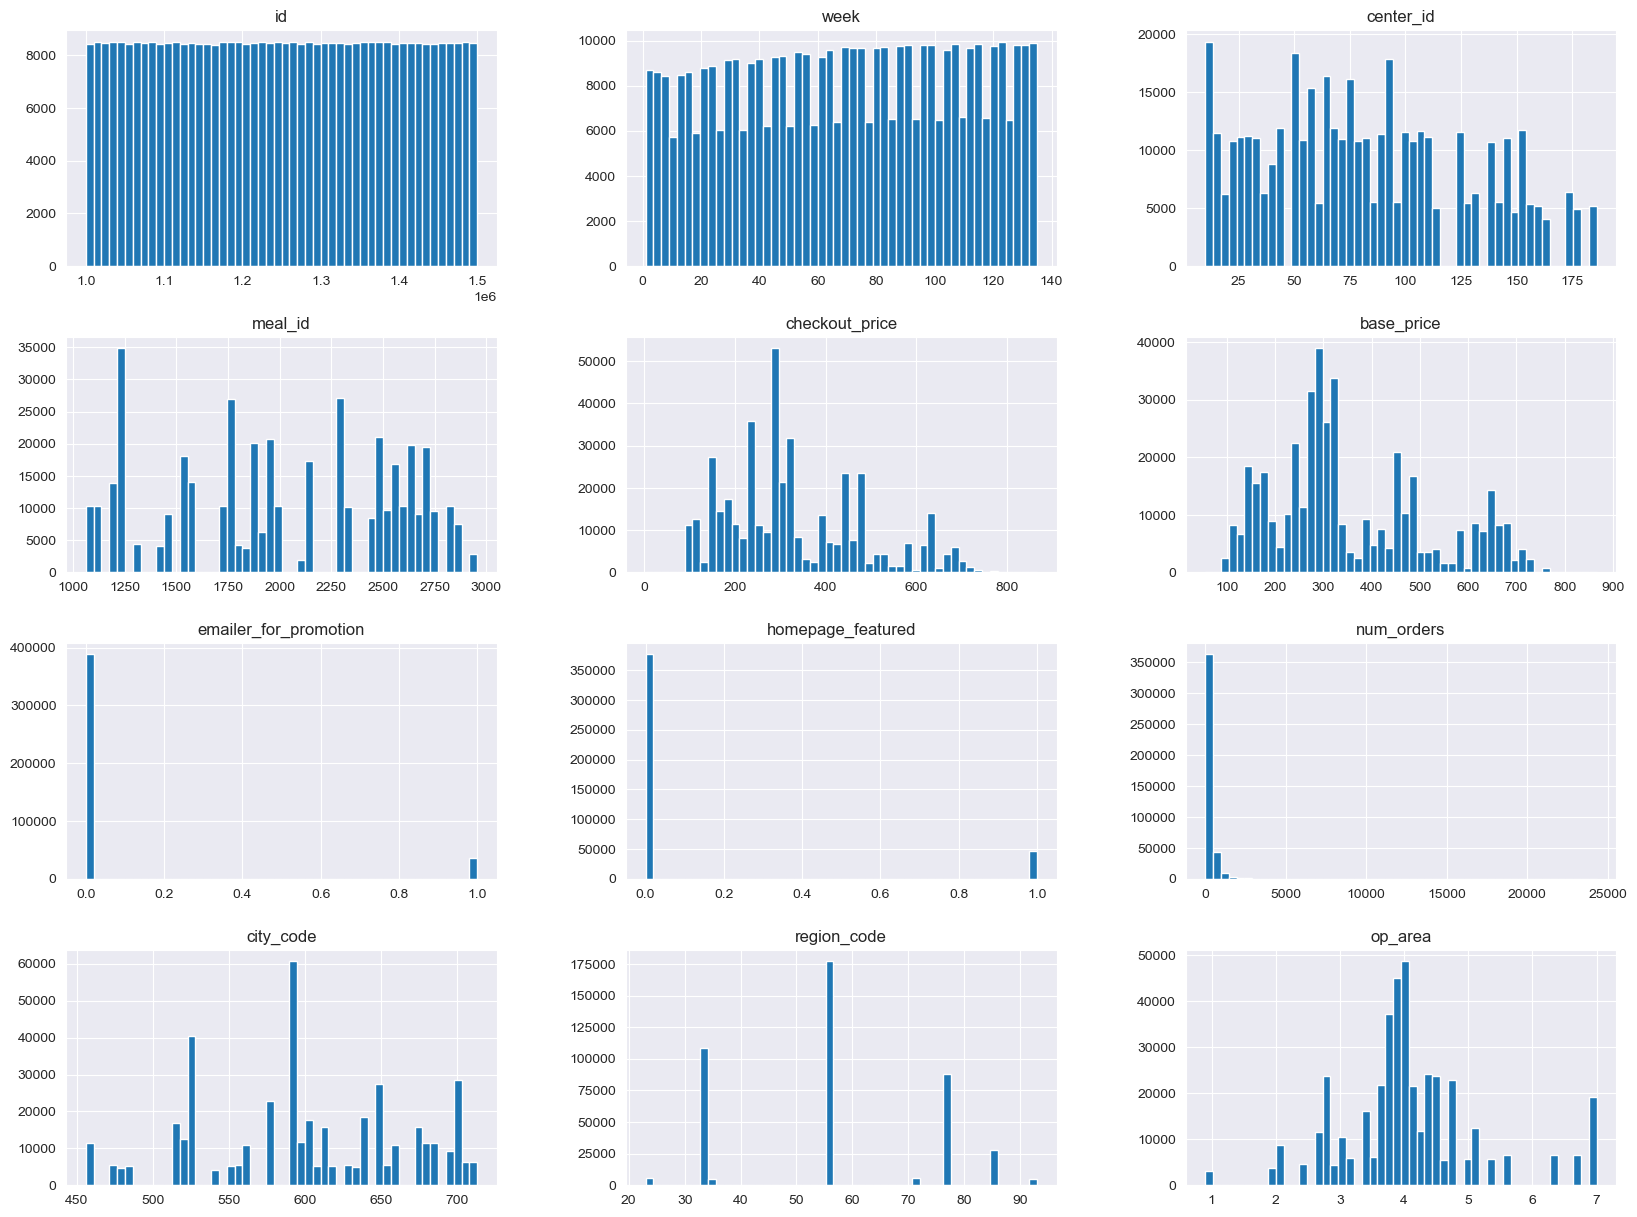

In [19]:
full_train_data.hist(bins=50, figsize=(20, 15))
plt.show()


# Check correlations with number of sales

In [20]:
correlations = full_train_data.corr(numeric_only=True)

In [21]:
correlations["num_orders"]

id                       0.000882
week                    -0.007385
center_id               -0.051274
meal_id                  0.012068
checkout_price          -0.283021
base_price              -0.221294
emailer_for_promotion    0.283221
homepage_featured        0.299080
num_orders               1.000000
city_code                0.041156
region_code              0.029848
op_area                  0.174464
Name: num_orders, dtype: float64

# Insights:
Highest positive correlations are with homepage_features and emails_for promotion.
Makes sense, if the meal is marketed either on the website or through an email, the nr of orders increases.
Op Area also makes sense. If the center covers a bigger area, the nr of orders increases.

Best negative correlations are for the base_price and the checkout_price.
Self-explanatory,  if prices are cheaper, more orders appear.

array([[<Axes: xlabel='num_orders', ylabel='num_orders'>,
        <Axes: xlabel='base_price', ylabel='num_orders'>,
        <Axes: xlabel='checkout_price', ylabel='num_orders'>],
       [<Axes: xlabel='num_orders', ylabel='base_price'>,
        <Axes: xlabel='base_price', ylabel='base_price'>,
        <Axes: xlabel='checkout_price', ylabel='base_price'>],
       [<Axes: xlabel='num_orders', ylabel='checkout_price'>,
        <Axes: xlabel='base_price', ylabel='checkout_price'>,
        <Axes: xlabel='checkout_price', ylabel='checkout_price'>]],
      dtype=object)

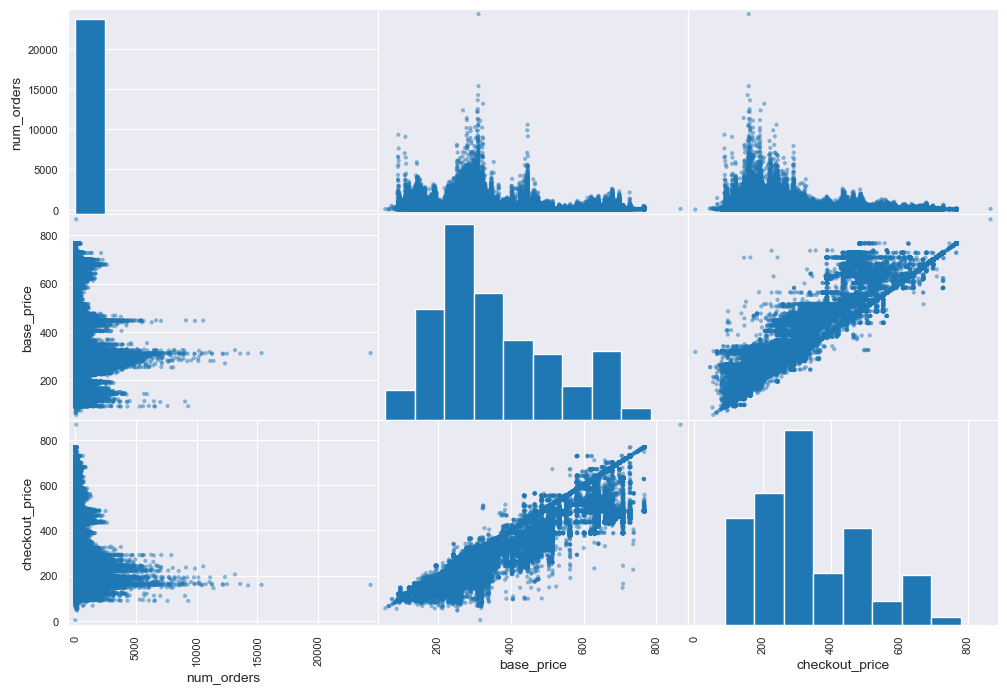

In [22]:
from pandas.plotting import scatter_matrix

attributes = ["num_orders", "base_price", "checkout_price"]
scatter_matrix(full_train_data[attributes], figsize=(12, 8))

In [23]:
nr_order_by_week = full_train_data.groupby(["week"])["num_orders"].sum()
nr_order_by_week

week
1       792261
2       787084
3       695262
4       743529
5      1198675
        ...   
131     899953
132     939374
133     835583
134     975072
135     777106
Name: num_orders, Length: 135, dtype: int64

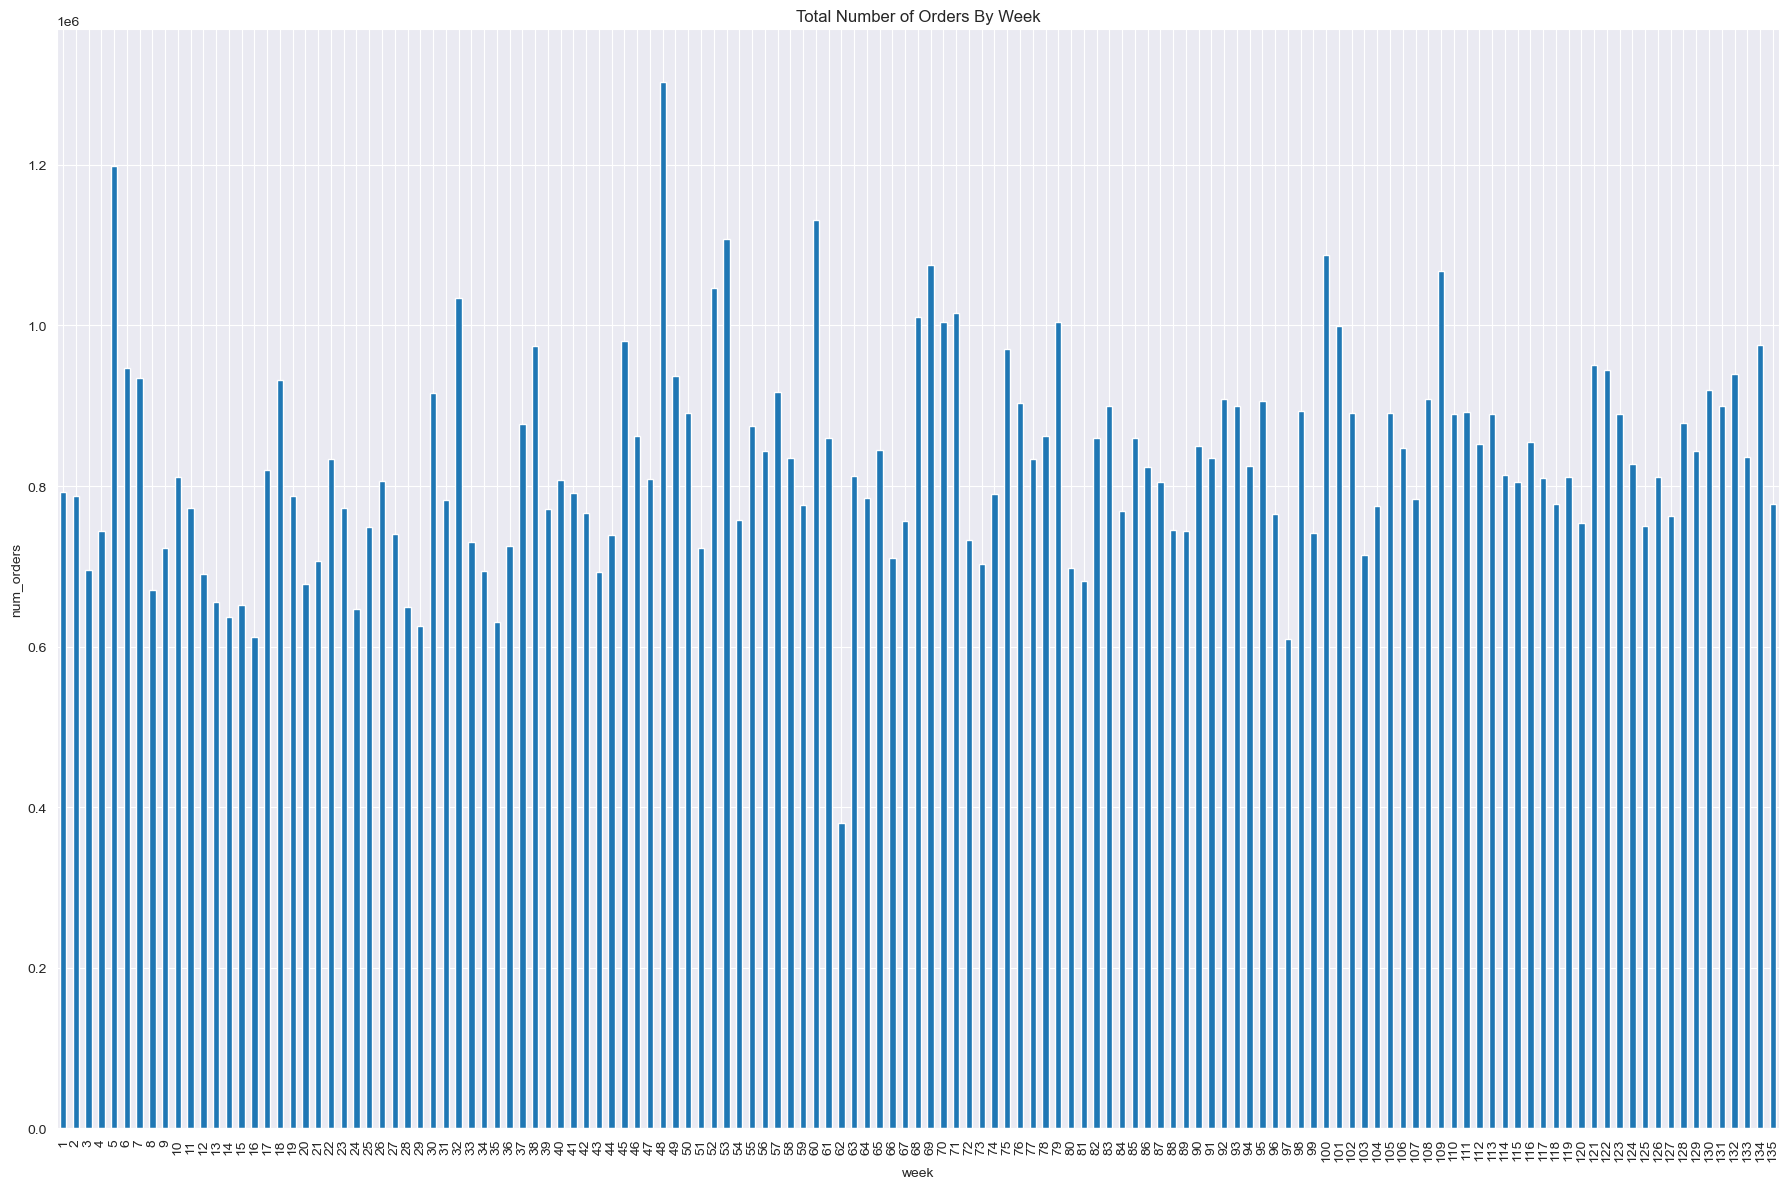

In [24]:
#plot the total profit over the years
plt.figure(figsize=(18, 12))
nr_order_by_week.plot(kind='bar')
plt.title('Total Number of Orders By Week')
plt.xlabel('week')
plt.ylabel('num_orders')
plt.xticks(rotation=90)  # text rotation on the x axis
plt.tight_layout()
plt.show()


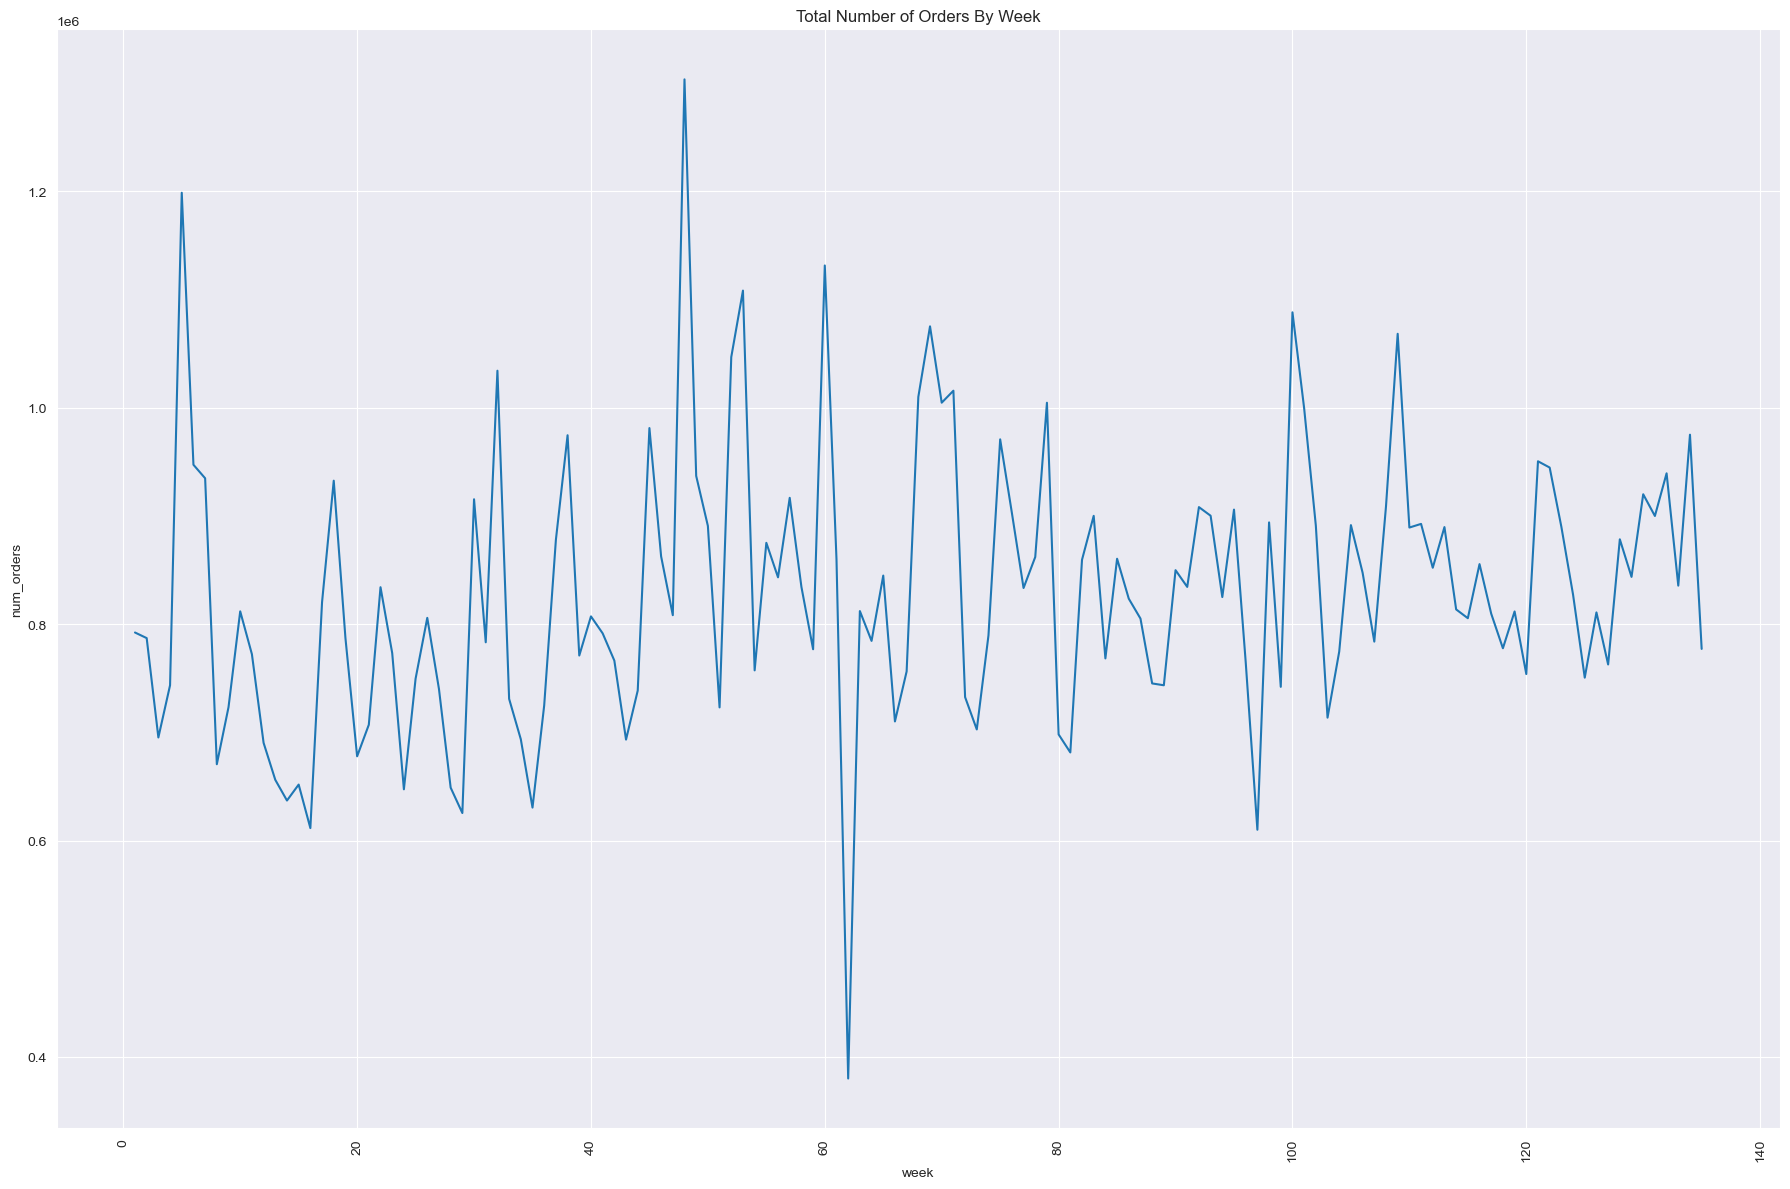

In [25]:
plt.figure(figsize=(18, 12))
nr_order_by_week.plot(kind='line')
plt.title('Total Number of Orders By Week')
plt.xlabel('week')
plt.ylabel('num_orders')
plt.xticks(rotation=90)  # text rotation on the x axis
plt.tight_layout()
plt.show()


In [26]:
full_train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 423727 entries, 0 to 423726
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     423727 non-null  int64  
 1   week                   423727 non-null  int64  
 2   center_id              423727 non-null  int64  
 3   meal_id                423727 non-null  int64  
 4   checkout_price         423727 non-null  float64
 5   base_price             423727 non-null  float64
 6   emailer_for_promotion  423727 non-null  int64  
 7   homepage_featured      423727 non-null  int64  
 8   num_orders             423727 non-null  int64  
 9   city_code              423727 non-null  int64  
 10  region_code            423727 non-null  int64  
 11  center_type            423727 non-null  object 
 12  op_area                423727 non-null  float64
 13  category               423727 non-null  object 
 14  cuisine                423727 non-nu

In [27]:
nr_order_by_center = full_train_data.groupby(["center_id"])["num_orders"].sum()
nr_order_by_center

center_id
10     3142082
11     2630927
13     4011441
14     1116908
17     1145302
        ...   
161     762965
162     635346
174    2612825
177     961134
186     790966
Name: num_orders, Length: 77, dtype: int64

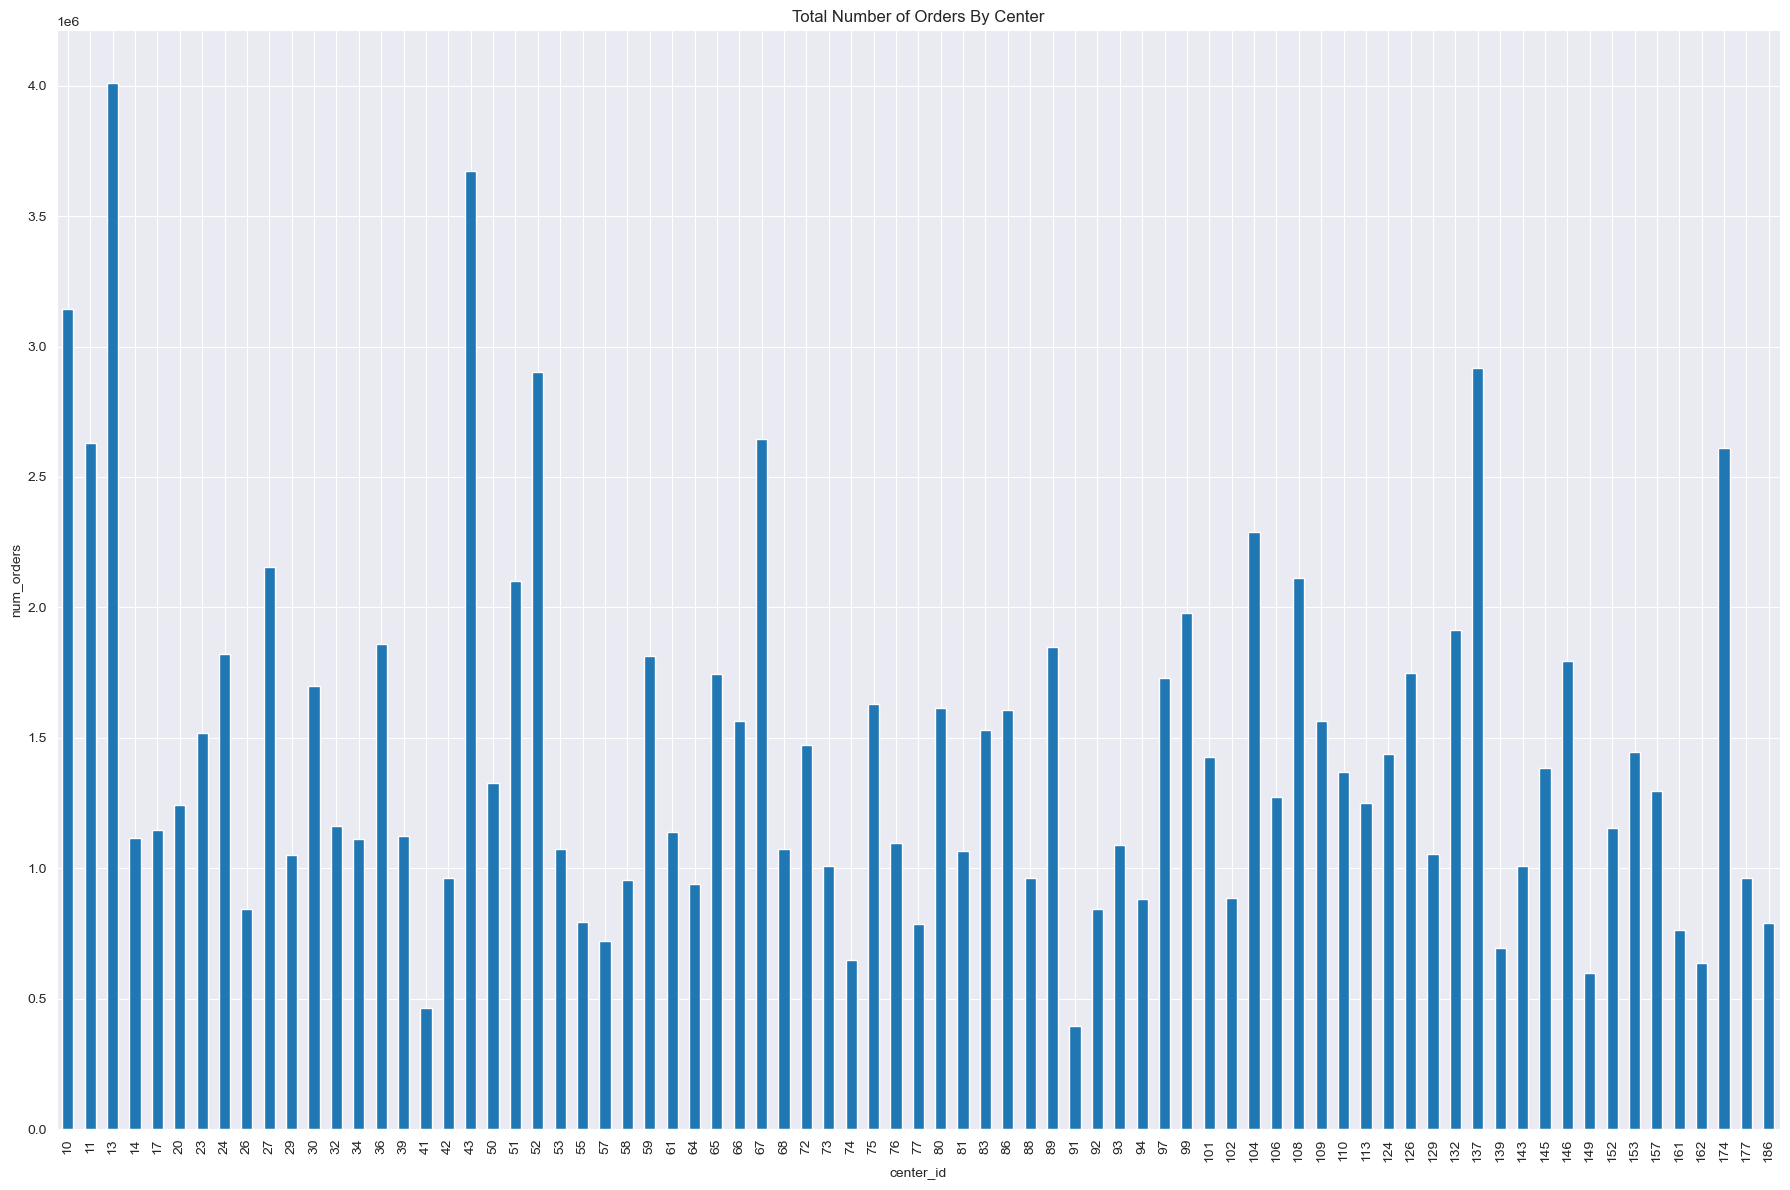

In [28]:
plt.figure(figsize=(18, 12))
nr_order_by_center.plot(kind='bar')
plt.title('Total Number of Orders By Center')
plt.xlabel('center_id')
plt.ylabel('num_orders')
plt.xticks(rotation=90)  # text rotation on the x axis
plt.tight_layout()
plt.show()

In [29]:
nr_order_by_center_type = full_train_data.groupby(["center_type"])["num_orders"].sum()
nr_order_by_center_type

center_type
TYPE_A    64774805
TYPE_B    27991808
TYPE_C    19330592
Name: num_orders, dtype: int64

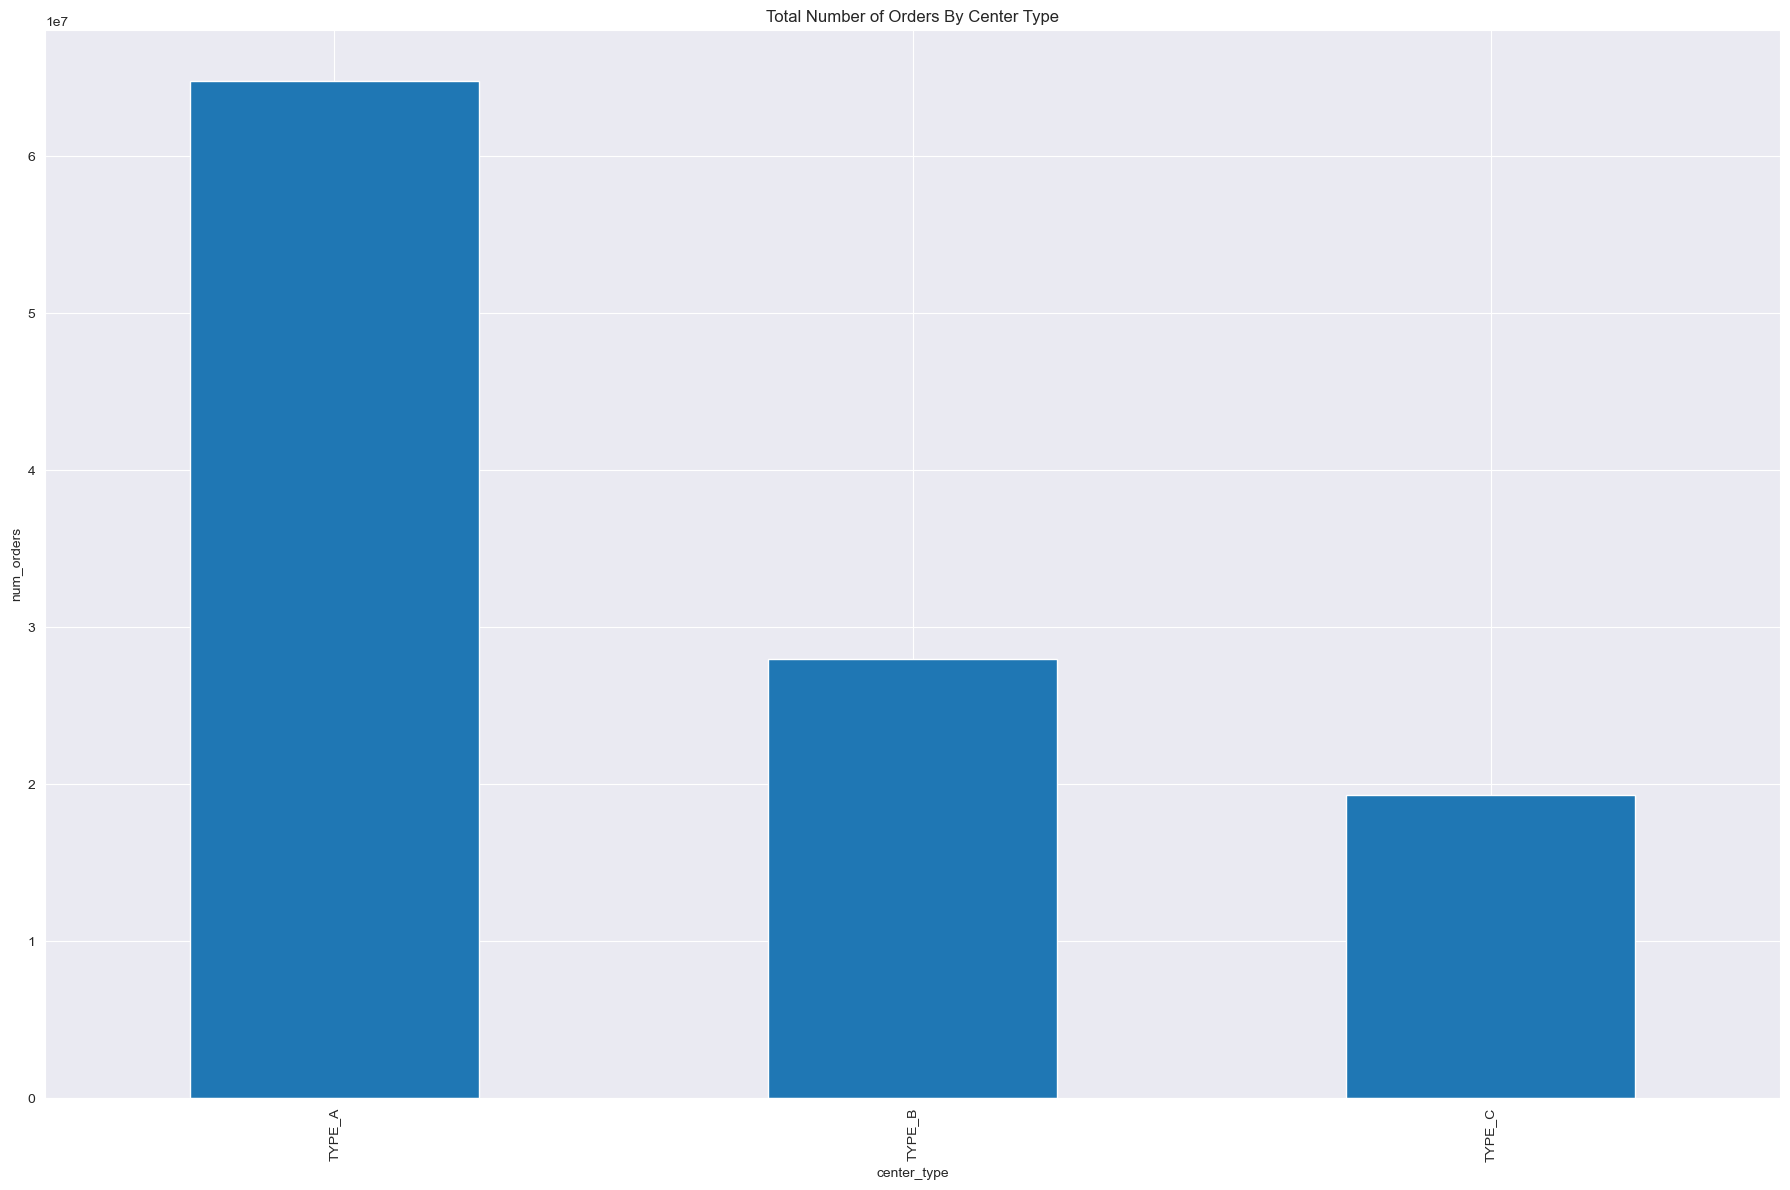

In [30]:
#plot the total profit over the years
plt.figure(figsize=(18, 12))
nr_order_by_center_type.plot(kind='bar')
plt.title('Total Number of Orders By Center Type')
plt.xlabel('center_type')
plt.ylabel('num_orders')
plt.xticks(rotation=90)  # text rotation on the x axis
plt.tight_layout()
plt.show()


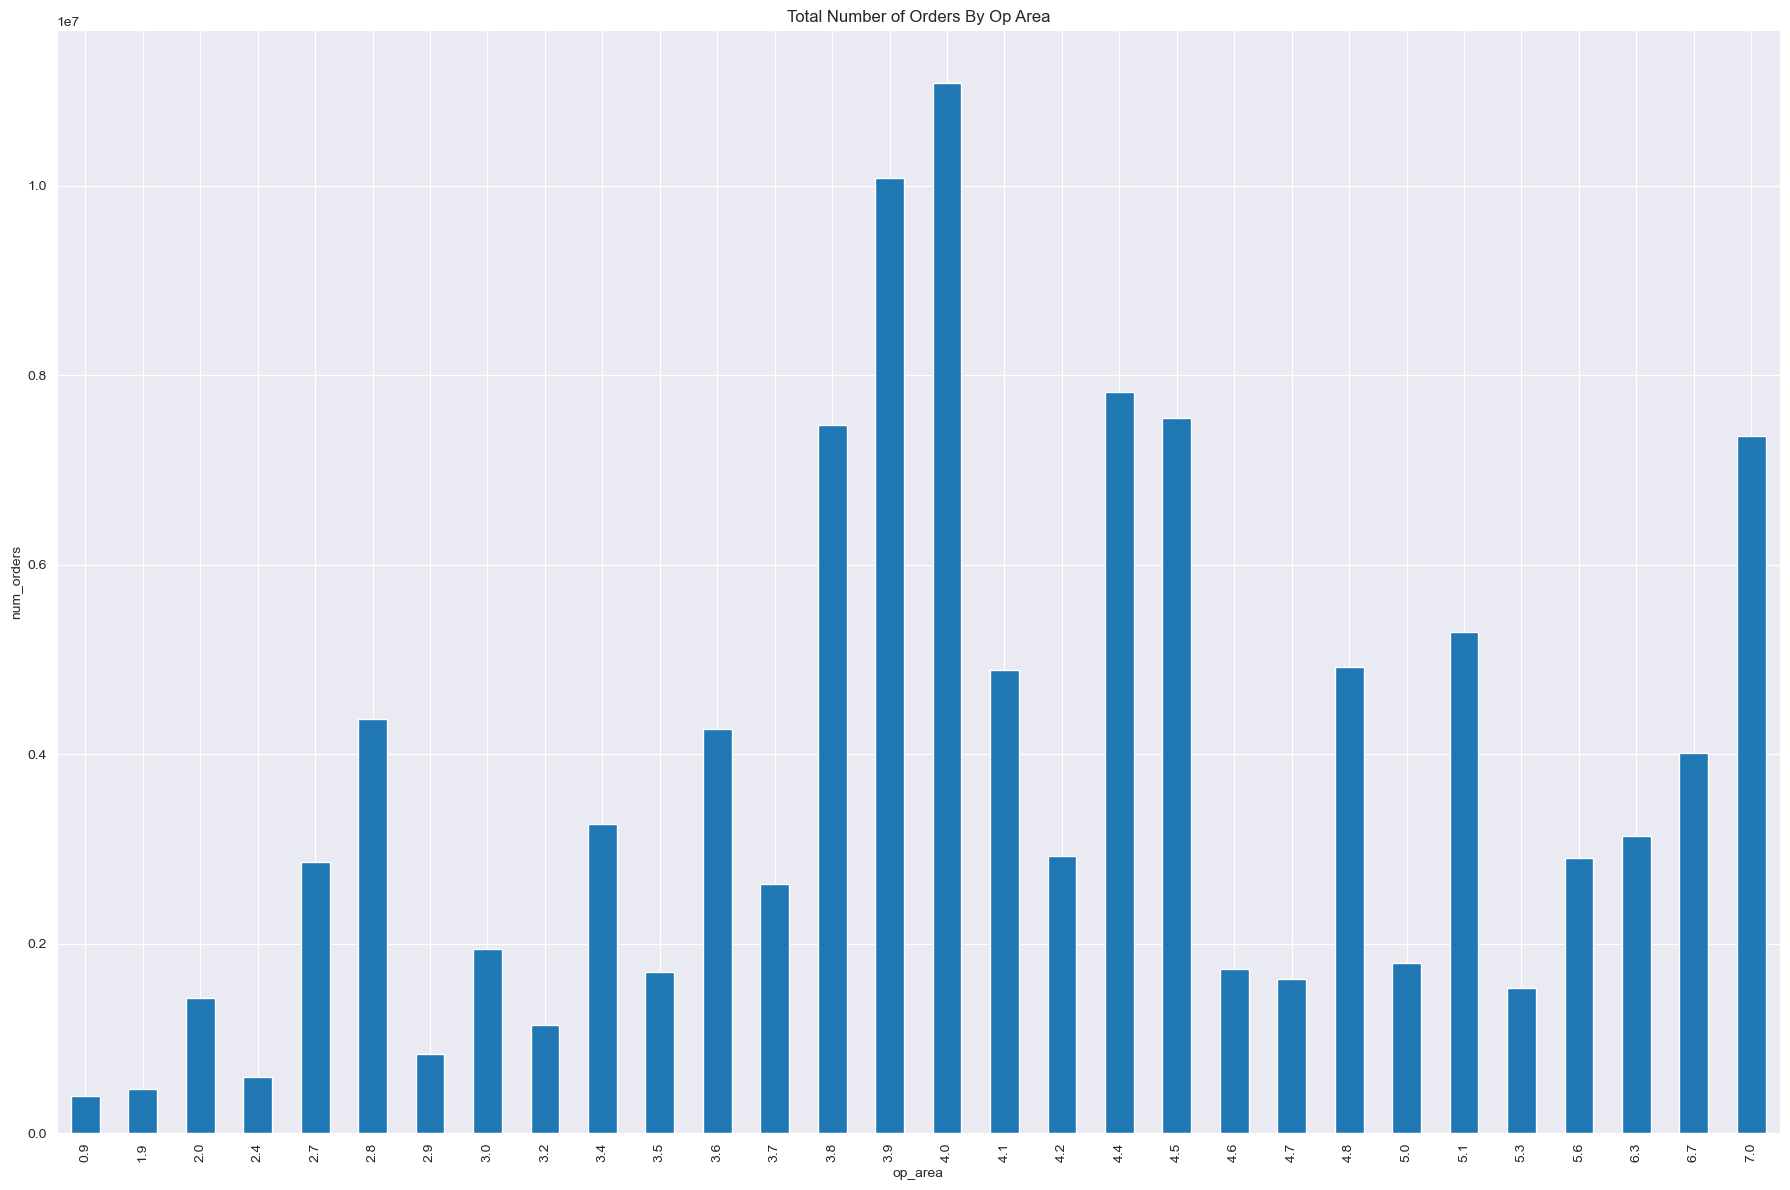

In [31]:
nr_order_by_op_area = full_train_data.groupby(["op_area"])["num_orders"].sum()
plt.figure(figsize=(18, 12))
nr_order_by_op_area.plot(kind='bar')
plt.title('Total Number of Orders By Op Area')
plt.xlabel('op_area')
plt.ylabel('num_orders')
plt.xticks(rotation=90)  # text rotation on the x axis
plt.tight_layout()
plt.show()

## Type A Centers perform much better than Type B. We'll need to understand why.


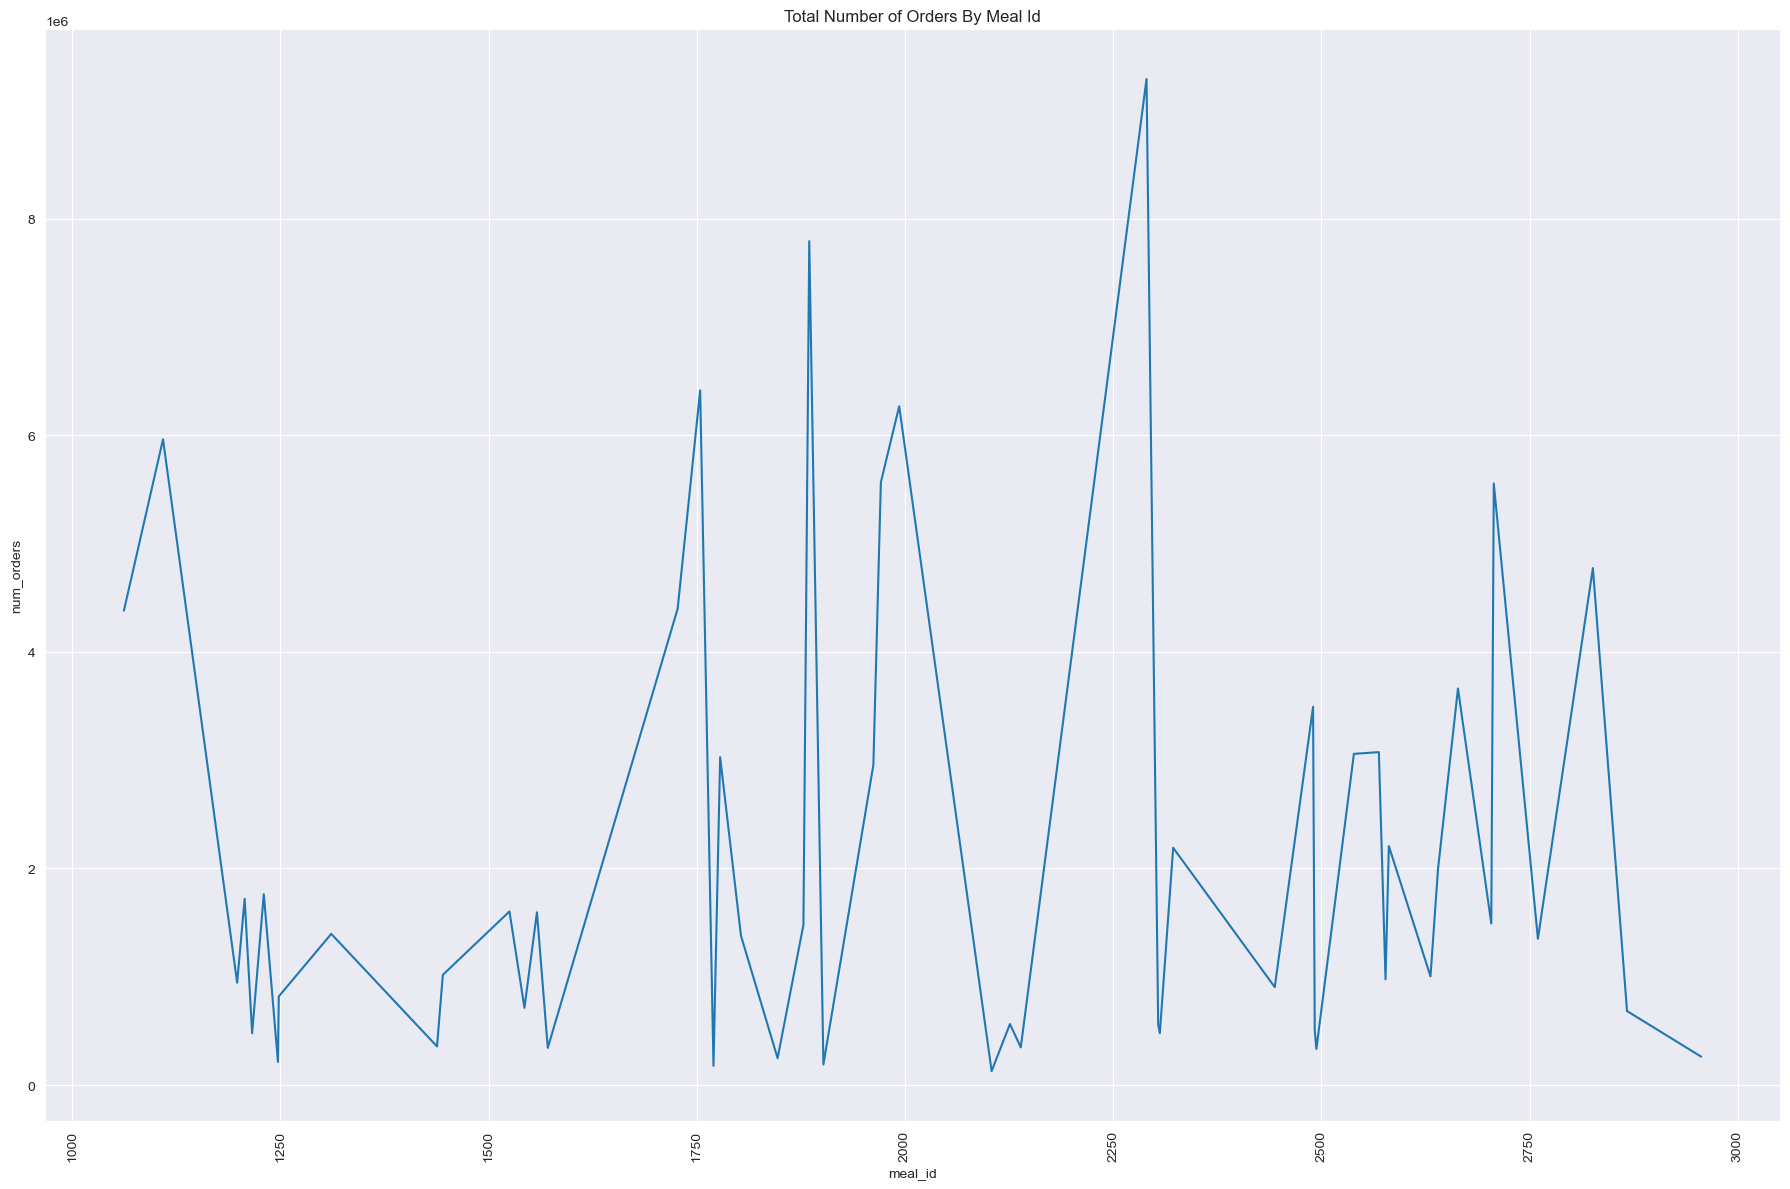

In [32]:
nr_order_by_meal = full_train_data.groupby(["meal_id"])["num_orders"].sum()
plt.figure(figsize=(18, 12))
nr_order_by_meal.plot(kind='line')
plt.title('Total Number of Orders By Meal Id')
plt.xlabel('meal_id')
plt.ylabel('num_orders')
plt.xticks(rotation=90)  # text rotation on the x axis
plt.tight_layout()
plt.show()

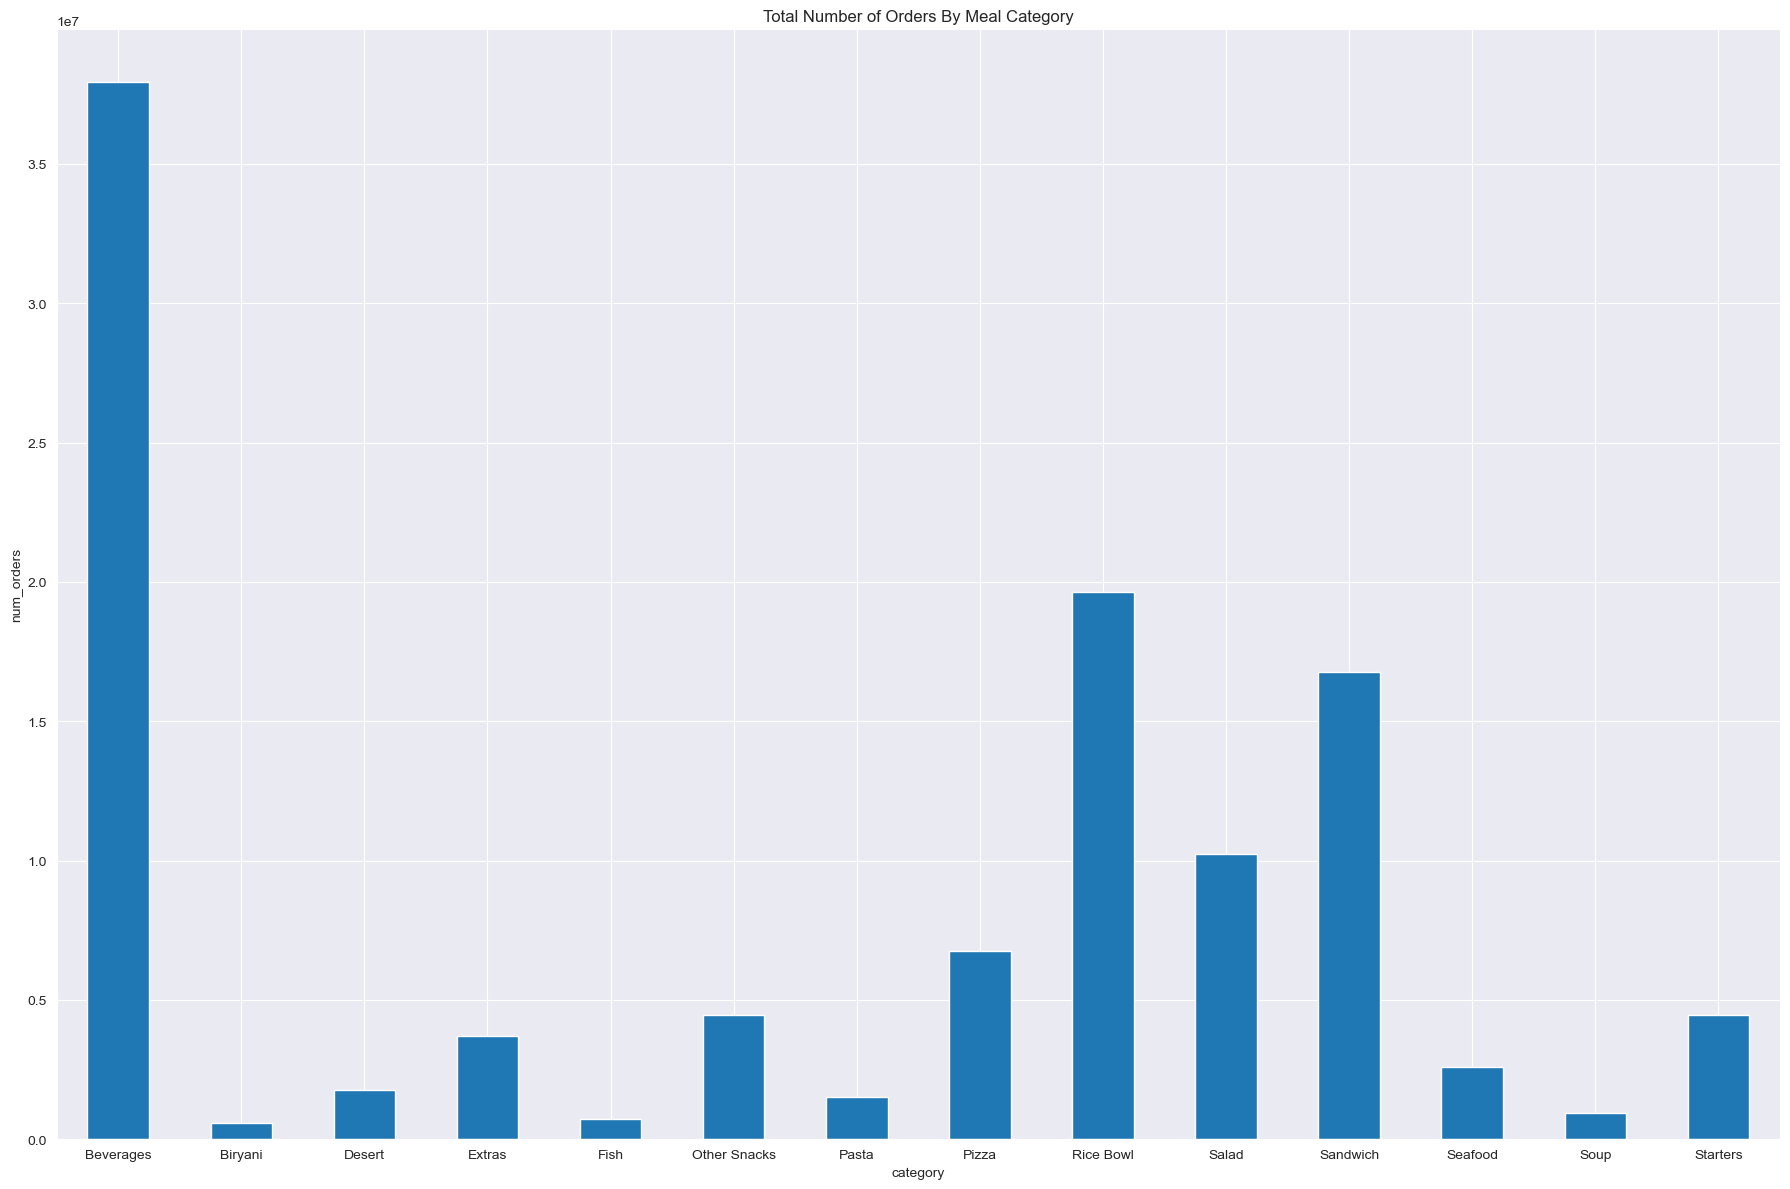

In [33]:
nr_order_by_meal_category = full_train_data.groupby(["category"])["num_orders"].sum()
plt.figure(figsize=(18, 12))
nr_order_by_meal_category.plot(kind='bar')
plt.title('Total Number of Orders By Meal Category')
plt.xlabel('category')
plt.ylabel('num_orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Some categories sell much better than others: Beverages win by a lot, followed by Rice Bowls and Sandwiches

In [34]:
full_train_data["cuisine"].value_counts()

Italian        114071
Thai           109903
Indian         104592
Continental     95161
Name: cuisine, dtype: int64

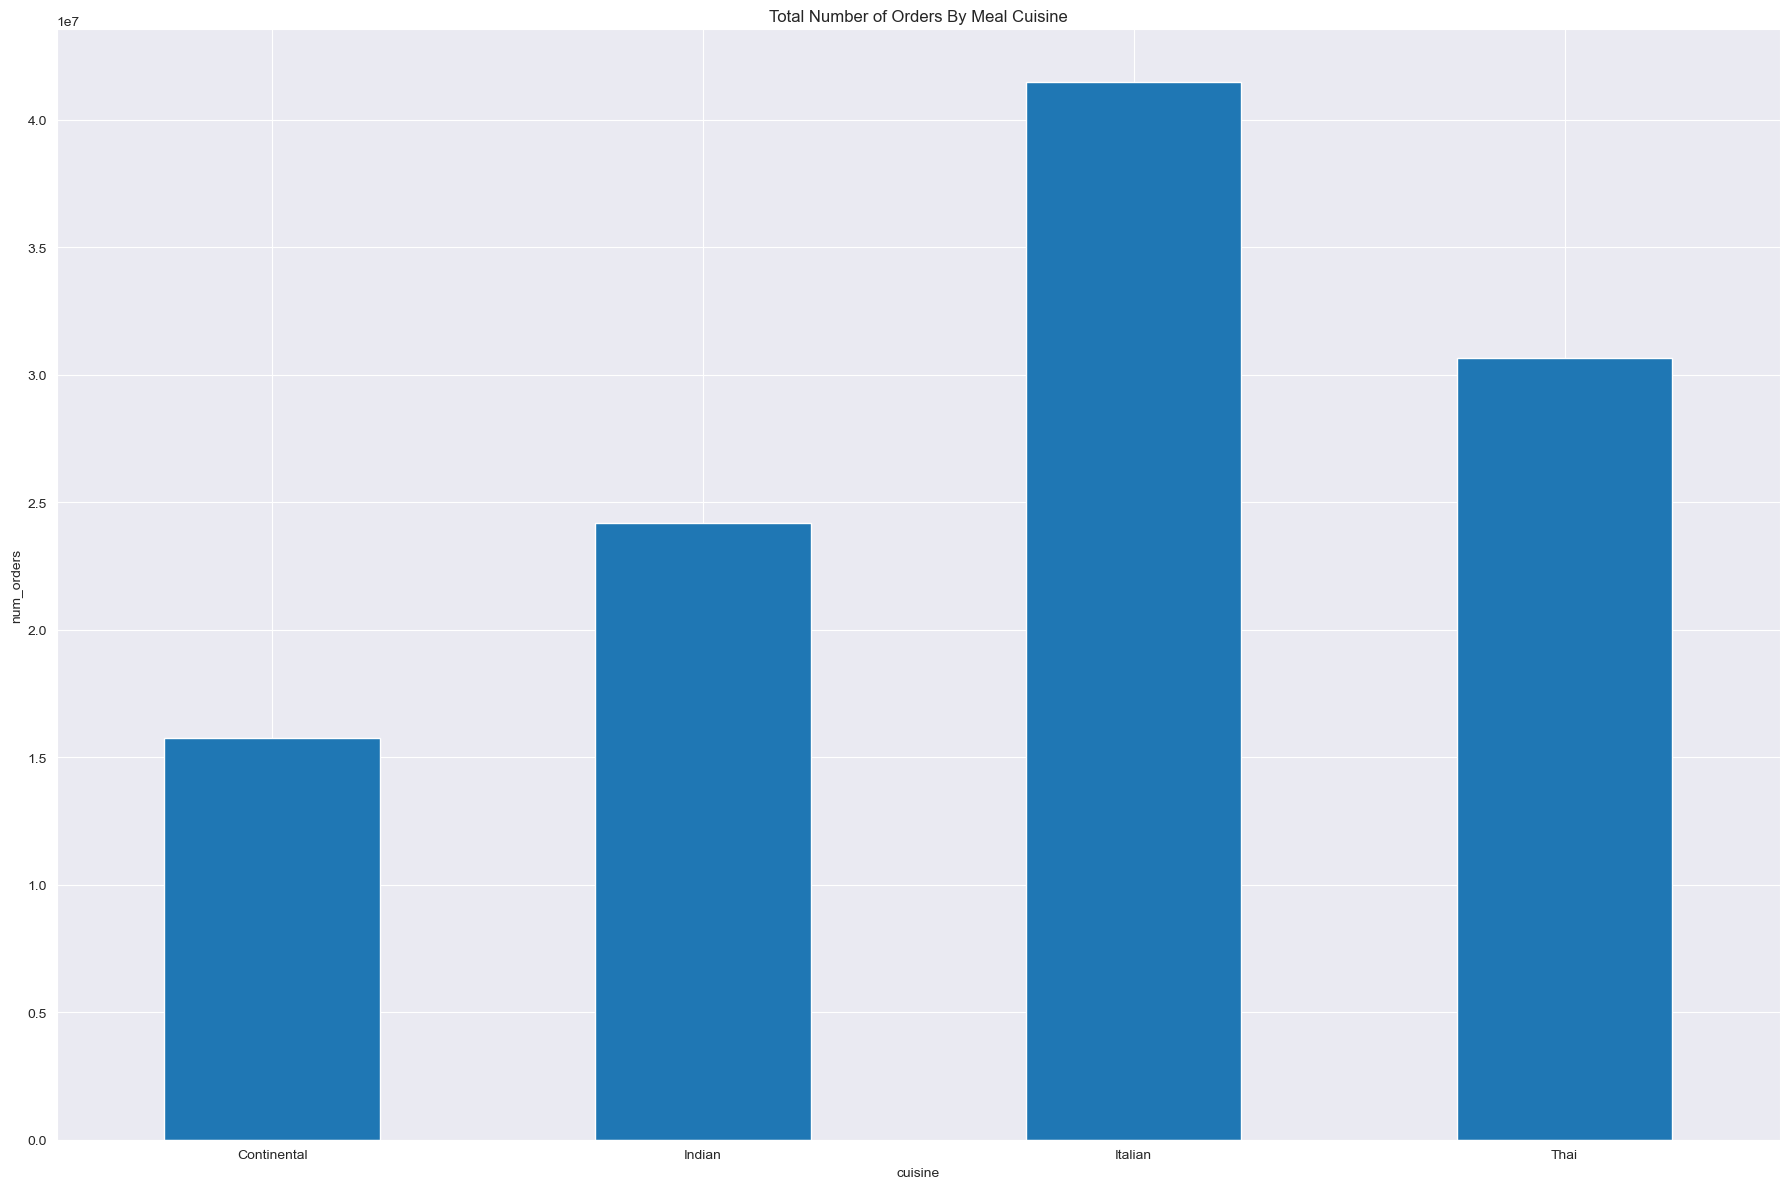

In [35]:
nr_order_by_meal_cuisine = full_train_data.groupby(["cuisine"])["num_orders"].sum()
plt.figure(figsize=(18, 12))
nr_order_by_meal_cuisine.plot(kind='bar')
plt.title('Total Number of Orders By Meal Cuisine')
plt.xlabel('cuisine')
plt.ylabel('num_orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Checking some other connections

## Are Type_A centers selling better because of Type_A or because they maybe selling more Beverages or other well selling meal cateogries?

Let's look at the order totals for each center_type/category combination

In [36]:
full_train_data.groupby(["center_type", "category"])["num_orders"].sum()


center_type  category    
TYPE_A       Beverages       23121313
             Biryani           319497
             Desert            921568
             Extras           2223044
             Fish              398122
             Other Snacks     2546374
             Pasta             830210
             Pizza            3825611
             Rice Bowl       11174816
             Salad            5397736
             Sandwich         9372097
             Seafood          1562251
             Soup              552529
             Starters         2529637
TYPE_B       Beverages        8696497
             Biryani           209930
             Desert            546832
             Extras           1166057
             Fish              312277
             Other Snacks     1626389
             Pasta             495039
             Pizza            1443821
             Rice Bowl        5173654
             Salad            2133200
             Sandwich         3549237
             Seafood    

Good info, but we need it in a visual way to understand better.
Let's plot these values grouped by center type and category. We expect to see that Type A bars will outperform the rest of the center types because we know Type A sells much more than the others.

<Axes: xlabel='center_type', ylabel='num_orders'>

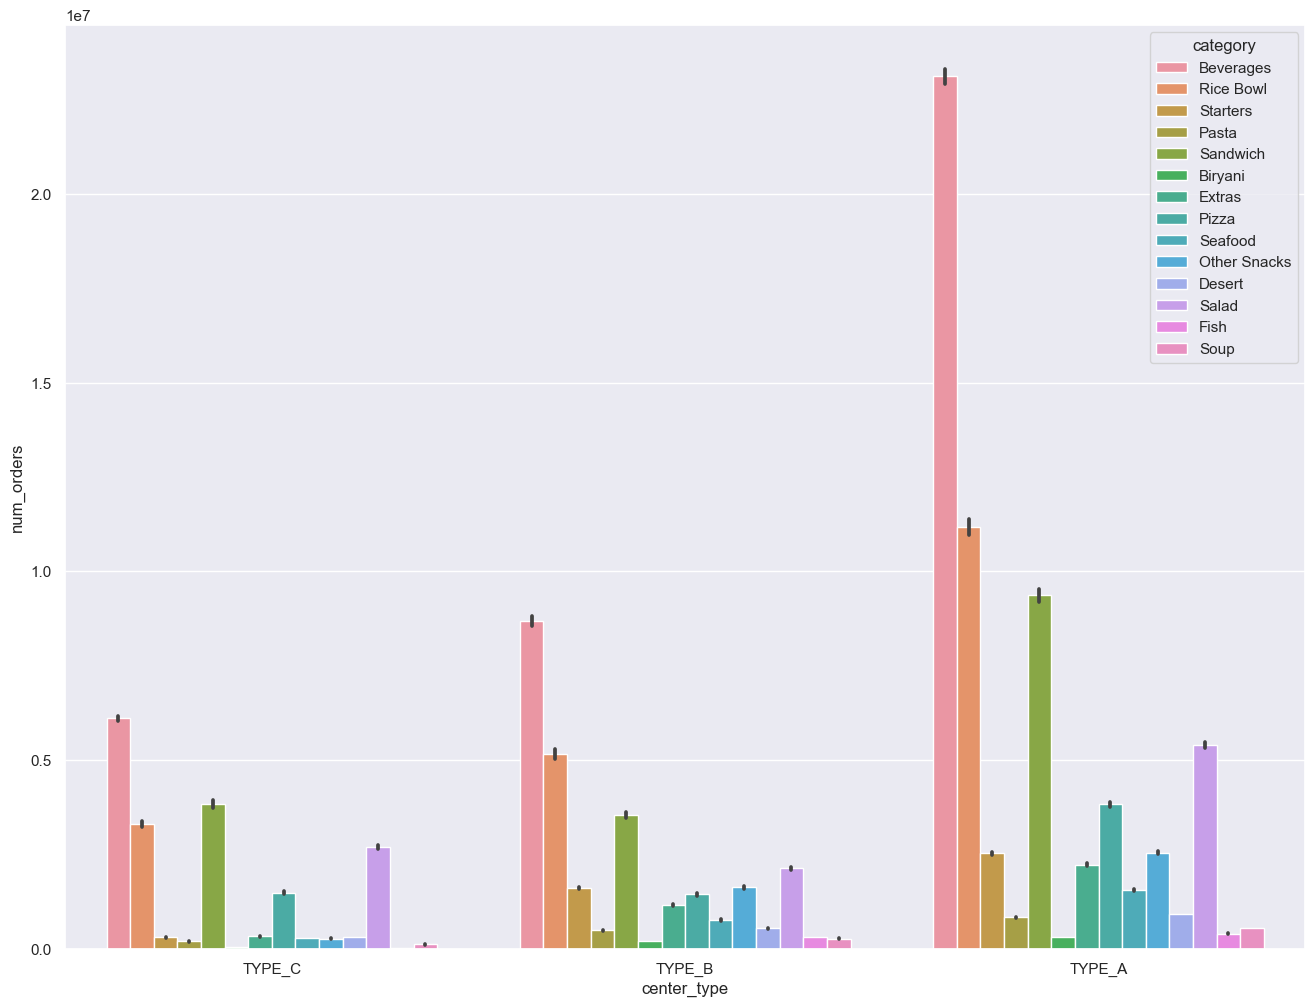

In [37]:
sns.set(rc={'figure.figsize': (16, 12)})
sns.barplot(x="center_type", y="num_orders", hue="category", data=full_train_data, estimator="sum")

OBSERVATIONS:
As we assumed, Type A categories outperform those respective categories from other center types.
Just eyeballing it, we can see that even though Type A sells much more than the others, it sells each category in a similar proportion to the rest.
Eyeballing is not enough, let's check the data.

## Are the percentages of categories sold in Type A very different that in the other types? Does type A sell many more Beverages compared to it's total sales?
## We want to understand if the better performance of Type A is due to it selling meals from a better sold category or if it sells about the same as the other center types in % amount. This will help us understand if the center_type is actually relevant or if the difference in sales for the center_type is due to the meal categories sold.

Basically, we want to calculate the % of sales from the total for each center_type/category combination.
To do this, we first need for each center_type/category combination the total number of orders.

In [38]:
grouped_data_category = full_train_data.groupby(['center_type', 'category'])['num_orders'].sum().reset_index()
grouped_data_category


center_type      category  num_orders
0       TYPE_A     Beverages    23121313
1       TYPE_A       Biryani      319497
2       TYPE_A        Desert      921568
3       TYPE_A        Extras     2223044
4       TYPE_A          Fish      398122
5       TYPE_A  Other Snacks     2546374
6       TYPE_A         Pasta      830210
7       TYPE_A         Pizza     3825611
8       TYPE_A     Rice Bowl    11174816
9       TYPE_A         Salad     5397736
10      TYPE_A      Sandwich     9372097
11      TYPE_A       Seafood     1562251
12      TYPE_A          Soup      552529
13      TYPE_A      Starters     2529637
14      TYPE_B     Beverages     8696497
15      TYPE_B       Biryani      209930
16      TYPE_B        Desert      546832
17      TYPE_B        Extras     1166057
18      TYPE_B          Fish      312277
19      TYPE_B  Other Snacks     1626389
20      TYPE_B         Pasta      495039
21      TYPE_B         Pizza     1443821
22      TYPE_B     Rice Bowl     5173654
23      TYPE_B         Salad     2133200
24      TYPE_B      Sandwich     3549237
25      TYPE_B       Seafood      755520
26      TYPE_B          Soup      269370
27      TYPE_B      Starters     1613985
28      TYPE_C     Beverages     6109162
29      TYPE_C       Biryani       51528
30      TYPE_C        Desert      310503
31      TYPE_C        Extras      331038
32      TYPE_C          Fish       23543
33      TYPE_C  Other Snacks      273025
34      TYPE_C         Pasta      196641
35      TYPE_C         Pizza     1489825
36      TYPE_C     Rice Bowl     3305991
37      TYPE_C         Salad     2699265
38      TYPE_C      Sandwich     3835268
39      TYPE_C       Seafood      287598
40      TYPE_C          Soup      115362
41      TYPE_C      Starters      301843

No we have the total orders for each center_type/category. To calculate the % we first need to know the total nr of orders sold for each center_type regardless of the categories. We create a different dataset for this.

In [39]:
total_orders_by_center = full_train_data.groupby(['center_type'])['num_orders'].sum().reset_index()
total_orders_by_center


center_type  num_orders
0      TYPE_A    64774805
1      TYPE_B    27991808
2      TYPE_C    19330592

Perfect. Now we could calculate the percentage going line by line and looking into the above dataset to find the total, but it's more performant to use pandas. For this we need to add to all the center_type/category combinations, the total nr of orders for that center_type.

In [40]:
grouped_data_category = grouped_data_category.merge(total_orders_by_center, on='center_type', suffixes=('', '_total'))
grouped_data_category


center_type      category  num_orders  num_orders_total
0       TYPE_A     Beverages    23121313          64774805
1       TYPE_A       Biryani      319497          64774805
2       TYPE_A        Desert      921568          64774805
3       TYPE_A        Extras     2223044          64774805
4       TYPE_A          Fish      398122          64774805
5       TYPE_A  Other Snacks     2546374          64774805
6       TYPE_A         Pasta      830210          64774805
7       TYPE_A         Pizza     3825611          64774805
8       TYPE_A     Rice Bowl    11174816          64774805
9       TYPE_A         Salad     5397736          64774805
10      TYPE_A      Sandwich     9372097          64774805
11      TYPE_A       Seafood     1562251          64774805
12      TYPE_A          Soup      552529          64774805
13      TYPE_A      Starters     2529637          64774805
14      TYPE_B     Beverages     8696497          27991808
15      TYPE_B       Biryani      209930          27991808
16      TYPE_B        Desert      546832          27991808
17      TYPE_B        Extras     1166057          27991808
18      TYPE_B          Fish      312277          27991808
19      TYPE_B  Other Snacks     1626389          27991808
20      TYPE_B         Pasta      495039          27991808
21      TYPE_B         Pizza     1443821          27991808
22      TYPE_B     Rice Bowl     5173654          27991808
23      TYPE_B         Salad     2133200          27991808
24      TYPE_B      Sandwich     3549237          27991808
25      TYPE_B       Seafood      755520          27991808
26      TYPE_B          Soup      269370          27991808
27      TYPE_B      Starters     1613985          27991808
28      TYPE_C     Beverages     6109162          19330592
29      TYPE_C       Biryani       51528          19330592
30      TYPE_C        Desert      310503          19330592
31      TYPE_C        Extras      331038          19330592
32      TYPE_C          Fish       23543          19330592
33      TYPE_C  Other Snacks      273025          19330592
34      TYPE_C         Pasta      196641          19330592
35      TYPE_C         Pizza     1489825          19330592
36      TYPE_C     Rice Bowl     3305991          19330592
37      TYPE_C         Salad     2699265          19330592
38      TYPE_C      Sandwich     3835268          19330592
39      TYPE_C       Seafood      287598          19330592
40      TYPE_C          Soup      115362          19330592
41      TYPE_C      Starters      301843          19330592

Now that we have everything we need to calculate the percentage in the `grouped_data` dataset, we can use Pandas to apply a "regula de 3 simpla" formula:
`num_orders / num_orders+total * 100`

In [41]:
grouped_data_category["percentage"] = grouped_data_category["num_orders"] / grouped_data_category[
    "num_orders_total"] * 100


In [42]:
grouped_data_category


center_type      category  num_orders  num_orders_total  percentage
0       TYPE_A     Beverages    23121313          64774805   35.694917
1       TYPE_A       Biryani      319497          64774805    0.493243
2       TYPE_A        Desert      921568          64774805    1.422726
3       TYPE_A        Extras     2223044          64774805    3.431958
4       TYPE_A          Fish      398122          64774805    0.614625
5       TYPE_A  Other Snacks     2546374          64774805    3.931118
6       TYPE_A         Pasta      830210          64774805    1.281687
7       TYPE_A         Pizza     3825611          64774805    5.906017
8       TYPE_A     Rice Bowl    11174816          64774805   17.251794
9       TYPE_A         Salad     5397736          64774805    8.333080
10      TYPE_A      Sandwich     9372097          64774805   14.468738
11      TYPE_A       Seafood     1562251          64774805    2.411819
12      TYPE_A          Soup      552529          64774805    0.853000
13      TYPE_A      Starters     2529637          64774805    3.905279
14      TYPE_B     Beverages     8696497          27991808   31.068007
15      TYPE_B       Biryani      209930          27991808    0.749969
16      TYPE_B        Desert      546832          27991808    1.953543
17      TYPE_B        Extras     1166057          27991808    4.165708
18      TYPE_B          Fish      312277          27991808    1.115601
19      TYPE_B  Other Snacks     1626389          27991808    5.810232
20      TYPE_B         Pasta      495039          27991808    1.768514
21      TYPE_B         Pizza     1443821          27991808    5.158013
22      TYPE_B     Rice Bowl     5173654          27991808   18.482743
23      TYPE_B         Salad     2133200          27991808    7.620801
24      TYPE_B      Sandwich     3549237          27991808   12.679556
25      TYPE_B       Seafood      755520          27991808    2.699075
26      TYPE_B          Soup      269370          27991808    0.962317
27      TYPE_B      Starters     1613985          27991808    5.765919
28      TYPE_C     Beverages     6109162          19330592   31.603595
29      TYPE_C       Biryani       51528          19330592    0.266562
30      TYPE_C        Desert      310503          19330592    1.606278
31      TYPE_C        Extras      331038          19330592    1.712508
32      TYPE_C          Fish       23543          19330592    0.121791
33      TYPE_C  Other Snacks      273025          19330592    1.412399
34      TYPE_C         Pasta      196641          19330592    1.017253
35      TYPE_C         Pizza     1489825          19330592    7.707084
36      TYPE_C     Rice Bowl     3305991          19330592   17.102378
37      TYPE_C         Salad     2699265          19330592   13.963695
38      TYPE_C      Sandwich     3835268          19330592   19.840406
39      TYPE_C       Seafood      287598          19330592    1.487787
40      TYPE_C          Soup      115362          19330592    0.596785
41      TYPE_C      Starters      301843          19330592    1.561478

Now, we just need to plot the data

<Axes: xlabel='center_type', ylabel='percentage'>

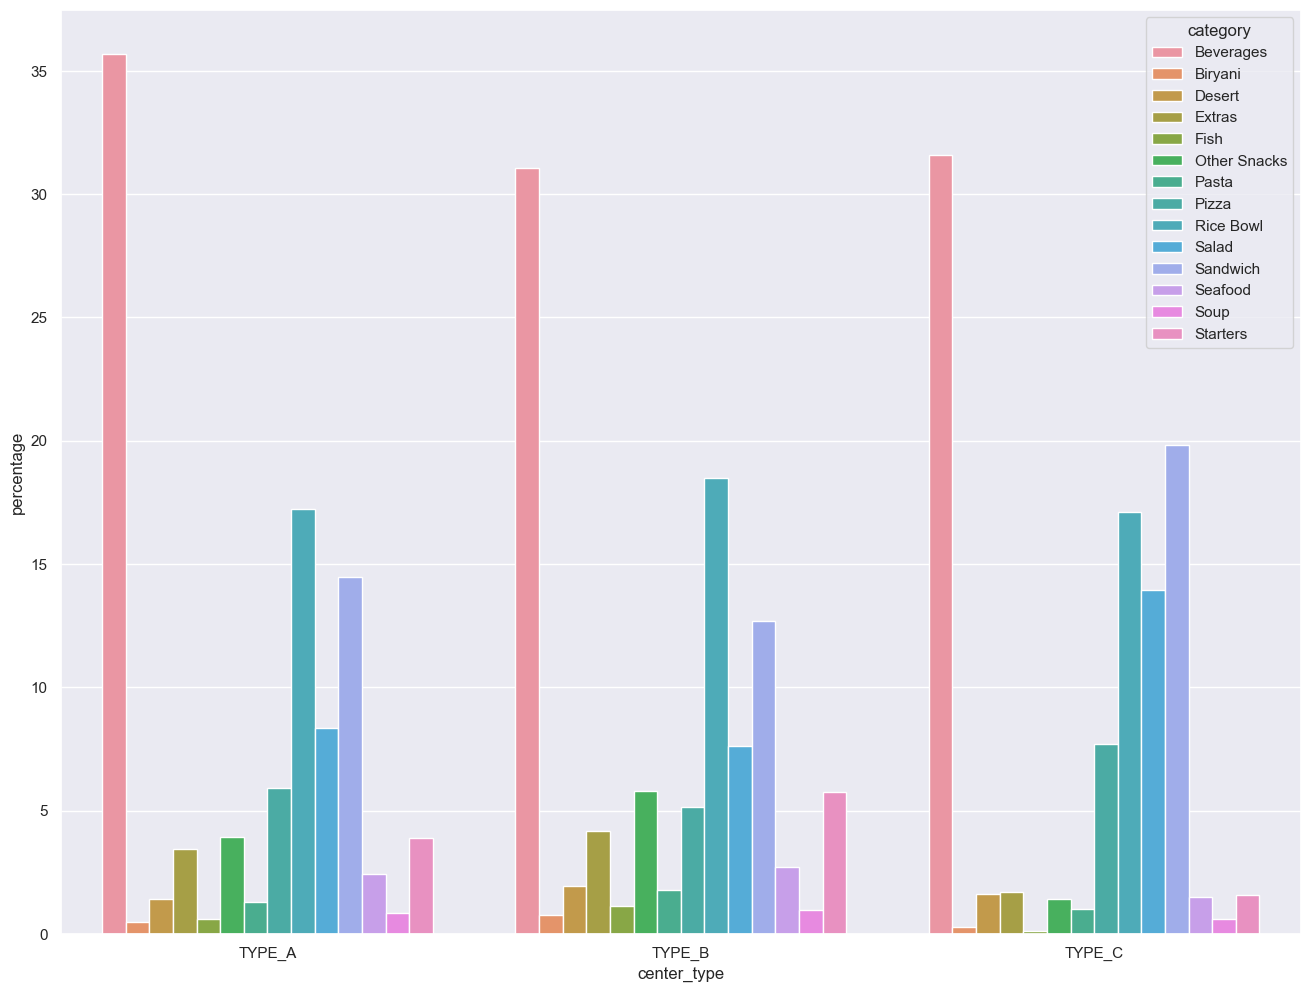

In [43]:
sns.barplot(x="center_type", y="percentage", hue="category", data=grouped_data_category)


OBSERVATIONS:
Given that the percentages for each category is very similar between the center_types it's safe to assume that category does not have a correlation with the high number of orders sold in Type A, and basically a higher Type like Type A or Type B means that that center will sell more.
So far, center_type seems like a very important feature to include in the ML training.

In [44]:
full_train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 423727 entries, 0 to 423726
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     423727 non-null  int64  
 1   week                   423727 non-null  int64  
 2   center_id              423727 non-null  int64  
 3   meal_id                423727 non-null  int64  
 4   checkout_price         423727 non-null  float64
 5   base_price             423727 non-null  float64
 6   emailer_for_promotion  423727 non-null  int64  
 7   homepage_featured      423727 non-null  int64  
 8   num_orders             423727 non-null  int64  
 9   city_code              423727 non-null  int64  
 10  region_code            423727 non-null  int64  
 11  center_type            423727 non-null  object 
 12  op_area                423727 non-null  float64
 13  category               423727 non-null  object 
 14  cuisine                423727 non-nu

# Are Type_A centers selling better because of Type_A or because they all have higher op_area?

Let's check center_type/op_area order totals.

In [45]:
total_orders_by_center_area = full_train_data.groupby(['center_type', "op_area"])['num_orders'].sum().reset_index()
total_orders_by_center_area


center_type  op_area  num_orders
0       TYPE_A      2.4      599169
1       TYPE_A      2.7     1749554
2       TYPE_A      2.8     1534609
3       TYPE_A      3.0     1097600
4       TYPE_A      3.2     1145302
5       TYPE_A      3.4     3268992
6       TYPE_A      3.5     1698003
7       TYPE_A      3.6     1564660
8       TYPE_A      3.7     2630927
9       TYPE_A      3.8     4392218
10      TYPE_A      3.9     6886102
11      TYPE_A      4.0     4588419
12      TYPE_A      4.1     3823002
13      TYPE_A      4.2     1811904
14      TYPE_A      4.4     3859292
15      TYPE_A      4.5     7556121
16      TYPE_A      4.6     1730457
17      TYPE_A      4.8     4918206
18      TYPE_A      5.1     3673068
19      TYPE_A      5.3     1531647
20      TYPE_A      7.0     4715553
21      TYPE_B      3.6     1821420
22      TYPE_B      3.8     1007860
23      TYPE_B      3.9     1726610
24      TYPE_B      4.0     1152884
25      TYPE_B      4.1     1072184
26      TYPE_B      4.2     1113319
27      TYPE_B      4.4     3969923
28      TYPE_B      4.7     1631493
29      TYPE_B      5.0     1796209
30      TYPE_B      5.6     2902235
31      TYPE_B      6.3     3142082
32      TYPE_B      6.7     4011441
33      TYPE_B      7.0     2644148
34      TYPE_C      0.9      394707
35      TYPE_C      1.9      466126
36      TYPE_C      2.0     1428277
37      TYPE_C      2.7     1116908
38      TYPE_C      2.8     2841753
39      TYPE_C      2.9      842819
40      TYPE_C      3.0      843167
41      TYPE_C      3.6      882847
42      TYPE_C      3.8     2079312
43      TYPE_C      3.9     1472723
44      TYPE_C      4.0     5346543
45      TYPE_C      5.1     1615410

Nothing to understand. Let's plot it.

<Axes: xlabel='center_type', ylabel='num_orders'>

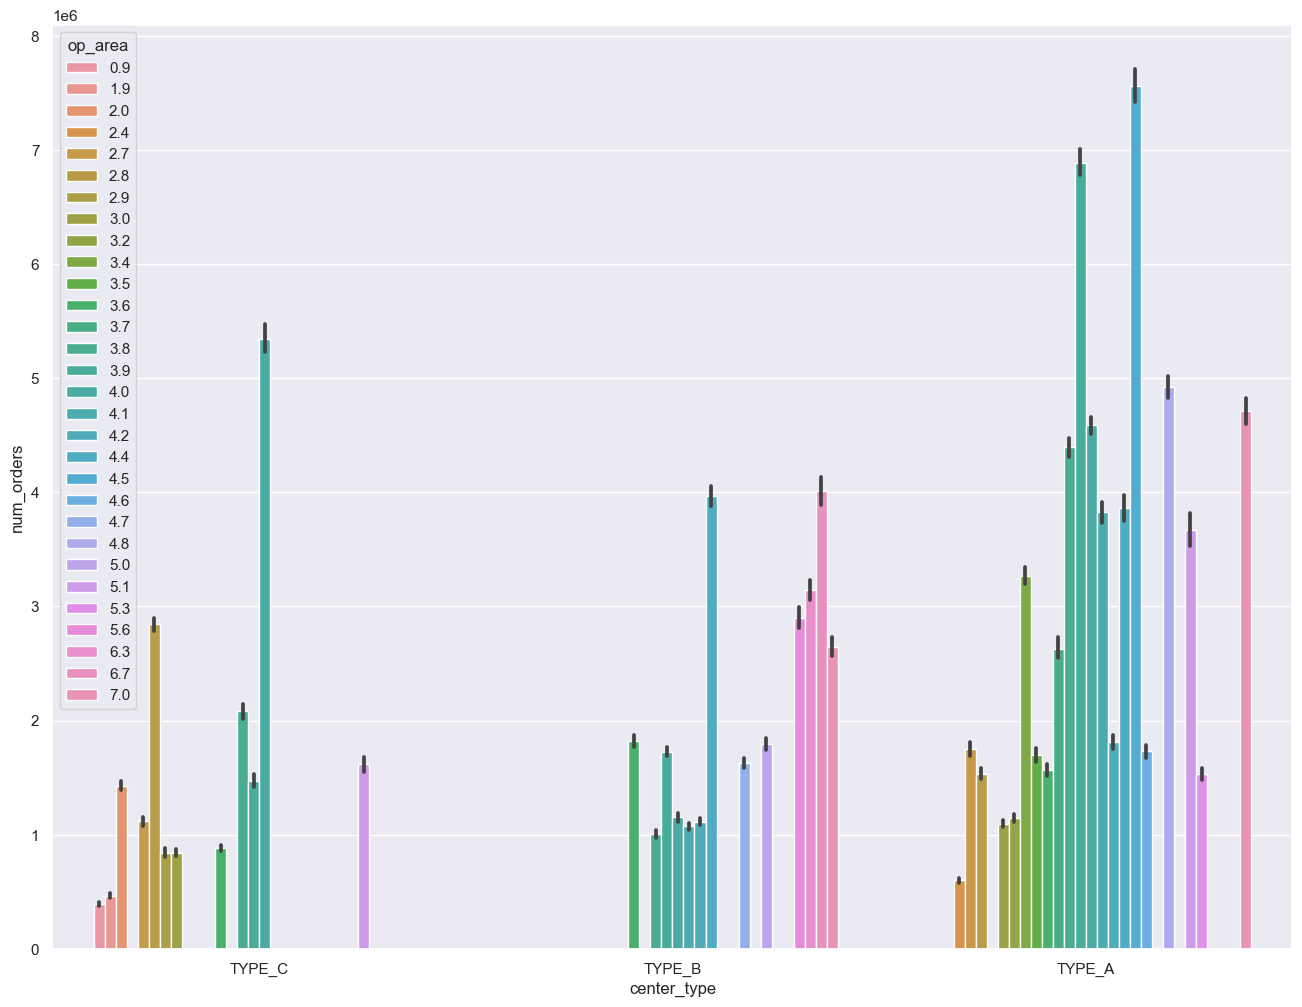

In [46]:
sns.set(rc={'figure.figsize': (16, 12)})
sns.barplot(x="center_type", y="num_orders", hue="op_area", data=full_train_data, estimator="sum")


OBSERVATIONS:
TYpe C is the only one that sells from centers with a very small op area.
Type A might sell better because it has a much more even spread of centers with different op-areas, from smallest to largest.
Type C might be selling poorly because it seems it has very few sales from center in range 4.1-5.0, which is a sweet spot and generates a lot of sales for Type A.
In order to understand this better, let's look at the percentage spread for each op_area.

<Axes: xlabel='center_type', ylabel='percentage'>

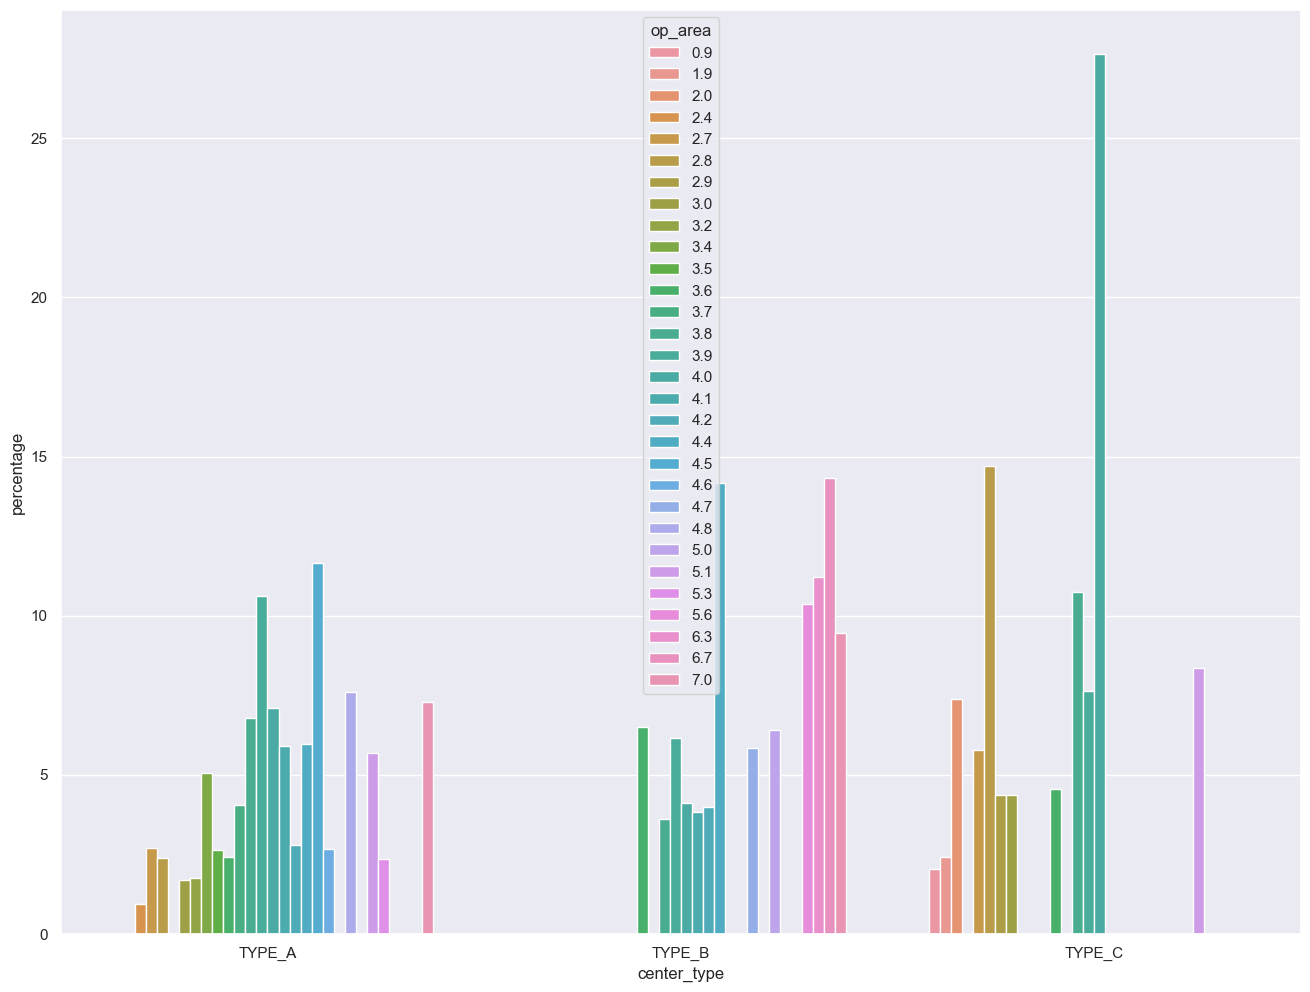

In [47]:
grouped_data_area = full_train_data.groupby(['center_type', 'op_area'])['num_orders'].sum().reset_index()
grouped_data_area = grouped_data_area.merge(total_orders_by_center, on='center_type', suffixes=('', '_total'))
grouped_data_area["percentage"] = grouped_data_area["num_orders"] / grouped_data_area["num_orders_total"] * 100
sns.barplot(x="center_type", y="percentage", hue="op_area", data=grouped_data_area)


As seen above, Type A has a closer to normal (Gaussian) distribution than Type C, which relies heavily on centers in the 4.0-4.2 area. Might be a reason why sales are smaller in type C.

Only thing worth mentioning is that TYPE_C, the lowest selling one has centers with small op_area(e.g. centers that ship on a very small distance around them)

However, none of these insights are extremely powerful to determine changes in the flow.

Let's check if each center_type have the same distribution of op_area. We're curious to see if maybe TYPE_C have a lot of small op_area centers and if that's the reason its sales are lower or other reasons.

<Axes: xlabel='center_type', ylabel='count'>

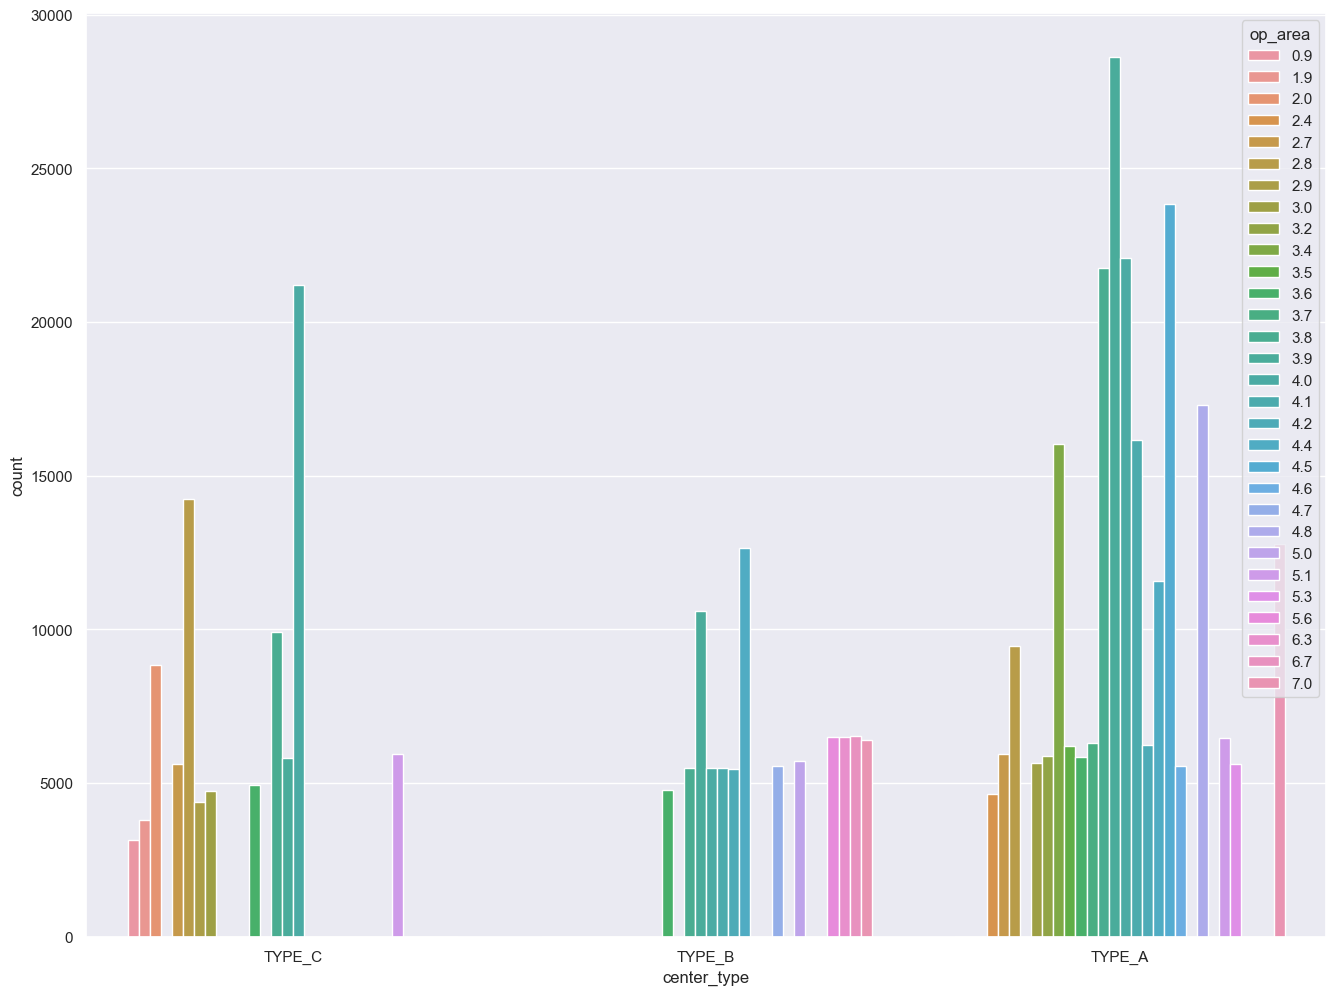

In [48]:
sns.countplot(x="center_type", hue="op_area", data=full_train_data)

OBSERVATIONS:
Comparing the count of op_area chart with the number of orders/% for each op, we can see that the sales generated by each op_area are directly proportional to the numbers of centers with that op_area. Makes perfect sense.
In conclusion, we cannot say that Type C means that it includes only centers with a specific op_area range or other assumptions like this.
We do not see any connection between op_area and center type at the moment, meaning that until further analysis both of these features are relevant for training.


Let's bin the op_area to work easily with it and check if we see anything else.

<Axes: xlabel='op_area', ylabel='num_orders'>

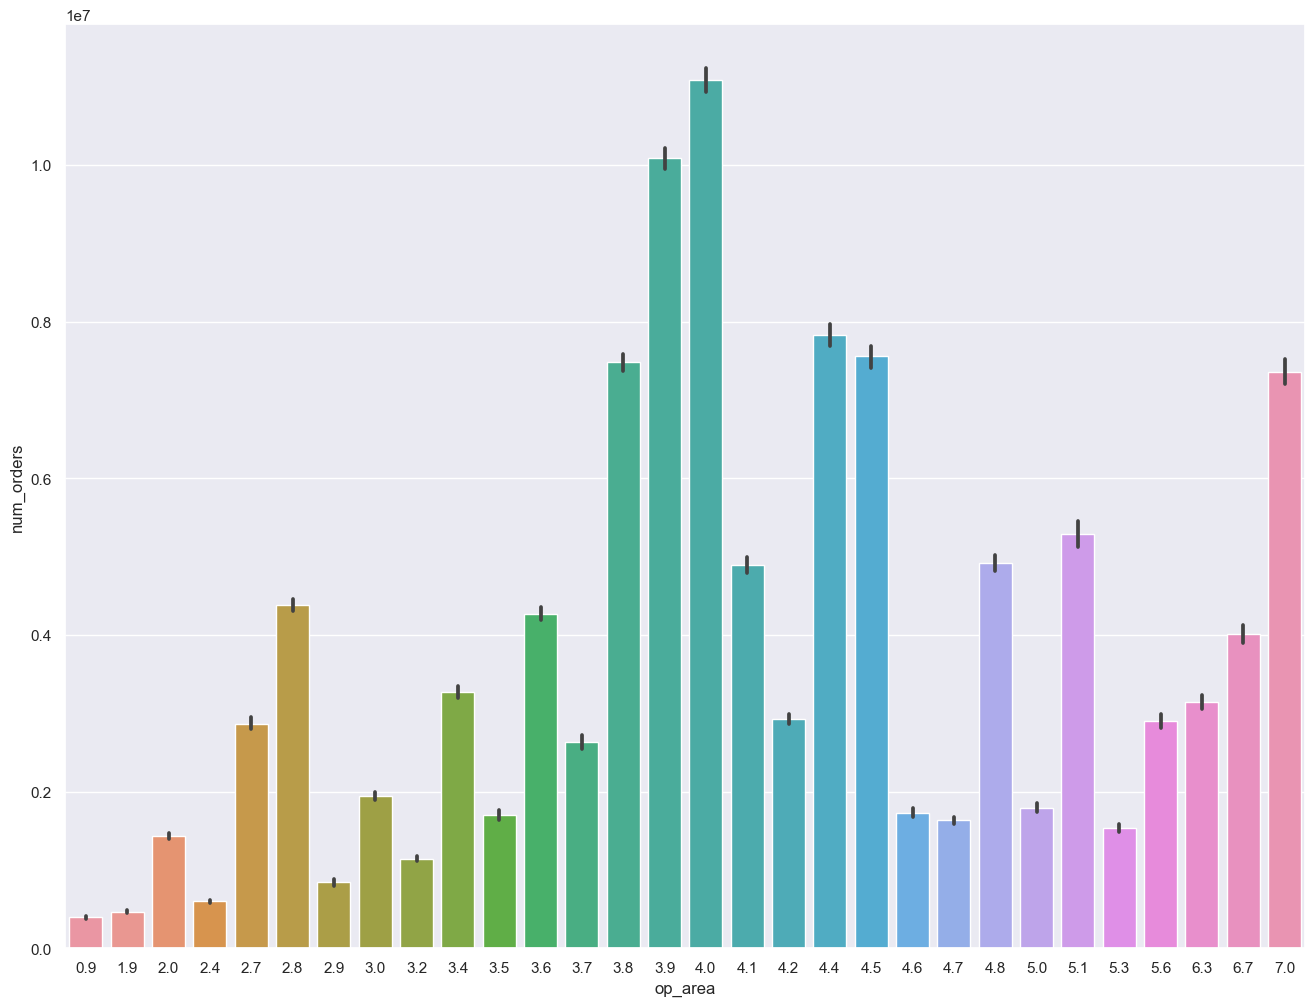

In [49]:
sns.barplot(x="op_area", y="num_orders", data=full_train_data, estimator="sum")

In [50]:
full_train_data['op_area_bin'] = pd.cut(full_train_data['op_area'], [0, 2.4, 3.7, 4.5, 5.1, 6.7, np.inf],
                                        labels=['XS', 'S', 'M', 'L', 'XL', 'XXL'])


<Axes: xlabel='op_area_bin', ylabel='num_orders'>

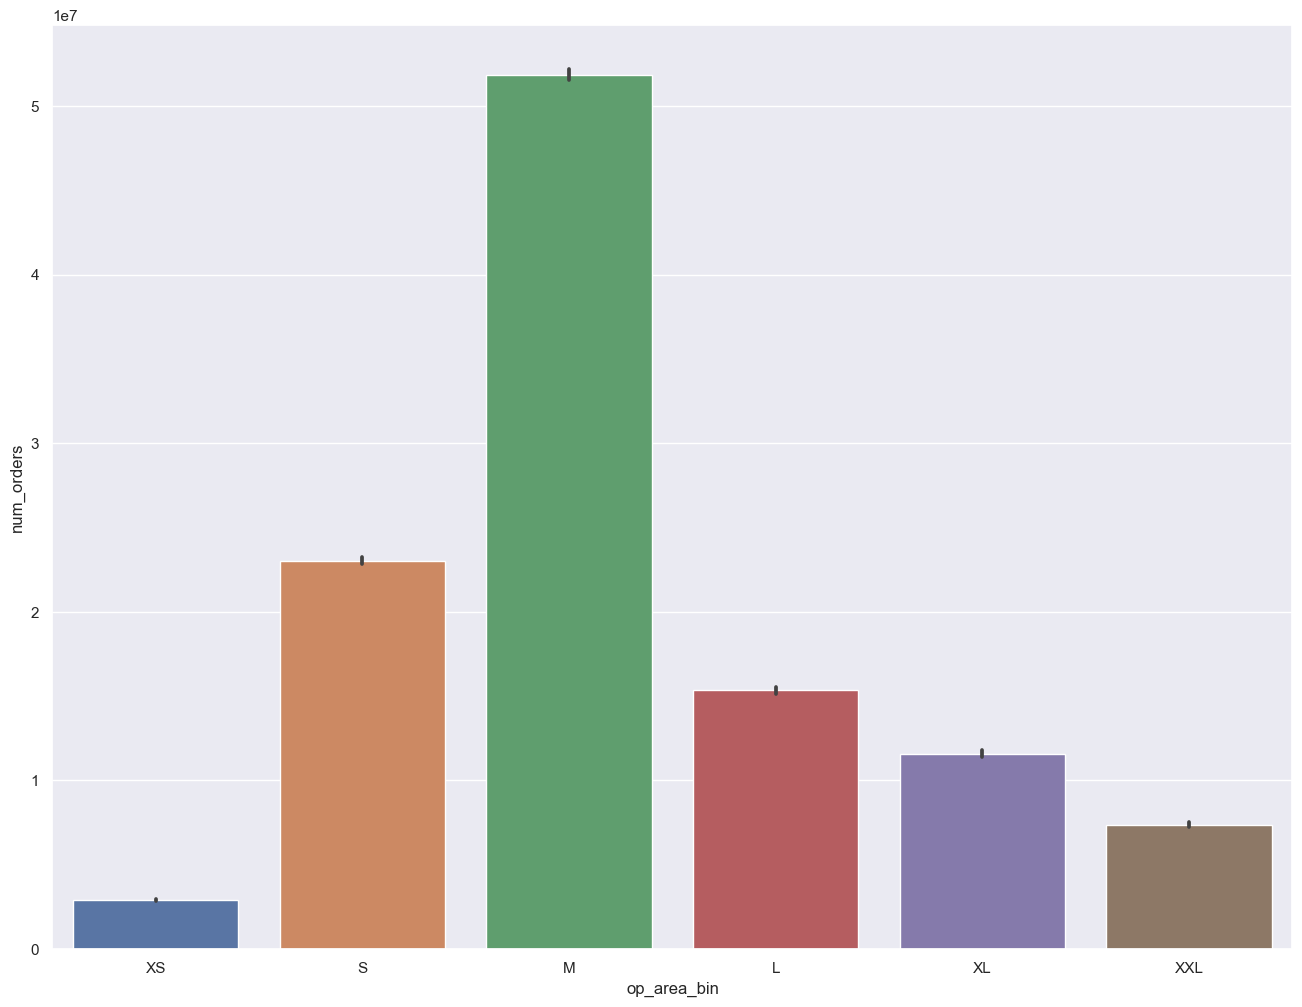

In [51]:
sns.barplot(x="op_area_bin", y="num_orders", data=full_train_data, estimator="sum")

<Axes: xlabel='center_type', ylabel='count'>

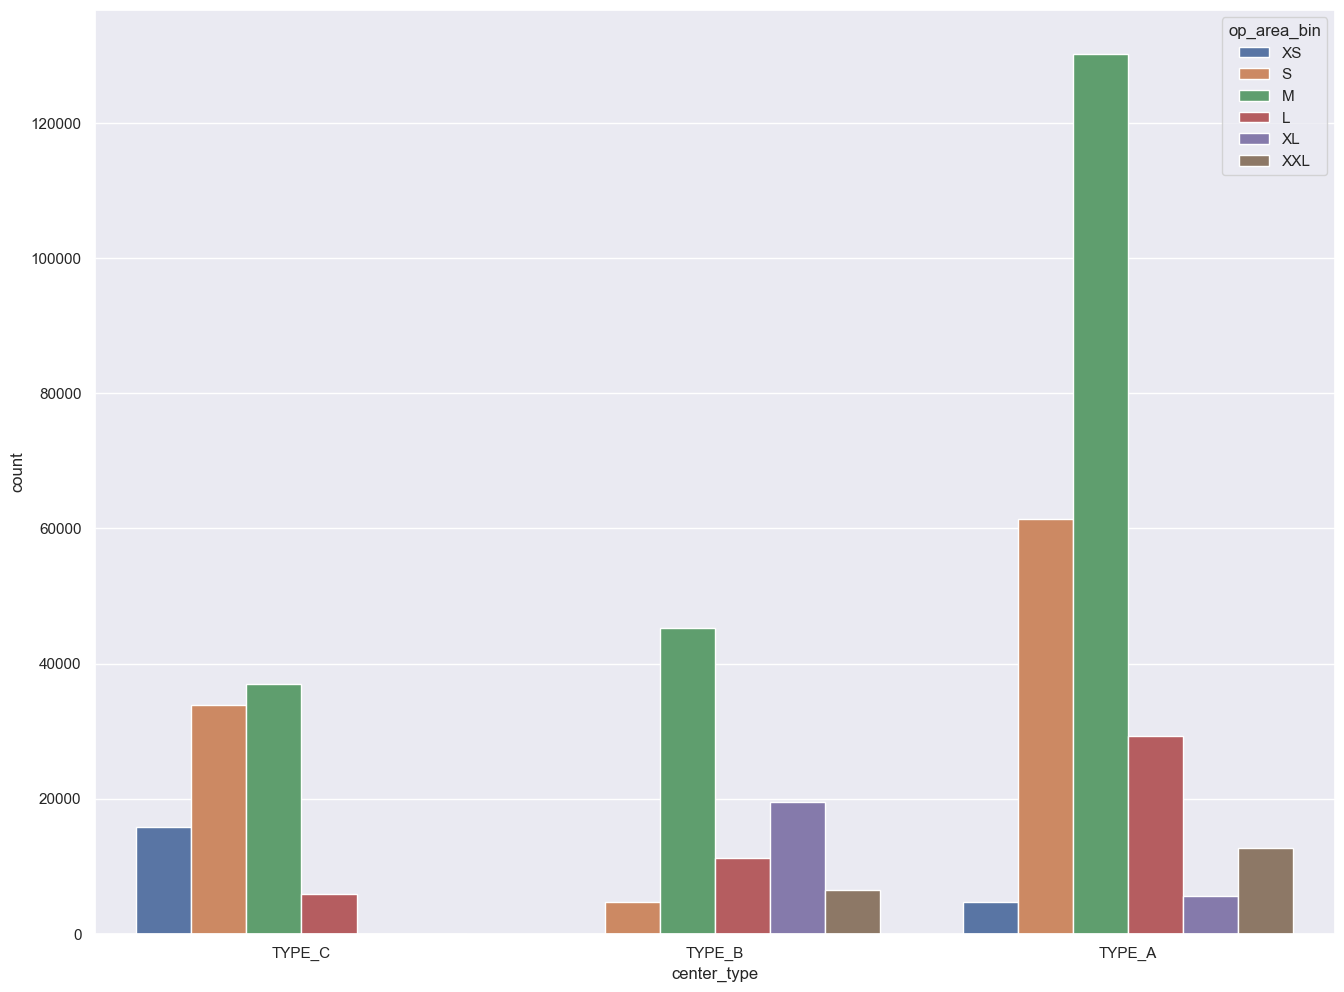

In [52]:
sns.countplot(x="center_type", hue="op_area_bin", data=full_train_data)


<Axes: xlabel='center_type', ylabel='percentage'>

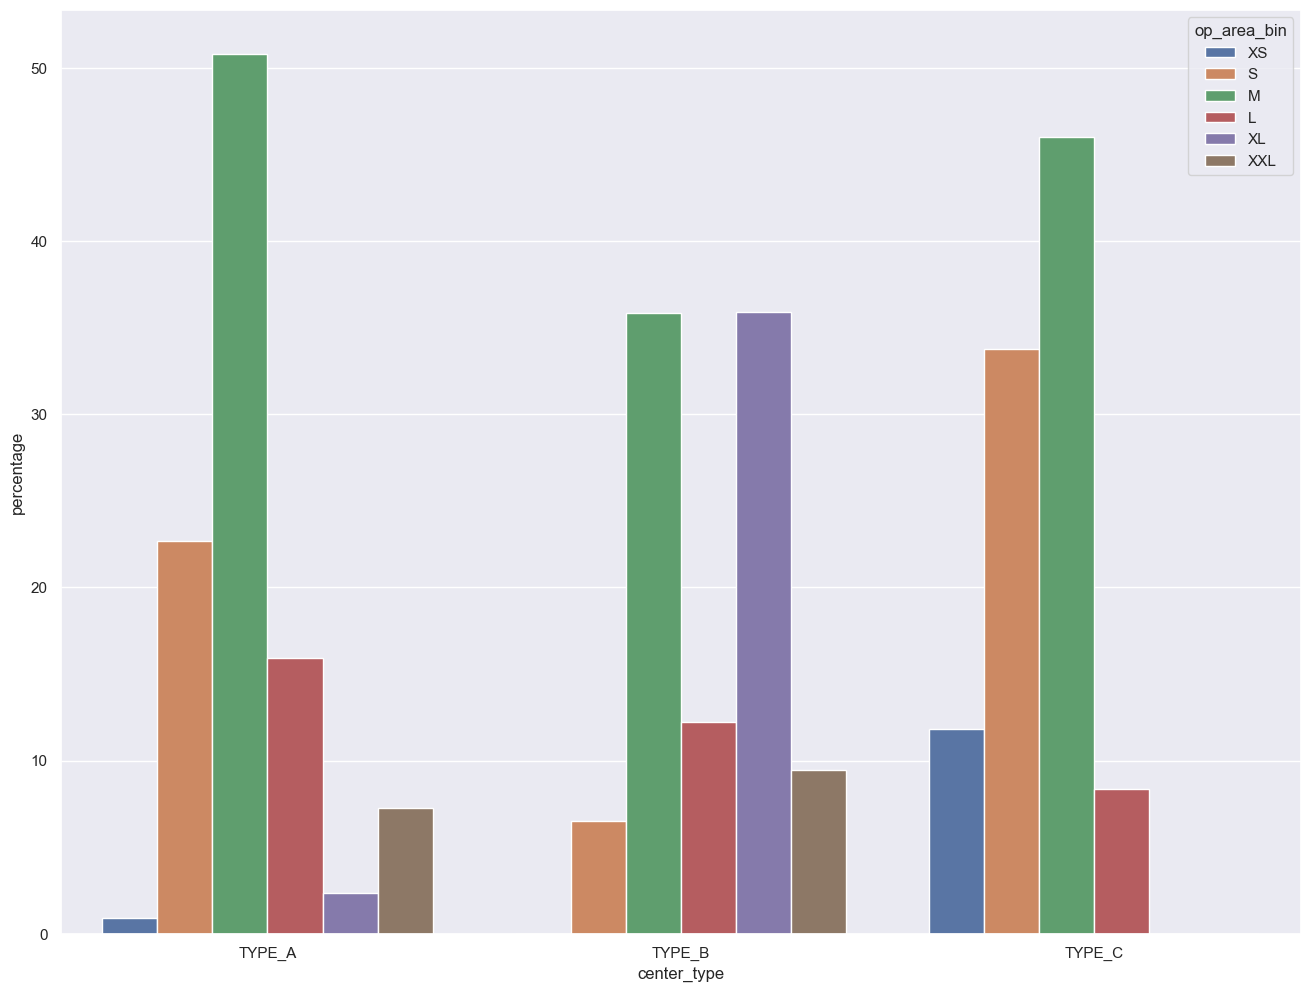

In [53]:
grouped_data_area_bin = full_train_data.groupby(['center_type', 'op_area_bin'])['num_orders'].sum().reset_index()
grouped_data_area_bin = grouped_data_area_bin.merge(total_orders_by_center, on='center_type', suffixes=('', '_total'))
grouped_data_area_bin["percentage"] = grouped_data_area_bin["num_orders"] / grouped_data_area_bin[
    "num_orders_total"] * 100
sns.barplot(x="center_type", y="percentage", hue="op_area_bin", data=grouped_data_area_bin)


In [54]:
op_area_bin_encoded = pd.get_dummies(full_train_data['op_area_bin'], prefix='op_area')
op_area_bin_encoded


op_area_XS  op_area_S  op_area_M  op_area_L  op_area_XL  op_area_XXL
0                1          0          0          0           0            0
1                1          0          0          0           0            0
2                1          0          0          0           0            0
3                1          0          0          0           0            0
4                1          0          0          0           0            0
...            ...        ...        ...        ...         ...          ...
423722           0          0          1          0           0            0
423723           0          0          1          0           0            0
423724           0          0          1          0           0            0
423725           0          0          1          0           0            0
423726           0          0          1          0           0            0

[423727 rows x 6 columns]

In [55]:
full_train_data = pd.concat([full_train_data, op_area_bin_encoded], axis=1)

In [56]:
full_train_data


id  week  center_id  meal_id  checkout_price  base_price  \
0       1379560     1         55     1885          136.83      152.29   
1       1018704     2         55     1885          135.83      152.29   
2       1196273     3         55     1885          132.92      133.92   
3       1116527     4         55     1885          135.86      134.86   
4       1343872     5         55     1885          146.50      147.50   
...         ...   ...        ...      ...             ...         ...   
423722  1282954   131         61     2104          445.29      630.53   
423723  1094245   132         61     2104          435.53      630.53   
423724  1380866   133         61     2104          601.43      630.53   
423725  1111394   134         61     2104          600.43      631.53   
423726  1439333   135         61     2104          602.43      631.53   

        emailer_for_promotion  homepage_featured  num_orders  city_code  ...  \
0                           0                  0         177        647  ...   
1                           0                  0         323        647  ...   
2                           0                  0          96        647  ...   
3                           0                  0         163        647  ...   
4                           0                  0         215        647  ...   
...                       ...                ...         ...        ...  ...   
423722                      0                  1         270        473  ...   
423723                      0                  1         339        473  ...   
423724                      0                  1         107        473  ...   
423725                      0                  1          41        473  ...   
423726                      0                  1          28        473  ...   

        op_area   category      cuisine op_area_bin op_area_XS op_area_S  \
0           2.0  Beverages         Thai          XS          1         0   
1           2.0  Beverages         Thai          XS          1         0   
2           2.0  Beverages         Thai          XS          1         0   
3           2.0  Beverages         Thai          XS          1         0   
4           2.0  Beverages         Thai          XS          1         0   
...         ...        ...          ...         ...        ...       ...   
423722      4.5       Fish  Continental           M          0         0   
423723      4.5       Fish  Continental           M          0         0   
423724      4.5       Fish  Continental           M          0         0   
423725      4.5       Fish  Continental           M          0         0   
423726      4.5       Fish  Continental           M          0         0   

        op_area_M  op_area_L  op_area_XL  op_area_XXL  
0               0          0           0            0  
1               0          0           0            0  
2               0          0           0            0  
3               0          0           0            0  
4               0          0           0            0  
...           ...        ...         ...          ...  
423722          1          0           0            0  
423723          1          0           0            0  
423724          1          0           0            0  
423725          1          0           0            0  
423726          1          0           0            0  

[423727 rows x 22 columns]

In [57]:
new_corrs = full_train_data.corr()
new_corrs['num_orders']


C:\Users\davidlapsanschi\AppData\Local\Temp\ipykernel_9904\1605709767.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_corrs = full_train_data.corr()


id                       0.000882
week                    -0.007385
center_id               -0.051274
meal_id                  0.012068
checkout_price          -0.283021
base_price              -0.221294
emailer_for_promotion    0.283221
homepage_featured        0.299080
num_orders               1.000000
city_code                0.041156
region_code              0.029848
op_area                  0.174464
op_area_XS              -0.068841
op_area_S               -0.047229
op_area_M               -0.050583
op_area_L                0.057217
op_area_XL               0.122118
op_area_XXL              0.064285
Name: num_orders, dtype: float64

Binning the op_area did not give additional insights. Compared to the number of centers in each type all have similar spread of small/medium/large op_areas.

Looking at the correlations of a bin or one hot encoded values with the target is not valid as it will show a linear correlation only (how well it goes up or down with the target). However, a low linear correlation does not mean the bin or encoding is bad. It might still give better results in the ML training if it simplifies the process for the algorithm without losing too much data.

We should test ML results with the bin or without it. We should also test with a smaller bin size. A larger bin size means losing more data and finesse.

# Let's look at data related to cuisine and category. Which cuisine falls in which category and other things here

<Axes: xlabel='category', ylabel='num_orders'>

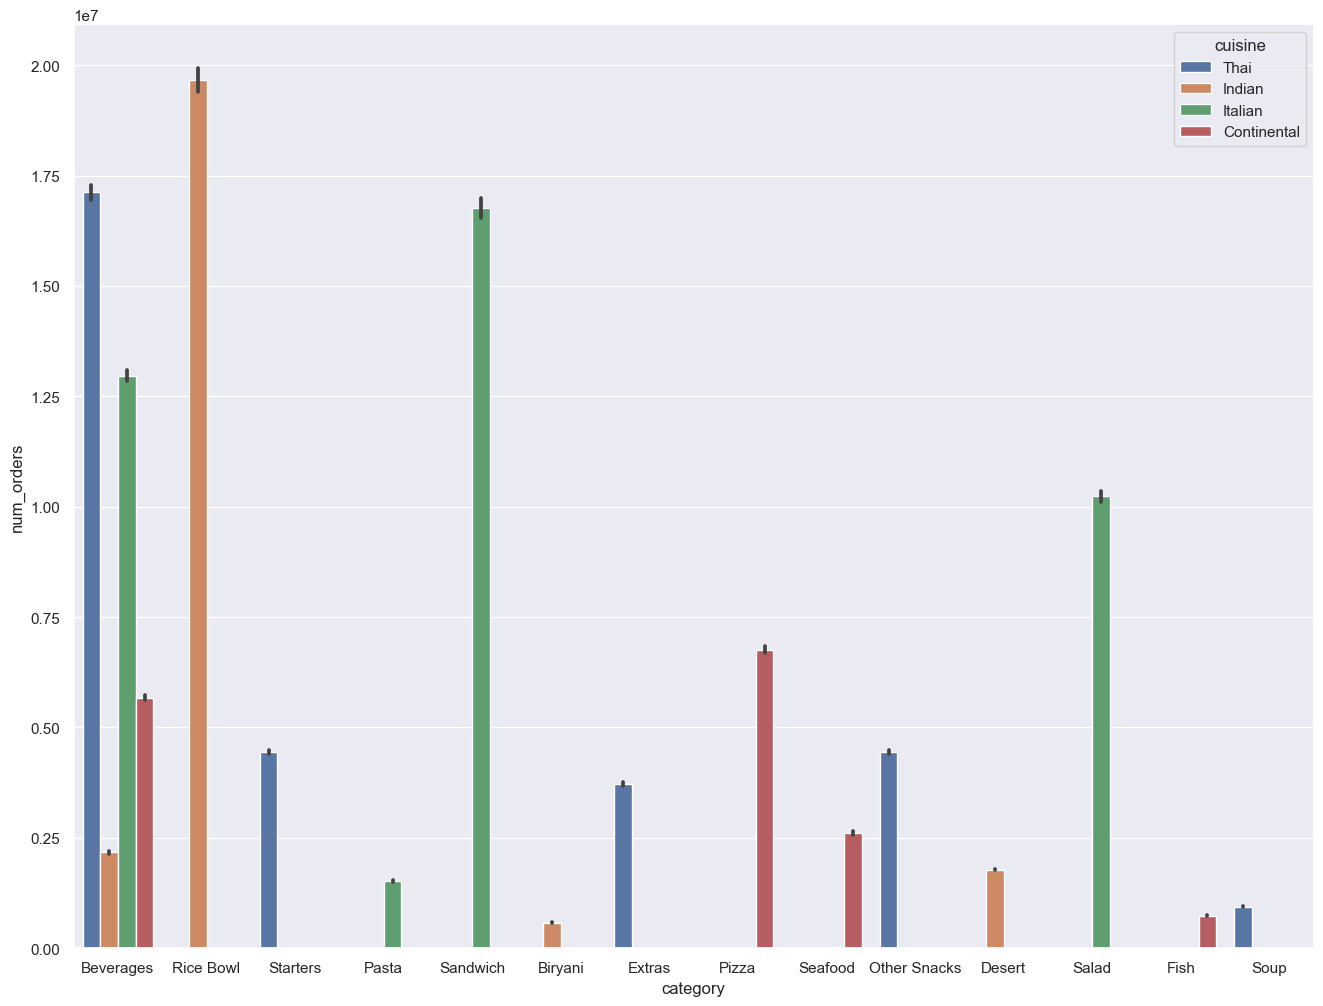

In [58]:
sns.barplot(x="category", y="num_orders", hue="cuisine", data=full_train_data, estimator="sum")

<Axes: xlabel='category', ylabel='count'>

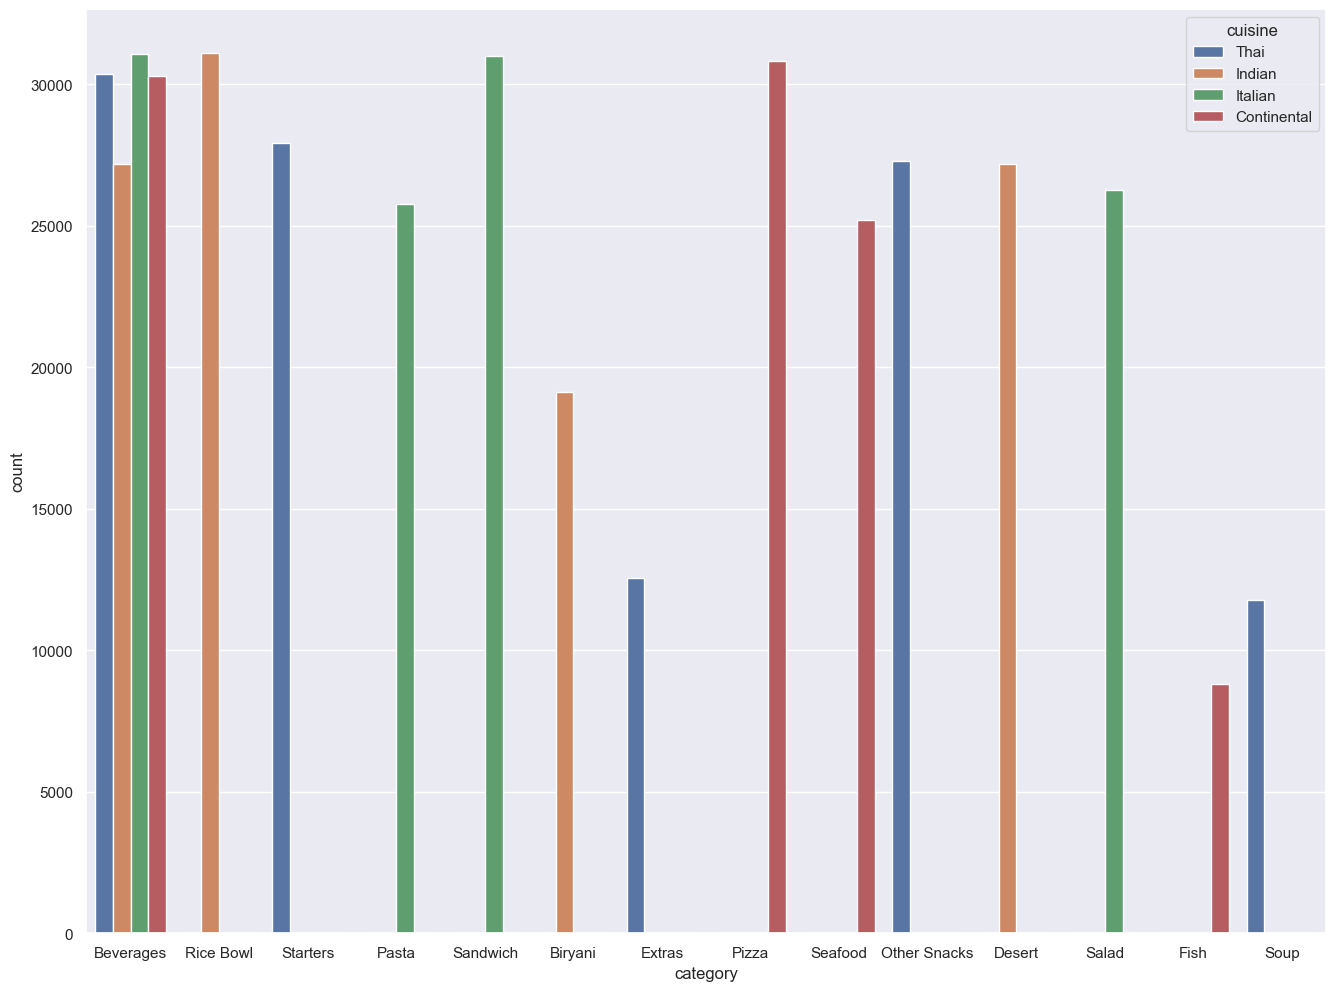

In [59]:
sns.countplot(x="category", hue="cuisine", data=full_train_data)


<Axes: xlabel='category', ylabel='count'>

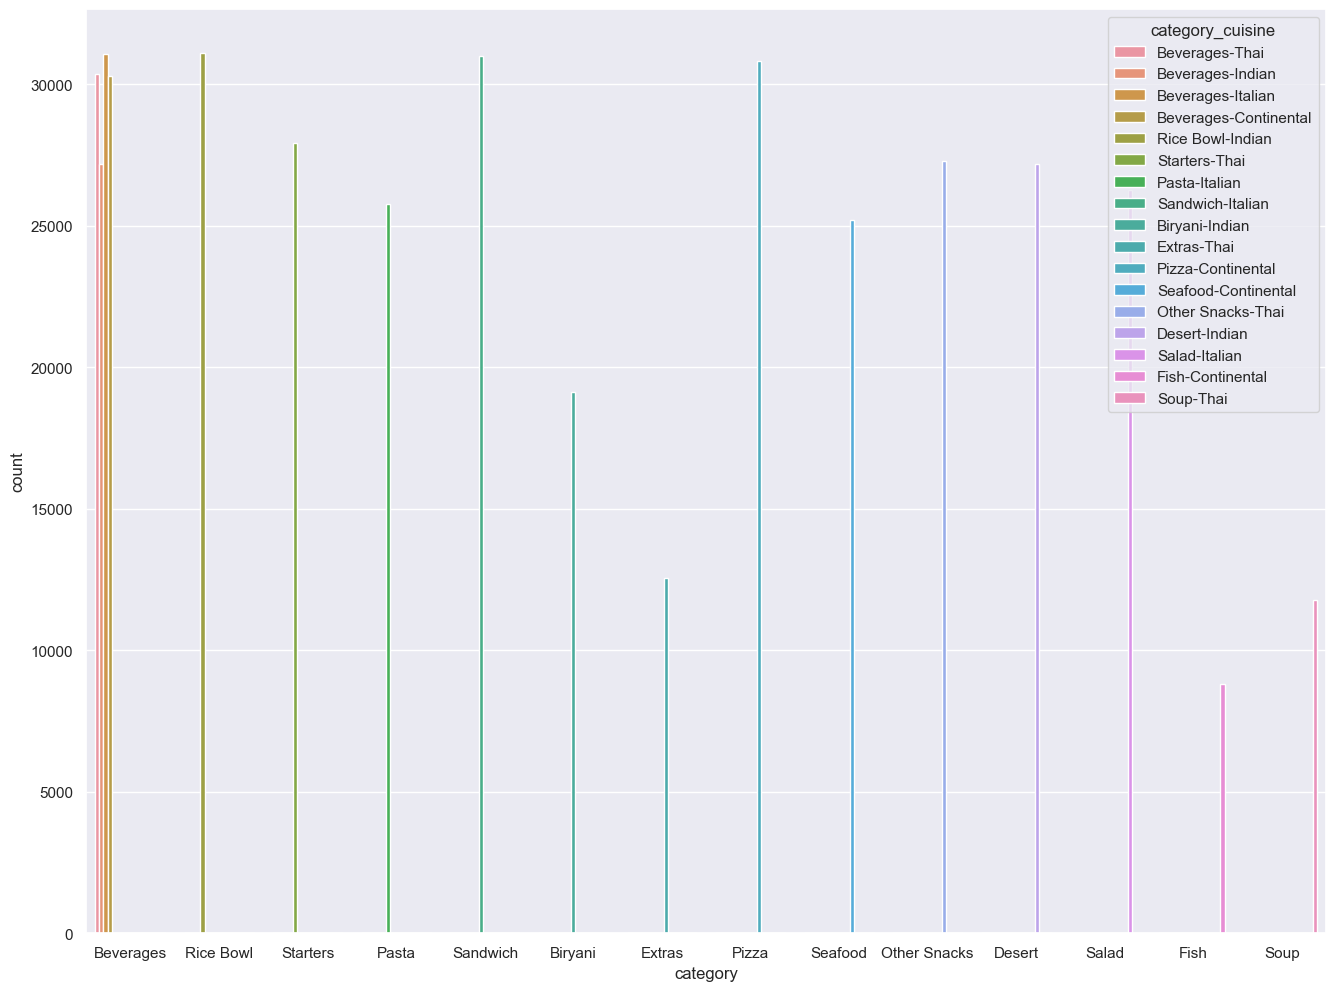

In [60]:
full_train_data["category_cuisine"] = full_train_data['category'] + "-" + full_train_data['cuisine']
sns.countplot(x="category", hue="category_cuisine", data=full_train_data)

OBSERVATIONS:
By looking at the cuisine/category, we can see we only have 4 cuisines.
Beverages category is the only category that has meals from every cuisine.
The rest of the categories only have means from a single cuisine (Pasta category on contains Italian meals, logically).
The cuisine diversity of the beverages category clearly is a factor in the increased sales of beverages as it tells us that almost all centers have beverages regardless of cuisine speciality. However, if a center sells only italian food it will sell Pasta and only other italian things.

## Let's check the center type/cuisine connection. We want to understand if certain center or center Types specialize in a cuisine

In [61]:
full_train_data.groupby(["center_id", "cuisine"])["num_orders"].sum()


center_id  cuisine    
10         Continental     361764
           Indian          797858
           Italian        1038325
           Thai            944135
11         Continental     278663
                           ...   
177        Thai            175590
186        Continental     143717
           Indian          174316
           Italian         297672
           Thai            175261
Name: num_orders, Length: 308, dtype: int64

It is clear from the above, that individual centers do NOT have a speciality. Each center sells food from all the 4 cuisines.
Let's check if there's any relation with center type, although I don't expect there to be one, and we believe we'll see the same thing

In [62]:
full_train_data.groupby(["center_type", "cuisine"])["num_orders"].sum()


center_type  cuisine    
TYPE_A       Continental     9227232
             Indian         13628151
             Italian        23288443
             Thai           18630979
TYPE_B       Continental     3276501
             Indian          6484675
             Italian         9312407
             Thai            8918225
TYPE_C       Continental     3267307
             Indian          4071251
             Italian         8872107
             Thai            3119927
Name: num_orders, dtype: int64

<Axes: xlabel='center_type', ylabel='num_orders'>

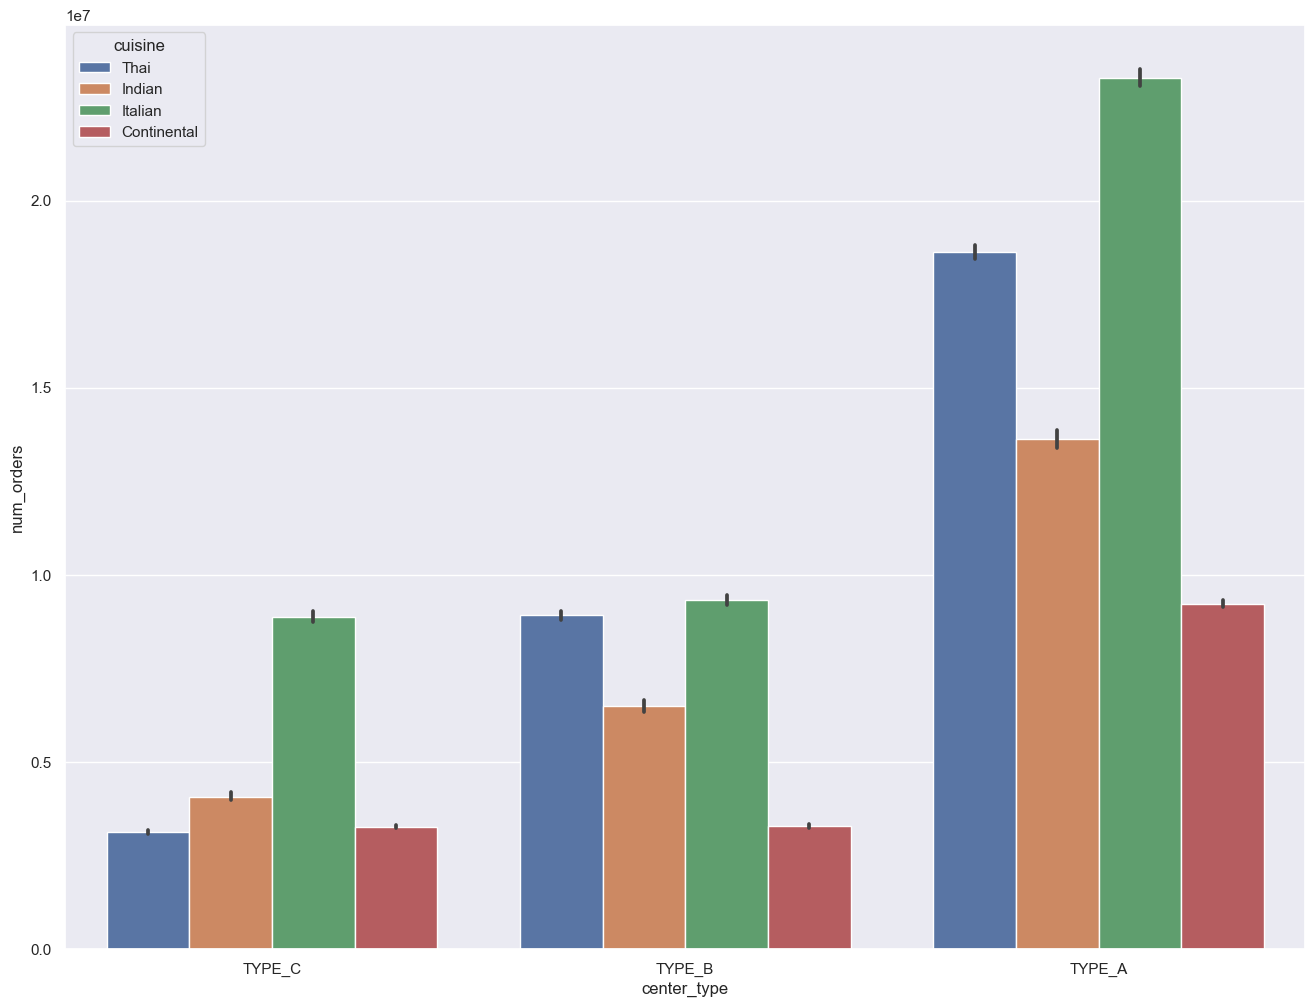

In [63]:
sns.barplot(x="center_type", y="num_orders", hue="cuisine", data=full_train_data, estimator="sum")


<Axes: xlabel='center_type', ylabel='percentage'>

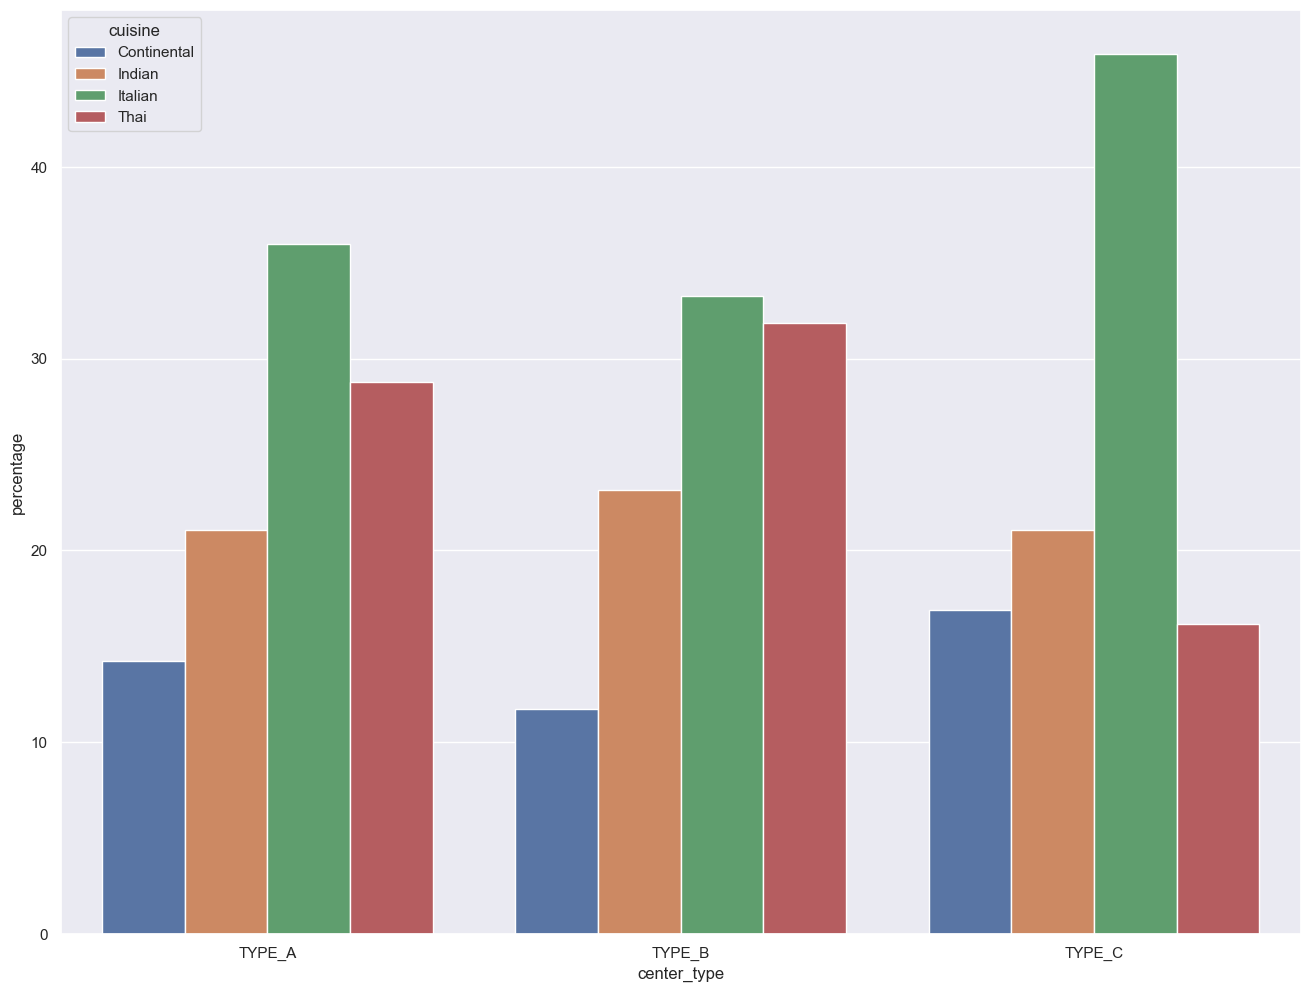

In [64]:
grouped_data_cuisine = full_train_data.groupby(['center_type', 'cuisine'])['num_orders'].sum().reset_index()
grouped_data_cuisine = grouped_data_cuisine.merge(total_orders_by_center, on='center_type', suffixes=('', '_total'))
grouped_data_cuisine["percentage"] = grouped_data_cuisine["num_orders"] / grouped_data_cuisine["num_orders_total"] * 100
sns.barplot(x="center_type", y="percentage", hue="cuisine", data=grouped_data_cuisine)


<Axes: xlabel='center_type', ylabel='percentage'>

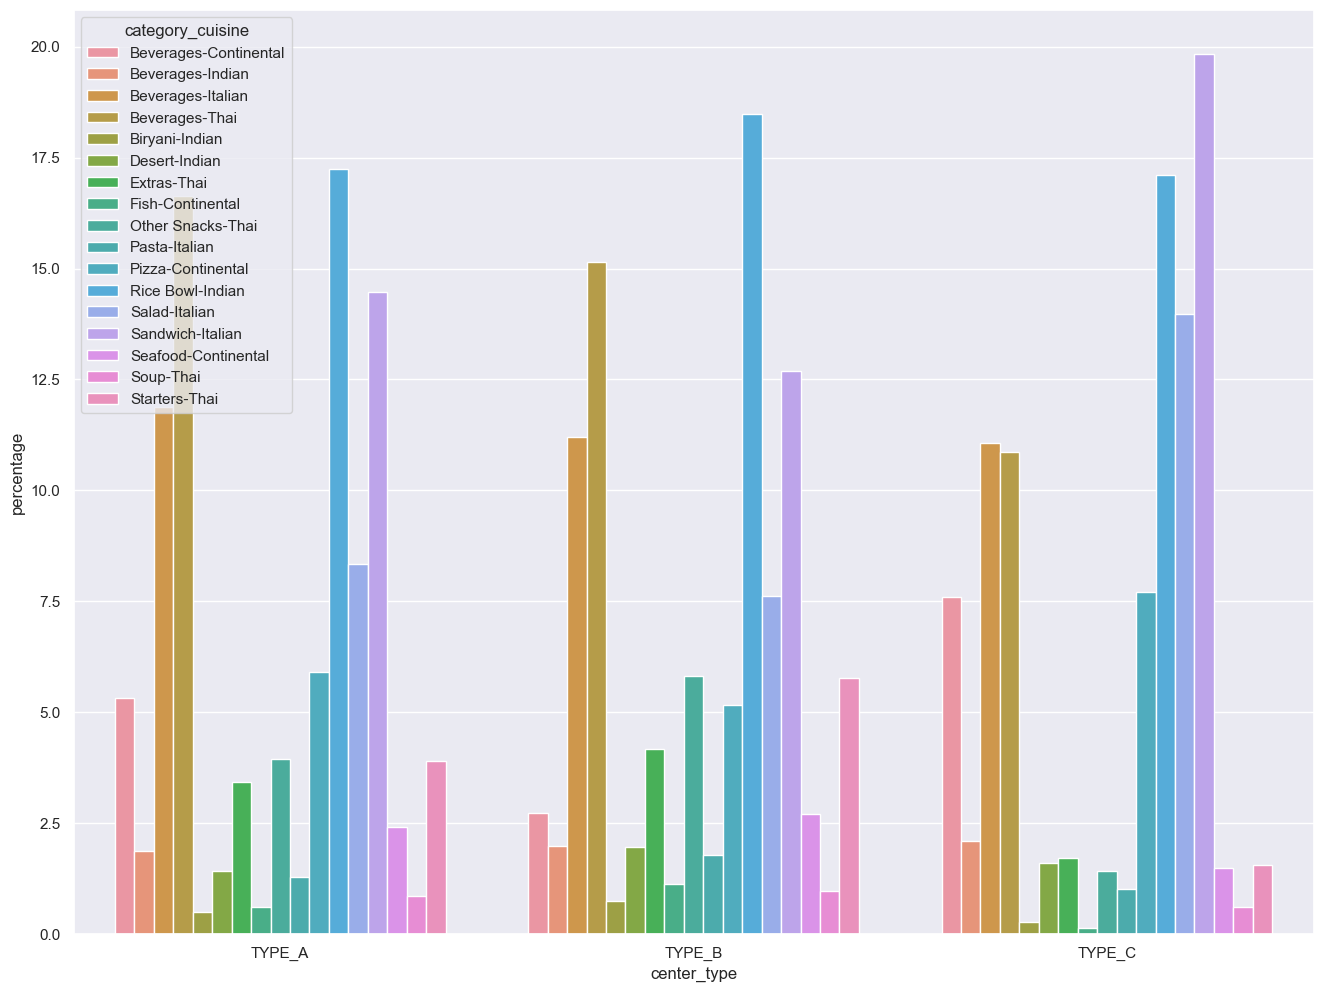

In [65]:
grouped_data_cuisine_cat = full_train_data.groupby(['center_type', 'category_cuisine'])[
    'num_orders'].sum().reset_index()
grouped_data_cuisine_cat = grouped_data_cuisine_cat.merge(total_orders_by_center, on='center_type',
                                                          suffixes=('', '_total'))
grouped_data_cuisine_cat["percentage"] = grouped_data_cuisine_cat["num_orders"] / grouped_data_cuisine_cat[
    "num_orders_total"] * 100
sns.barplot(x="center_type", y="percentage", hue="category_cuisine", data=grouped_data_cuisine_cat)

OBSERVATIONS:
When looking at nr of orders, Type A and B are very similar in distribution, however Type C is the outlier.
Compared to the other, Type C sells less Thai meals that the other center types. The reason for this might be location based or preference based. We can also see from an above chart that Type C sells less from Thai specific categories, notably, Type C sells less Thai Beverages, Extras, Other snacks and Starters. However, # of thai soups are fine in Type C.

The created feature category_cuisine should be checked in ML training to see if it gives better results.

# How price impacts the num_orders. Try binning that as well. Investigate price patterns compared to other features (center type, category, cuisine). Only do these if they're relevant or answer a specific business question.
EX: Are the prices in Type A center higher than type B or C? Does that mean that Type A are "luxury" centers?

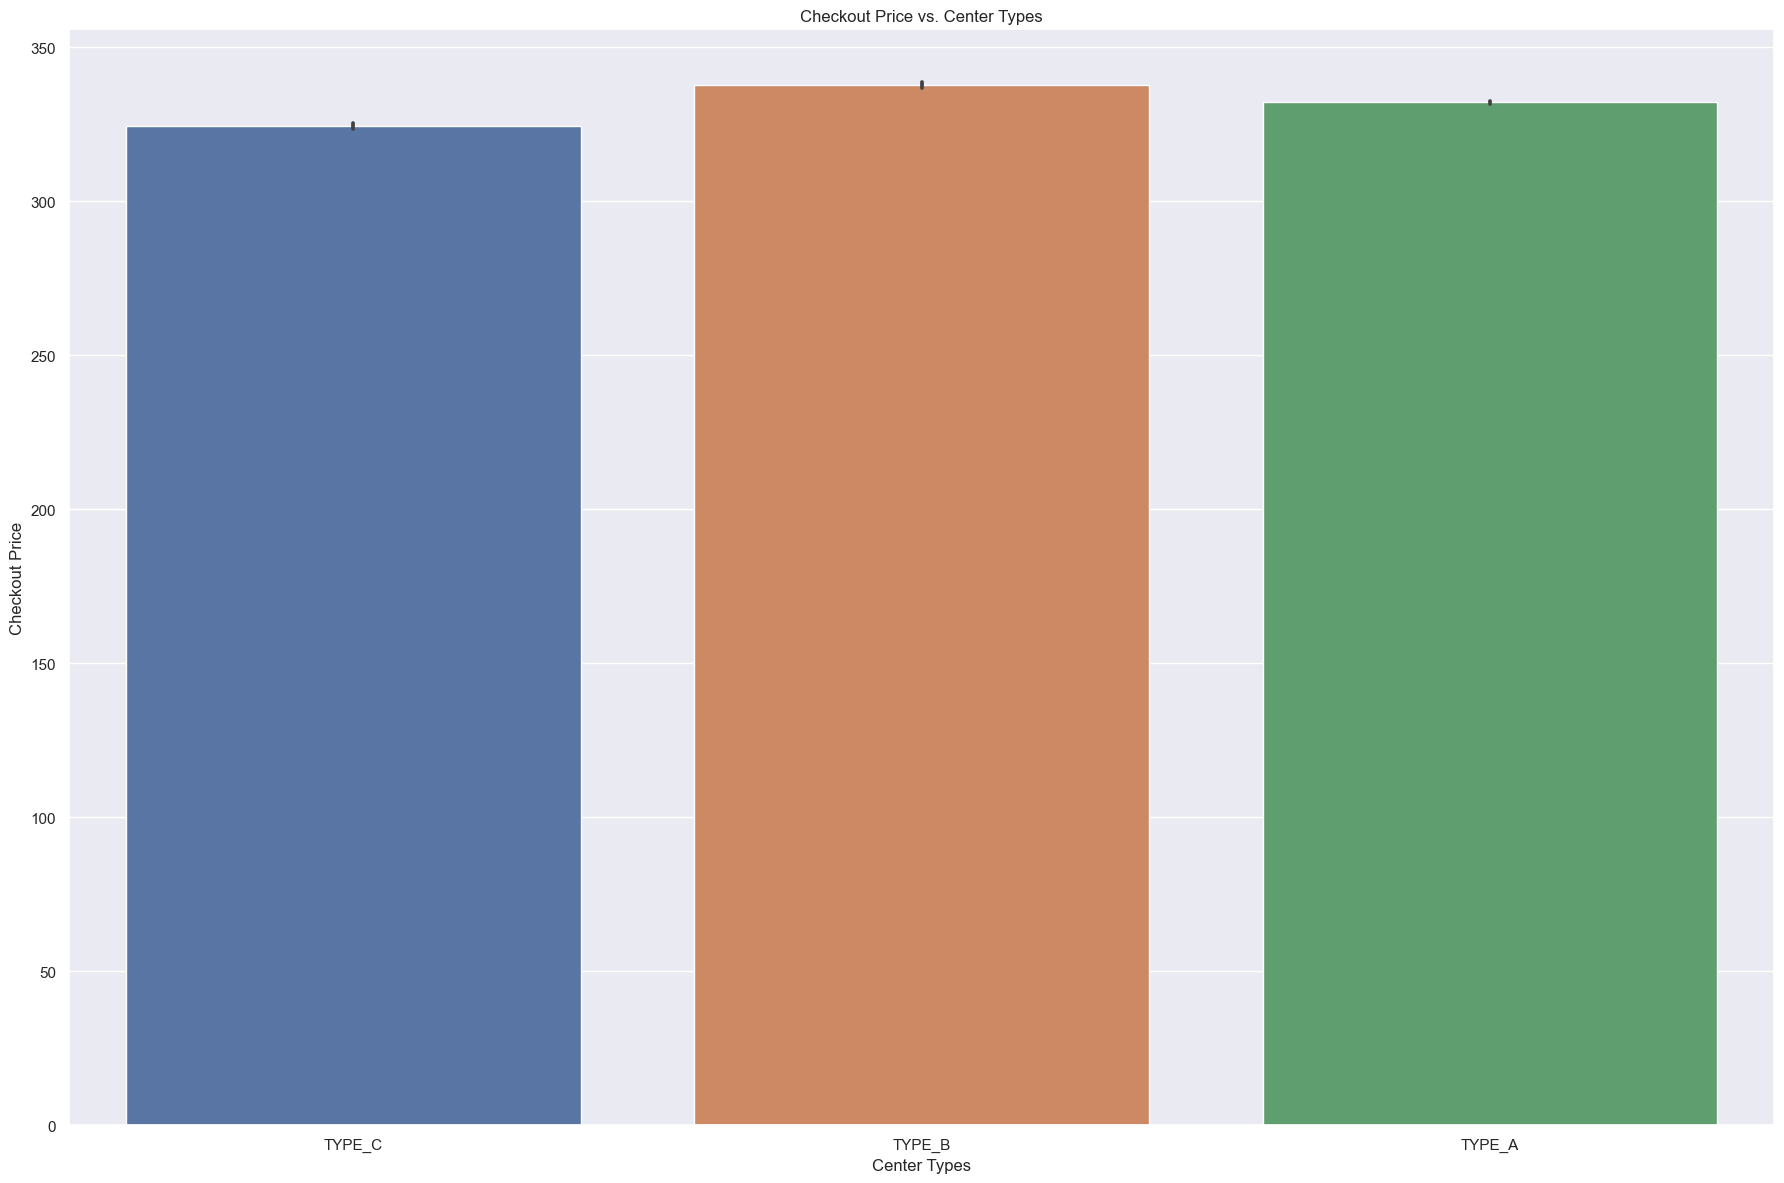

In [66]:
plt.figure(figsize=(18, 12))
sns.barplot(x='center_type', y='checkout_price', data=full_train_data)
plt.title('Checkout Price vs. Center Types')
plt.xlabel('Center Types')
plt.ylabel('Checkout Price')
plt.tight_layout()
plt.show()


#### These average prices per center types do not really vary, they are close to each other, between 320-350.
### Let's see these averages by categories too.


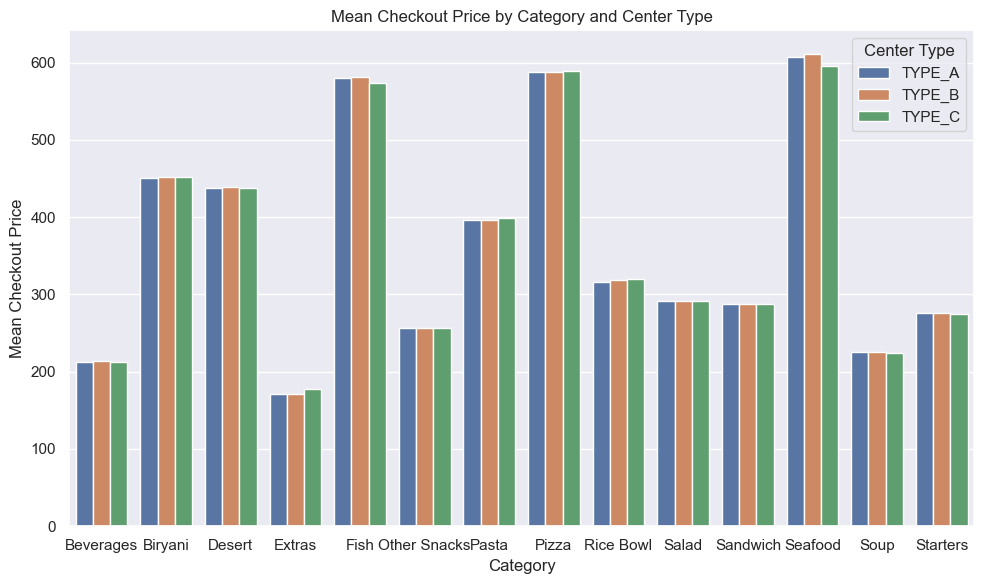

In [67]:
mean_prices = full_train_data.groupby(['center_type', 'category'])['checkout_price'].mean().reset_index()
# Pivot the data to have center types as columns and categories as rows
pivot_table = mean_prices.pivot_table(index='category', columns='center_type', values='checkout_price')

plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='checkout_price', hue='center_type', data=mean_prices)
plt.title('Mean Checkout Price by Category and Center Type')
plt.xlabel('Category')
plt.ylabel('Mean Checkout Price')

plt.tight_layout()
plt.legend(title='Center Type')

plt.show()

##### As the averages by types showed that they are similar, the same this is shown here, by categories. Each type center sells each product with almost the same average price. Foods like Seafood, Fish and Pizza are the most expensive categories, while the Soups, Beverages and Extras as the least expensive.

###### Let's see the minimum/maximum checkout price for each center type.

In [68]:
#max price for each center type
max_prices = full_train_data.groupby('center_type')['checkout_price'].max()

#min price for each center type
min_prices = full_train_data.groupby('center_type')['checkout_price'].min()

max_prices, min_prices

(center_type
 TYPE_A    866.27
 TYPE_B    767.33
 TYPE_C    767.33
 Name: checkout_price, dtype: float64,
 center_type
 TYPE_A     2.97
 TYPE_B    53.41
 TYPE_C    45.62
 Name: checkout_price, dtype: float64)

#### The maximum checkout prices are close to each other, only Type A has a higher one, while on the other hand, looking at the minimum prices, Type A has a very low lowest price, compared to B and C.  This means that center type A which sells the most and have the most centers does not mean that it also have very expensive products compared to types B and C.

#### Maybe seeing the frequency of the checkout prices split into bins can give us relevant info.

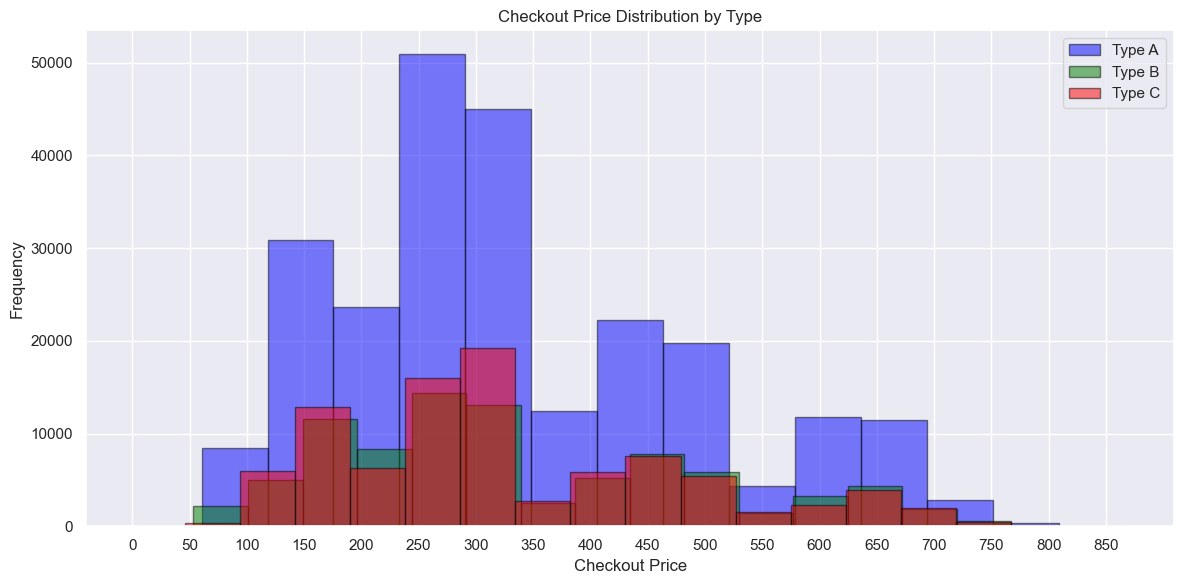

In [69]:
# Separate data by type
type_a_data = full_train_data[full_train_data['center_type'] == 'TYPE_A']
type_b_data = full_train_data[full_train_data['center_type'] == 'TYPE_B']
type_c_data = full_train_data[full_train_data['center_type'] == 'TYPE_C']

# Create histograms for each type
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.hist(type_a_data['checkout_price'], bins=15, color='blue', alpha=0.5, label='Type A', edgecolor='black')
plt.hist(type_b_data['checkout_price'], bins=15, color='green', alpha=0.5, label='Type B', edgecolor='black')
plt.hist(type_c_data['checkout_price'], bins=15, color='red', alpha=0.5, label='Type C', edgecolor='black')

plt.title('Checkout Price Distribution by Type')
plt.xlabel('Checkout Price')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.xticks(range(0, 900, 50))
plt.show()

#### This plot can show the frequency of the checkout prices and how they are spread along the three types of centers and as we already know, type A sells most and have most center, therefore it has the highest frequency. Although, all three centers have a similar structure, Types B and C are almost identical, but the "shape" is similar. The highest peaks for all are encountered at prices between 250-350. There is a tendency for the center types to sell products with smaller price (till 350), rather than the ones from 400 and so on.

### Let's see all the previous plots, but for the base price. In this way, we can follow up if there are trends for ordering more when certain discounts are applied or products are promoted via email/webpage.

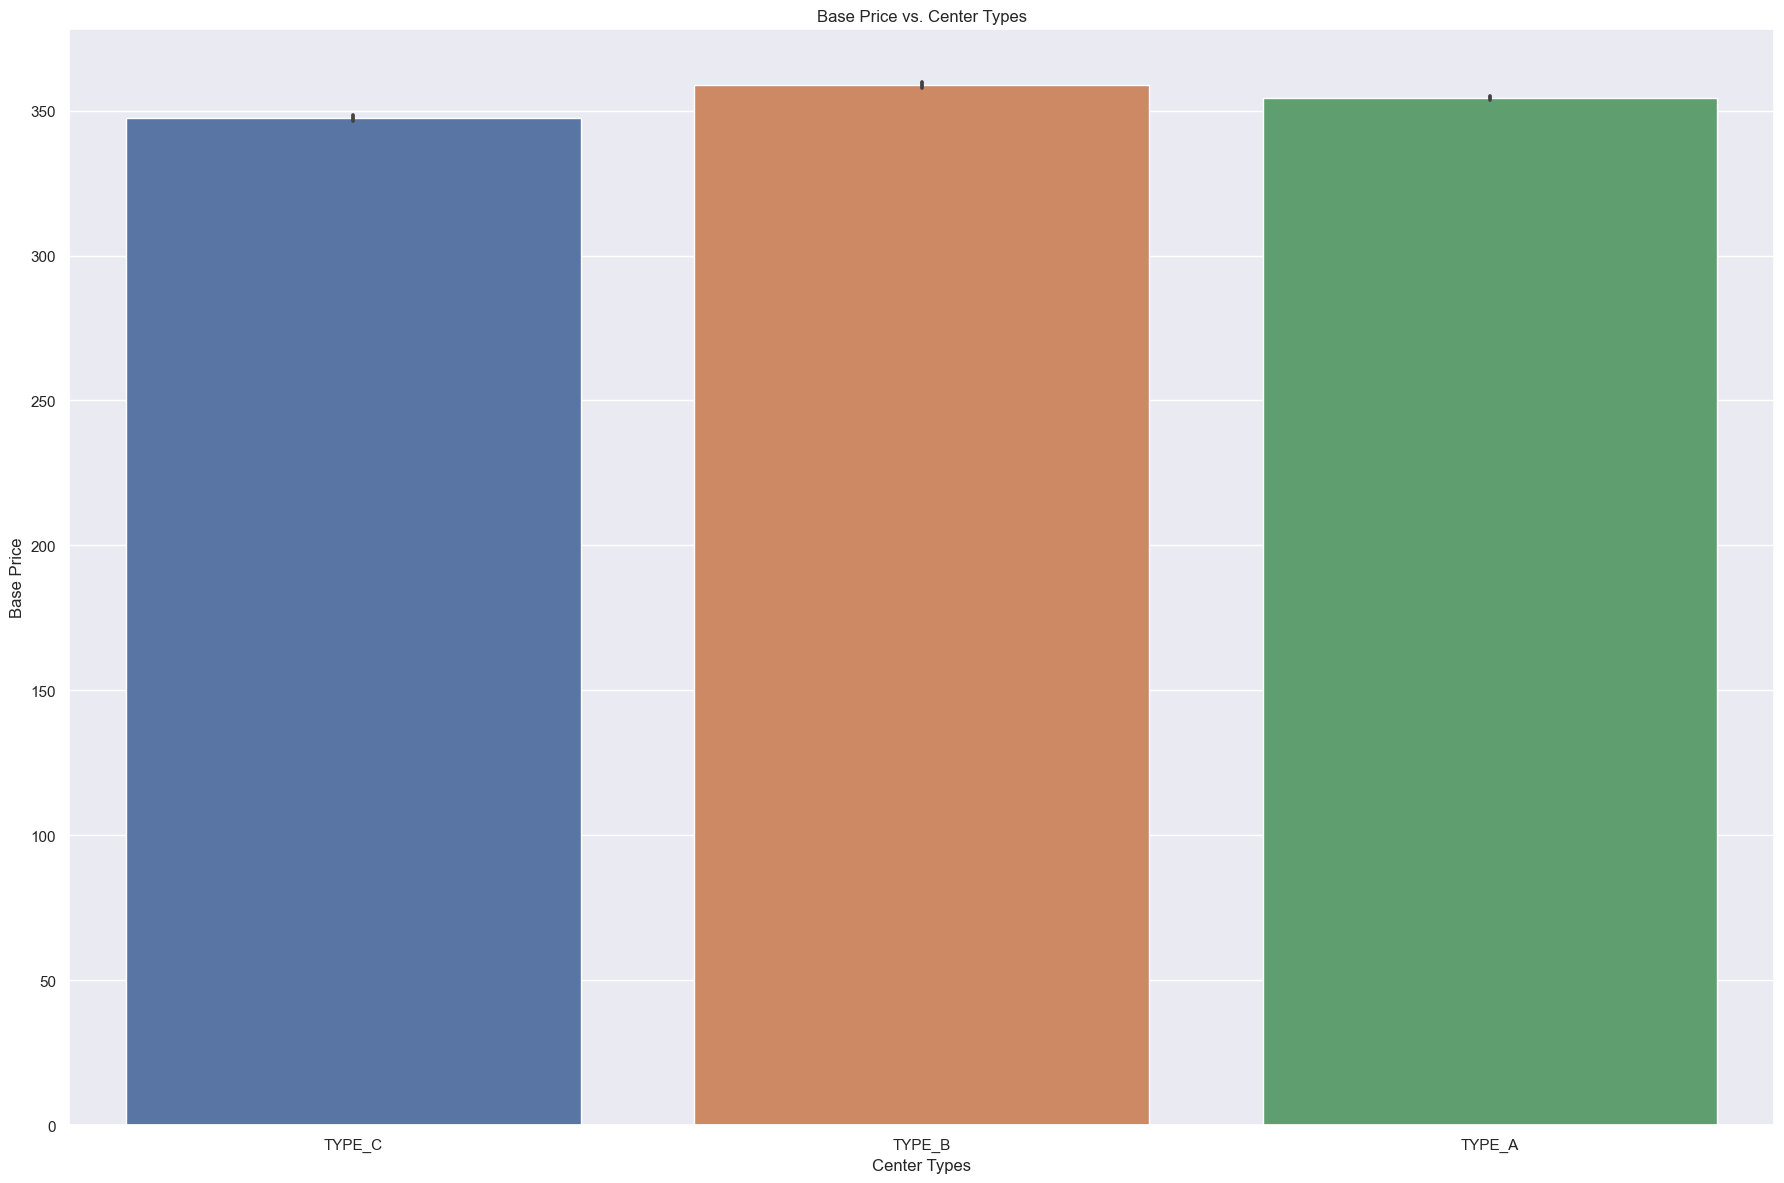

In [70]:
plt.figure(figsize=(18, 12))
sns.barplot(x='center_type', y='base_price', data=full_train_data)
plt.title('Base Price vs. Center Types')
plt.xlabel('Center Types')
plt.ylabel('Base Price')
plt.tight_layout()
plt.show()


#### The situation is similar to the checkout price plot, where Type B has the highest base price, followed by Type A and Type C, but all three of them are close, being situated between 340 and 360. (this range for checkout price was 320-250)

### Averages by categories:

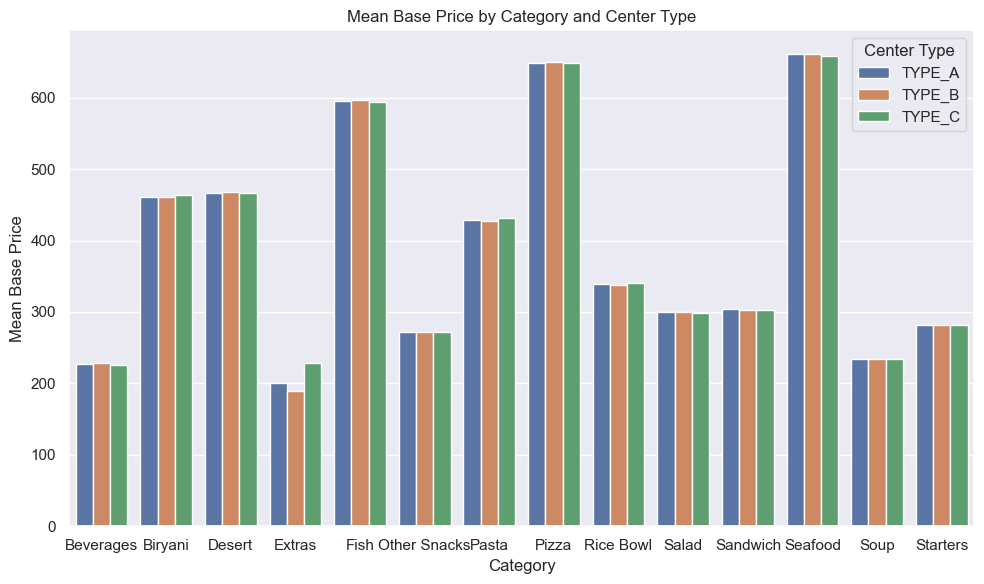

In [71]:
mean_prices = full_train_data.groupby(['center_type', 'category'])['base_price'].mean().reset_index()
# Pivot the data to have center types as columns and categories as rows
pivot_table = mean_prices.pivot_table(index='category', columns='center_type', values='base_price')

plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='base_price', hue='center_type', data=mean_prices)
plt.title('Mean Base Price by Category and Center Type')
plt.xlabel('Category')
plt.ylabel('Mean Base Price')

plt.tight_layout()
plt.legend(title='Center Type')

plt.show()

##### Again, these bars are similar to the ones created for checkout prices, the only thing to be mentioned here would be that pizza seems to have a higher discount than the other categories, because it has the highest difference between the checkout price and base price.

### Here are the minimum/maximum prices for base prices, for each type of center:

In [72]:
#max price for each center type
max_prices = full_train_data.groupby('center_type')['base_price'].max()

#min price for each center type
min_prices = full_train_data.groupby('center_type')['base_price'].min()

max_prices, min_prices

(center_type
 TYPE_A    866.27
 TYPE_B    767.33
 TYPE_C    767.33
 Name: base_price, dtype: float64,
 center_type
 TYPE_A    65.02
 TYPE_B    84.39
 TYPE_C    55.35
 Name: base_price, dtype: float64)

#####   So, the maximum prices are identical to the ones for checkout price, but the minimum checkout prices are way different from the minimum base prices:   Checkout_price_ Type A = 2.97   and  Base_price_Type A = 65.02  (biggest discounts, wow, maybe Type A give the best discounts, we should definitely investigate that), Checkout_price_Type B = 53.41 and Base_price_Type B = 84.39 (again, here it can be observed that it offers big discounts), Checkout_price_Type C = 55.35 and Base_price_Type C = 45.62 (smaller price difference)

### Let's create a new column to compare the checkout price to the base price, and if the checkout price is smaller, it means that there is a discount applied. 

In [73]:
full_train_data['is_discount'] = (full_train_data['checkout_price'] < full_train_data['base_price']).astype(int)

In [74]:
full_train_data

id  week  center_id  meal_id  checkout_price  base_price  \
0       1379560     1         55     1885          136.83      152.29   
1       1018704     2         55     1885          135.83      152.29   
2       1196273     3         55     1885          132.92      133.92   
3       1116527     4         55     1885          135.86      134.86   
4       1343872     5         55     1885          146.50      147.50   
...         ...   ...        ...      ...             ...         ...   
423722  1282954   131         61     2104          445.29      630.53   
423723  1094245   132         61     2104          435.53      630.53   
423724  1380866   133         61     2104          601.43      630.53   
423725  1111394   134         61     2104          600.43      631.53   
423726  1439333   135         61     2104          602.43      631.53   

        emailer_for_promotion  homepage_featured  num_orders  city_code  ...  \
0                           0                  0         177        647  ...   
1                           0                  0         323        647  ...   
2                           0                  0          96        647  ...   
3                           0                  0         163        647  ...   
4                           0                  0         215        647  ...   
...                       ...                ...         ...        ...  ...   
423722                      0                  1         270        473  ...   
423723                      0                  1         339        473  ...   
423724                      0                  1         107        473  ...   
423725                      0                  1          41        473  ...   
423726                      0                  1          28        473  ...   

            cuisine op_area_bin  op_area_XS op_area_S op_area_M op_area_L  \
0              Thai          XS           1         0         0         0   
1              Thai          XS           1         0         0         0   
2              Thai          XS           1         0         0         0   
3              Thai          XS           1         0         0         0   
4              Thai          XS           1         0         0         0   
...             ...         ...         ...       ...       ...       ...   
423722  Continental           M           0         0         1         0   
423723  Continental           M           0         0         1         0   
423724  Continental           M           0         0         1         0   
423725  Continental           M           0         0         1         0   
423726  Continental           M           0         0         1         0   

        op_area_XL  op_area_XXL  category_cuisine  is_discount  
0                0            0    Beverages-Thai            1  
1                0            0    Beverages-Thai            1  
2                0            0    Beverages-Thai            1  
3                0            0    Beverages-Thai            0  
4                0            0    Beverages-Thai            1  
...            ...          ...               ...          ...  
423722           0            0  Fish-Continental            1  
423723           0            0  Fish-Continental            1  
423724           0            0  Fish-Continental            1  
423725           0            0  Fish-Continental            1  
423726           0            0  Fish-Continental            1  

[423727 rows x 24 columns]

##### How many values have discounts?  

In [75]:
full_train_data['is_discount'].value_counts()

1    214227
0    209500
Name: is_discount, dtype: int64

#### 50% of them have discounts!

##### But how are they distributed along center types? 

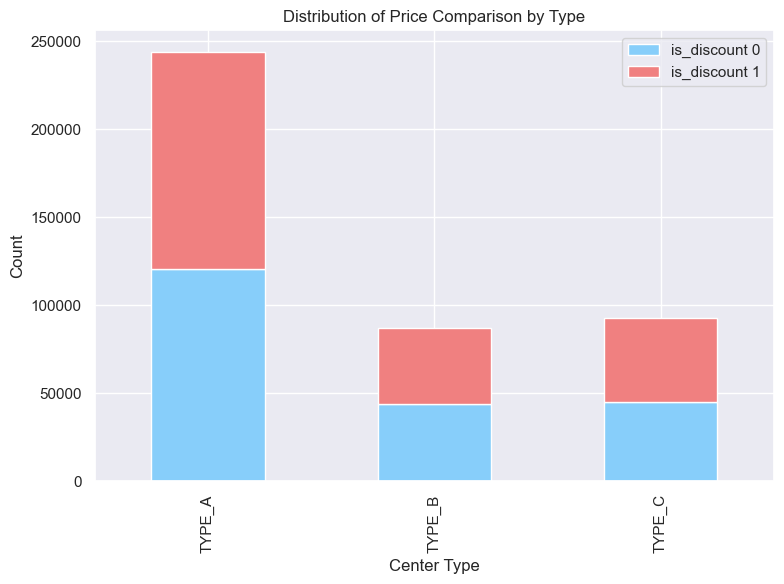

In [76]:
grouped_data = full_train_data.groupby(['center_type', 'is_discount']).size().unstack(fill_value=0)

ax = grouped_data.plot(kind='bar', figsize=(8, 6), stacked=True, color=['lightskyblue', 'lightcoral'])
plt.title('Distribution of Price Comparison by Type')
plt.xlabel('Center Type')
plt.ylabel('Count')
plt.legend(['is_discount 0', 'is_discount 1'])
plt.tight_layout()
plt.show()

#### Looks like they all have about 50% discounts and 50% without discounts, at different scales, becauze A sells the most and have the most number of center.

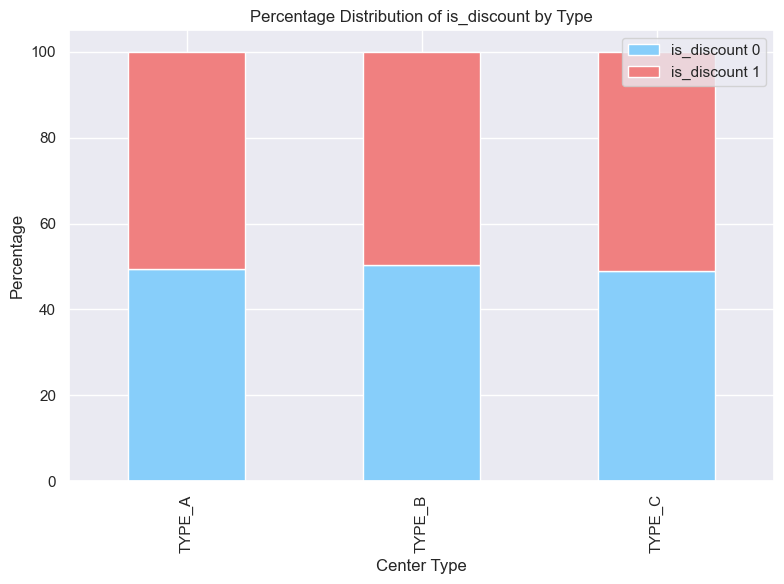

In [77]:
percentages = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

ax = percentages.plot(kind='bar', figsize=(8, 6), stacked=True, color=['lightskyblue', 'lightcoral'])

plt.title('Percentage Distribution of is_discount by Type')
plt.xlabel('Center Type')
plt.ylabel('Percentage')
plt.legend(['is_discount 0', 'is_discount 1'], loc='upper right')

plt.tight_layout()
plt.show()

##### Analyzing the percentages, they are similar, around 50% discount, 50% non-discount for all center types. Let's see what is the average discount per center type by first introducing a new column in the dataset that calculates the difference between base price and checkout price, then where this difference is positive, or when is_discount column is equal to one, the data is grouped and mean() function applied.

In [78]:
full_train_data['discount_value'] = full_train_data['base_price'] - full_train_data['checkout_price']


In [79]:
full_train_data

id  week  center_id  meal_id  checkout_price  base_price  \
0       1379560     1         55     1885          136.83      152.29   
1       1018704     2         55     1885          135.83      152.29   
2       1196273     3         55     1885          132.92      133.92   
3       1116527     4         55     1885          135.86      134.86   
4       1343872     5         55     1885          146.50      147.50   
...         ...   ...        ...      ...             ...         ...   
423722  1282954   131         61     2104          445.29      630.53   
423723  1094245   132         61     2104          435.53      630.53   
423724  1380866   133         61     2104          601.43      630.53   
423725  1111394   134         61     2104          600.43      631.53   
423726  1439333   135         61     2104          602.43      631.53   

        emailer_for_promotion  homepage_featured  num_orders  city_code  ...  \
0                           0                  0         177        647  ...   
1                           0                  0         323        647  ...   
2                           0                  0          96        647  ...   
3                           0                  0         163        647  ...   
4                           0                  0         215        647  ...   
...                       ...                ...         ...        ...  ...   
423722                      0                  1         270        473  ...   
423723                      0                  1         339        473  ...   
423724                      0                  1         107        473  ...   
423725                      0                  1          41        473  ...   
423726                      0                  1          28        473  ...   

        op_area_bin op_area_XS  op_area_S op_area_M op_area_L op_area_XL  \
0                XS          1          0         0         0          0   
1                XS          1          0         0         0          0   
2                XS          1          0         0         0          0   
3                XS          1          0         0         0          0   
4                XS          1          0         0         0          0   
...             ...        ...        ...       ...       ...        ...   
423722            M          0          0         1         0          0   
423723            M          0          0         1         0          0   
423724            M          0          0         1         0          0   
423725            M          0          0         1         0          0   
423726            M          0          0         1         0          0   

        op_area_XXL  category_cuisine  is_discount  discount_value  
0                 0    Beverages-Thai            1           15.46  
1                 0    Beverages-Thai            1           16.46  
2                 0    Beverages-Thai            1            1.00  
3                 0    Beverages-Thai            0           -1.00  
4                 0    Beverages-Thai            1            1.00  
...             ...               ...          ...             ...  
423722            0  Fish-Continental            1          185.24  
423723            0  Fish-Continental            1          195.00  
423724            0  Fish-Continental            1           29.10  
423725            0  Fish-Continental            1           31.10  
423726            0  Fish-Continental            1           29.10  

[423727 rows x 25 columns]

In [80]:
average_discount_by_type = full_train_data[full_train_data['is_discount'] == 1].groupby('center_type')[
    'discount_value'].mean()

In [81]:
average_discount_by_type

center_type
TYPE_A    44.821060
TYPE_B    43.558489
TYPE_C    46.093223
Name: discount_value, dtype: float64

##### Again, nothing very special, Type A did not give higher discounts than the other two center types, they are similar. 

### Let's analyze the emailer_for_promotion and homepage_featured, maybe we can find interesting insights related to them.

In [82]:
full_train_data['emailer_for_promotion'].value_counts()

0    388408
1     35319
Name: emailer_for_promotion, dtype: int64

In [83]:
full_train_data['homepage_featured'].value_counts()

0    376560
1     47167
Name: homepage_featured, dtype: int64

#### We observed earlier that ~50% of the total orders have discounts. Now, 8% were promoted via email and almost 11% on homepage.

In [84]:
promotion_email = full_train_data[(full_train_data['emailer_for_promotion'] == 1)].groupby(['center_type'])[
    'is_discount'].count()

In [85]:
promotion_email

center_type
TYPE_A    20170
TYPE_B     7034
TYPE_C     8115
Name: is_discount, dtype: int64

In [86]:
promotion_homepage = full_train_data[(full_train_data['homepage_featured'] == 1)].groupby(['center_type'])[
    'is_discount'].count()

In [87]:
promotion_homepage

center_type
TYPE_A    28727
TYPE_B     9841
TYPE_C     8599
Name: is_discount, dtype: int64

##### Looks like Type A is more promoted via email and homepage than the others. It's like 3x more promoted. Maybe it has to do with the fact that there are more centers? 

In [88]:
promotion_email = \
full_train_data[(full_train_data['is_discount']) == 1 & (full_train_data['emailer_for_promotion'] == 1)].groupby(
    ['center_type'])['discount_value'].count()

In [89]:
promotion_email

center_type
TYPE_A    139317
TYPE_B     50531
TYPE_C     52807
Name: discount_value, dtype: int64

####  Is there an effect of Email Promotions on  nr of orders? We have to calculate the average number of orders for items that were promoted through email ("emailer_for_promotion" = 1) compared to items that were not and to take conclusions about the volumes on days when emails were sent compared to when they are not.


In [90]:
average_orders_with_promotion = full_train_data[full_train_data['emailer_for_promotion'] == 1]['num_orders'].mean()
average_orders_without_promotion = full_train_data[full_train_data['emailer_for_promotion'] == 0]['num_orders'].mean()

print("Average Orders with Email Promotion:", average_orders_with_promotion)
print("Average Orders without Email Promotion:", average_orders_without_promotion)

Average Orders with Email Promotion: 643.5918627367706
Average Orders without Email Promotion: 230.0832732590472


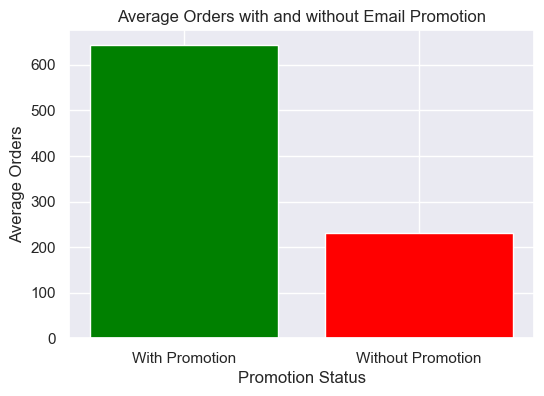

In [91]:
labels = ['With Promotion', 'Without Promotion']
average_orders = [average_orders_with_promotion, average_orders_without_promotion]
plt.figure(figsize=(6, 4))
plt.bar(labels, average_orders, color=['green', 'red'])
plt.title('Average Orders with and without Email Promotion')
plt.xlabel('Promotion Status')
plt.ylabel('Average Orders')
plt.show()

##### Interesting, we can clearly tell that the emails with promotions did a great job by generating a triple number of orders! 

#### But what is the effect of Homepage Featured on nr of orders? We have to calculate the average number of orders for items that were featured on the homepage ("homepage_featured" = 1) compared to items that were not and analyze whether featuring items on the homepage influences customers to order more.

In [92]:
# Calculate the average number of orders for homepage featured items and non-featured items
average_orders_featured = full_train_data[full_train_data['homepage_featured'] == 1]['num_orders'].mean()
average_orders_non_featured = full_train_data[full_train_data['homepage_featured'] == 0]['num_orders'].mean()

print("Average Orders with Homepage Featured Items:", average_orders_featured)
print("Average Orders without Homepage Featured Items:", average_orders_non_featured)

Average Orders with Homepage Featured Items: 605.5913244429368
Average Orders without Homepage Featured Items: 221.83258710431272


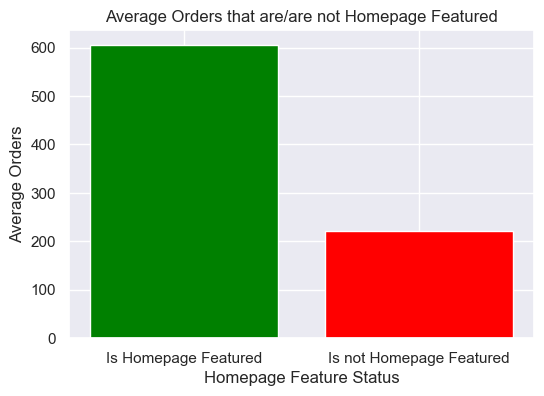

In [93]:
labels = ['Is Homepage Featured', 'Is not Homepage Featured']
average_orders = [average_orders_featured, average_orders_non_featured]
plt.figure(figsize=(6, 4))
plt.bar(labels, average_orders, color=['green', 'red'])
plt.title('Average Orders that are/are not Homepage Featured')
plt.xlabel('Homepage Feature Status')
plt.ylabel('Average Orders')
plt.show()

##### Hmm, again, almost 3x more orders with homepage featured, just like email promotions. 

### Let's create a more visual plot to see different combinations:
- email + homepage
- only email, not homepage
- not email, only homepage
- none

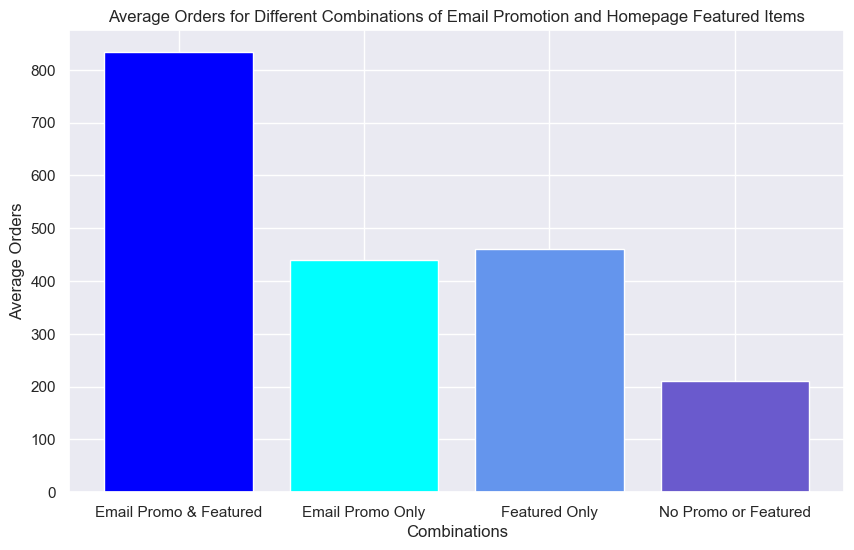

In [94]:
average_orders_with_email_promo_and_featured = \
    full_train_data[(full_train_data['emailer_for_promotion'] == 1) & (full_train_data['homepage_featured'] == 1)][
        'num_orders'].mean()
average_orders_with_email_promo_only = \
    full_train_data[(full_train_data['emailer_for_promotion'] == 1) & (full_train_data['homepage_featured'] == 0)][
        'num_orders'].mean()
average_orders_with_featured_only = \
    full_train_data[(full_train_data['emailer_for_promotion'] == 0) & (full_train_data['homepage_featured'] == 1)][
        'num_orders'].mean()
average_orders_without_promo_or_featured = \
    full_train_data[(full_train_data['emailer_for_promotion'] == 0) & (full_train_data['homepage_featured'] == 0)][
        'num_orders'].mean()

labels = ['Email Promo & Featured', 'Email Promo Only', 'Featured Only', 'No Promo or Featured']

average_orders = [average_orders_with_email_promo_and_featured, average_orders_with_email_promo_only,
                  average_orders_with_featured_only, average_orders_without_promo_or_featured]

plt.figure(figsize=(10, 6))
plt.bar(labels, average_orders, color=['blue', 'cyan', 'cornflowerblue', 'slateblue'])
plt.title('Average Orders for Different Combinations of Email Promotion and Homepage Featured Items')
plt.xlabel('Combinations')
plt.ylabel('Average Orders')
plt.show()

#### Emails and being Homepage Featured bring the most number of orders. Without being promoted, orders are not generated so much as having at least email or homepage featured. In the following scenarios, the discounts will be analyzed. 

### Are promoted items more likely to have discounts? How are the checkout prices spread here? Are the items with big discounts cheap? We will investigate whether email promotions or homepage featured items correlate with specific discount levels and checkout price ranges. 

In [95]:
# Create labels for different scenarios
scenario_labels = []

for email_promo in [0, 1]:
    for homepage_featured in [0, 1]:
        scenario_labels.append(f"Email Promo: {email_promo}, Featured: {homepage_featured}")

In [96]:
scenario_labels

['Email Promo: 0, Featured: 0',
 'Email Promo: 0, Featured: 1',
 'Email Promo: 1, Featured: 0',
 'Email Promo: 1, Featured: 1']

In [97]:
average_checkout_prices = []
average_discounts = []

for email_promo in [0, 1]:
    for homepage_featured in [0, 1]:
        average_checkout_price = full_train_data[(full_train_data['emailer_for_promotion'] == email_promo) & (
                full_train_data['homepage_featured'] == homepage_featured)]['checkout_price'].mean()
        average_discount = full_train_data[(full_train_data['emailer_for_promotion'] == email_promo) & (
                full_train_data['homepage_featured'] == homepage_featured)]['discount_value'].mean()
        average_checkout_prices.append(average_checkout_price)
        average_discounts.append(average_discount)

In [98]:
average_checkout_prices

[335.4335862155283, 282.92056973643196, 322.65198649045516, 339.7047037279982]

In [99]:
average_discounts

[11.681549251116024, 42.73263117791708, 101.72978560939794, 122.6543560730294]

#### Let's plot these!

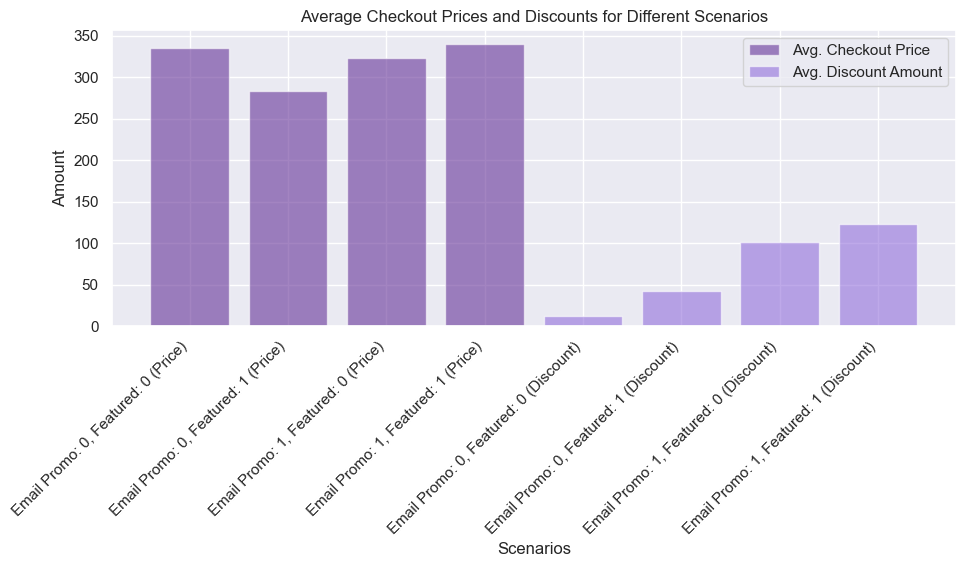

In [100]:
plt.figure(figsize=(10, 4))
plt.bar([label + " (Price)" for label in scenario_labels], average_checkout_prices, color='rebeccapurple', alpha=0.6,
        label='Avg. Checkout Price')
plt.bar([label + " (Discount)" for label in scenario_labels], average_discounts, color='mediumpurple', alpha=0.6,
        label='Avg. Discount Amount')

plt.title('Average Checkout Prices and Discounts for Different Scenarios')
plt.xlabel('Scenarios')
plt.ylabel('Amount')
plt.legend(loc='upper right')
plt.tight_layout()
plt.xticks(rotation=45, ha="right")
plt.show()

#### OBSERVATIONS:
- Products that have no promotion have a high average checkout price and a small discount amount,
- Products that are promoted via email have the lowest average checkout price and a higher discount,
- Products that are promoted via homepage have a bit higher price and also higher discounts,
- Products that are promoted both ways are having the highest checkout price and the highest discounts

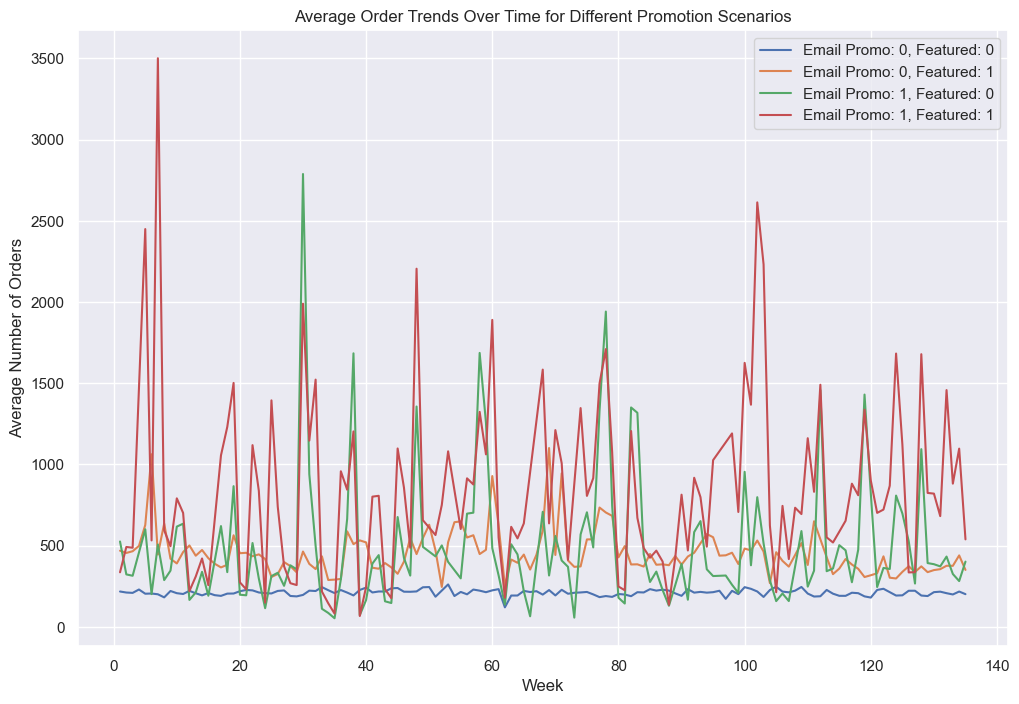

In [101]:
grouped_data = full_train_data.groupby(['week', 'emailer_for_promotion', 'homepage_featured'])[
    'num_orders'].mean().reset_index()

plt.figure(figsize=(12, 8))

for email_promo in [0, 1]:
    for homepage_featured in [0, 1]:
        scenario_data = grouped_data[(grouped_data['emailer_for_promotion'] == email_promo) & (
                grouped_data['homepage_featured'] == homepage_featured)]
        plt.plot(scenario_data['week'], scenario_data['num_orders'],
                 label=f'Email Promo: {email_promo}, Featured: {homepage_featured}')

plt.title('Average Order Trends Over Time for Different Promotion Scenarios')
plt.xlabel('Week')
plt.ylabel('Average Number of Orders')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [102]:
full_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423727 entries, 0 to 423726
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   id                     423727 non-null  int64   
 1   week                   423727 non-null  int64   
 2   center_id              423727 non-null  int64   
 3   meal_id                423727 non-null  int64   
 4   checkout_price         423727 non-null  float64 
 5   base_price             423727 non-null  float64 
 6   emailer_for_promotion  423727 non-null  int64   
 7   homepage_featured      423727 non-null  int64   
 8   num_orders             423727 non-null  int64   
 9   city_code              423727 non-null  int64   
 10  region_code            423727 non-null  int64   
 11  center_type            423727 non-null  object  
 12  op_area                423727 non-null  float64 
 13  category               423727 non-null  object  
 14  cuisine             

# Let's build a pipeline that does all the necessary transformations and prepare the dataset for training!

In [192]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin


class FoodDataMerger(BaseEstimator, TransformerMixin):
    center_info = None
    meal_info = None

    def __init__(self, center_info, meal_info):
        self.center_info = center_info
        self.meal_info = meal_info

    def fit(self, data):
        return self

    def transform(self, data):
        merged_data = data.merge(self.center_info, on="center_id", how="inner", sort=False)
        merged_data = merged_data.merge(self.meal_info, on="meal_id", how="inner", sort=False)
        merged_data = merged_data.sort_values(by=['week', 'id'], ascending=[True, True])
        return merged_data


class FeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        new_data = X.copy()

        new_data['op_area_bin'] = pd.cut(new_data['op_area'], [0, 2.4, 3.7, 4.5, 5.1, 6.7, np.inf],
                                         labels=['XS', 'S', 'M', 'L', 'XL', 'XXL'])

        new_data['checkout_price_bin'] = pd.cut(new_data['checkout_price'], [0, 100, 250, 350, 520, np.inf],
                                                labels=['Very Cheap', 'Cheap', 'Medium', 'Expensive', 'Luxury'])

        new_data['base_price_bin'] = pd.cut(new_data['base_price'], [0, 100, 250, 350, 520, np.inf],
                                            labels=['Very Cheap', 'Cheap', 'Medium', 'Expensive', 'Luxury'])

        new_data["category_cuisine"] = new_data['category'] + "-" + new_data['cuisine']

        new_data["region_city"] = new_data['region_code'].astype(str) + "-" + new_data['city_code'].astype(str)

        new_data['is_discount'] = (new_data['checkout_price'] <= new_data['base_price']).astype(int)

        new_data['discount_value'] = new_data.apply(
            lambda row: row['base_price'] - row['checkout_price'] if row['checkout_price'] <= row['base_price'] else 0,
            axis=1)

        return new_data


class DataFrameReconstructor(BaseEstimator, TransformerMixin):
    pipeline = None

    def __init__(self, pipeline):
        self.pipeline = pipeline

    def fit(self, data):
        return self

    def transform(self, data):
        return pd.DataFrame(data, columns=self.pipeline.get_feature_names_out())


class FeatureSelector(BaseEstimator, TransformerMixin):
    feature_list = None

    def __init__(self, feature_list):
        self.feature_list = feature_list

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.feature_list]


class PipelineBuilder:
    median_attribs = None
    most_freq_attribs = None
    standard_scaling_attribs = None
    normalization_attribs = None
    selected_features = None
    one_hot_attribs = None
    include_one_hot = True

    def __init__(self, median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                 selected_features, one_hot_attribs, include_one_hot=True):
        self.median_attribs = median_attribs
        self.most_freq_attribs = most_freq_attribs
        self.standard_scaling_attribs = standard_scaling_attribs
        self.normalization_attribs = normalization_attribs
        self.selected_features = selected_features
        self.one_hot_attribs = one_hot_attribs
        self.include_one_hot = include_one_hot

    def build(self):
        fill_missing_pipeline = ColumnTransformer(
            transformers=[
                ('num', SimpleImputer(strategy="median"), self.median_attribs),
                ('cat', SimpleImputer(strategy="most_frequent"), self.most_freq_attribs)
            ],
            remainder='passthrough',
            verbose_feature_names_out=False)

        scaling_pipeline = ColumnTransformer(
            transformers=[
                ('standard', StandardScaler(), self.standard_scaling_attribs),
                ('normalization', MinMaxScaler(), self.normalization_attribs)
            ],
            remainder='passthrough',
            verbose_feature_names_out=False)

        one_hot_pipeline = ColumnTransformer(
            transformers=[
                ('one-hot', OneHotEncoder(), self.one_hot_attribs)
            ],
            remainder='passthrough',
            verbose_feature_names_out=False)

        if self.include_one_hot:
            return Pipeline([
                ('merger', FoodDataMerger(center_info, meal_info)),
                ('missing_data_filler', fill_missing_pipeline),
                ('missing_reconstructor', DataFrameReconstructor(fill_missing_pipeline)),
                ('feature_adder', FeatureAdder()),
                ('scaler', scaling_pipeline),
                ('scaler_reconstructor', DataFrameReconstructor(scaling_pipeline)),
                ('feature_selector', FeatureSelector(self.selected_features)),
                ('one_hot_encoding', one_hot_pipeline)
            ])
        else:
            return Pipeline([
                ('merger', FoodDataMerger(center_info, meal_info)),
                ('missing_data_filler', fill_missing_pipeline),
                ('missing_reconstructor', DataFrameReconstructor(fill_missing_pipeline)),
                ('feature_adder', FeatureAdder()),
                ('scaler', scaling_pipeline),
                ('scaler_reconstructor', DataFrameReconstructor(scaling_pipeline)),
                ('feature_selector', FeatureSelector(self.selected_features))

            ])

In [194]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine',
                     'center_type', 'checkout_price_bin', 'base_price_bin', 'discount_value', 'is_discount',
                     'emailer_for_promotion', 'homepage_featured']
#one-hot column

one_hot_attribs = ['center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine',
                   'center_type', 'checkout_price_bin', 'base_price_bin']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

# Let's shortlist a few models to find the best performing ones

Normally, in order to validate the performance of a ML model, we would like to use cross-fold validation. In our situation, since the dataset is more similar to a time-series set, and we only ever intend to predict the future, cross-fold approach is not good. By doing cross folding we would validate the model by how well it predicts future values BUT ALSO past values. We are not interested in predicting past values.

The best approach here, would be another type of multiple validations where we use a rolling window to take training data and predict the next week/weeks.

In this demo, we decided to directly test against the test set which contains weeks 136-145, while the training set contains 1-135.

In [195]:
def calculate_and_print_rmse(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    print(f"Root Mean Squared Error (RMSE): {rmse}")


def visualize_predictions(labels, predictions):
    plt.figure(figsize=(17, 8))
    plt.rcParams['agg.path.chunksize'] = 20000
    plt.plot(labels.reset_index(drop=True), label="actual")
    plt.plot(predictions, color='red', label="predicted")
    plt.legend(loc='best')
    plt.show()

In [196]:
sorted_train_data = train_set.sort_values(by=['week', 'id'], ascending=[True, True])
final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

In [197]:
sorted_test_set = test_set.sort_values(by=['week', 'id'], ascending=[True, True])
final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

## Linear Regression

In [198]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(final_train_data, final_train_labels)
predictions = lin_reg.predict(final_test_data)
calculate_and_print_rmse(final_test_labels, predictions)

Root Mean Squared Error (RMSE): 201.663257329252


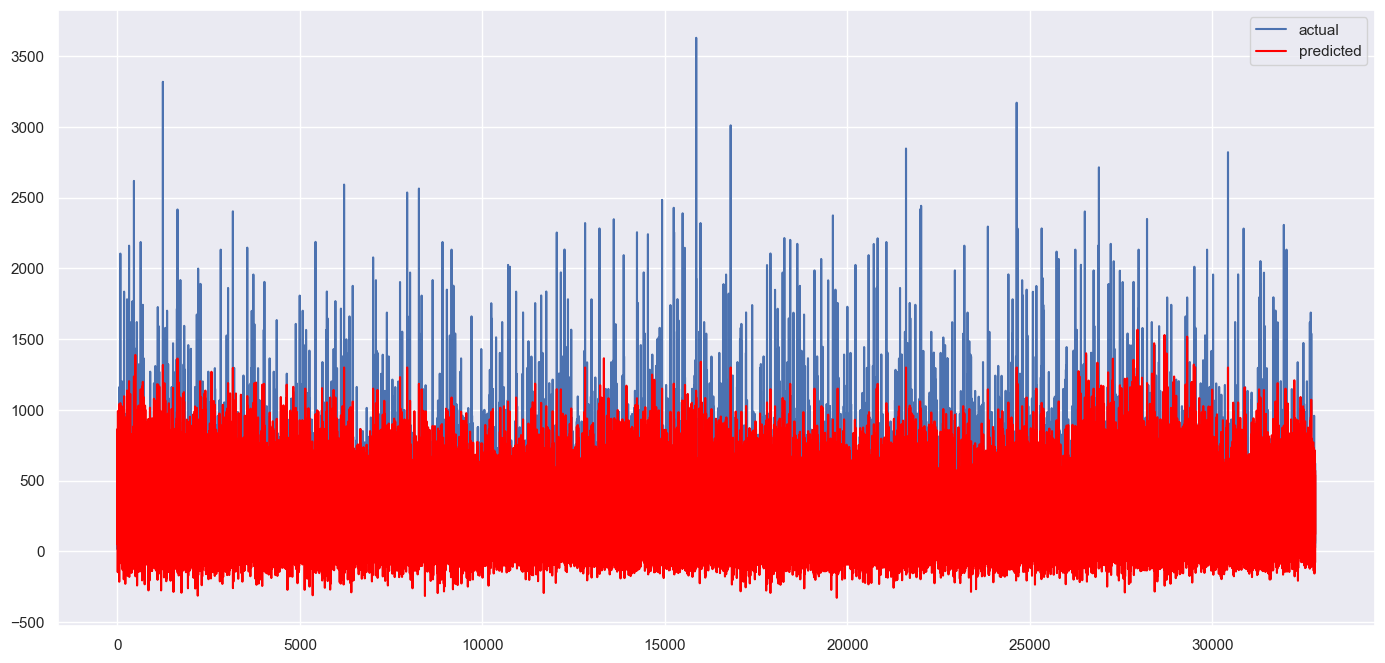

In [199]:
visualize_predictions(final_test_labels, predictions)

# XGB Regressor

In [200]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(final_train_data, final_train_labels)
predictions = xgb_reg.predict(final_test_data)
calculate_and_print_rmse(final_test_labels, predictions)

Root Mean Squared Error (RMSE): 136.45267252770202


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

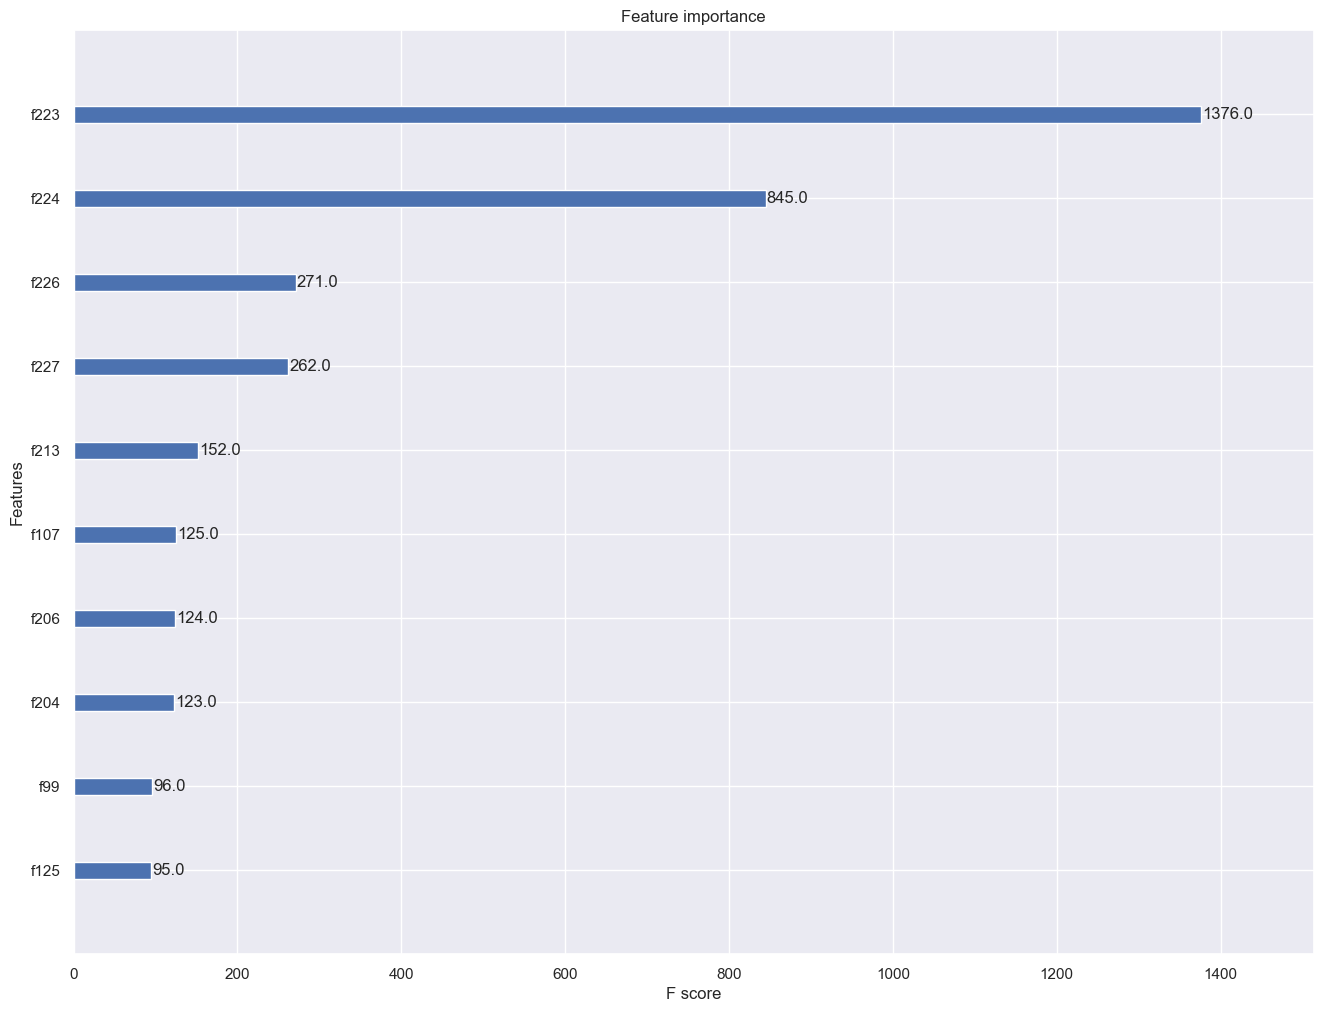

In [201]:
from xgboost import plot_importance

plot_importance(xgb_reg, max_num_features=10)

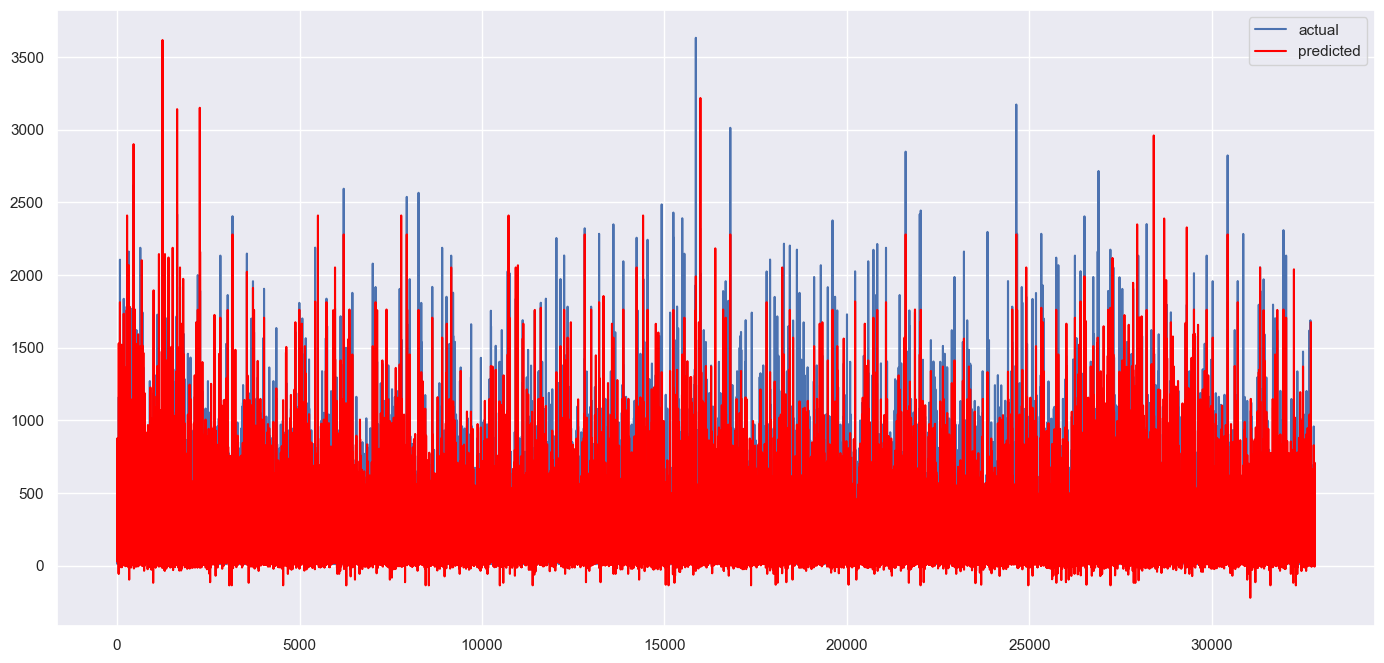

In [202]:
visualize_predictions(final_test_labels, predictions)

# LightGBM Model

In [203]:
import lightgbm as lgb

light_train_data = lgb.Dataset(final_train_data, label=final_train_labels)
light_test_data = lgb.Dataset(final_test_data, label=final_test_labels, reference=light_train_data)

params = {
    "objective": "regression",
    "metric": "rmse",
    "boosting_type": "gbdt",
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
}

num_round = 100
bst = lgb.train(params, light_train_data, num_round, valid_sets=[light_test_data])

predictions = bst.predict(final_test_data, num_iteration=bst.best_iteration)
calculate_and_print_rmse(final_test_labels, predictions)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028921 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 843
[LightGBM] [Info] Number of data points in the train set: 423727, number of used features: 228
[LightGBM] [Info] Start training from score 264.550536
[1]	valid_0's rmse: 272.757
[2]	valid_0's rmse: 267.133
[3]	valid_0's rmse: 261.446
[4]	valid_0's rmse: 256.207
[5]	valid_0's rmse: 250.204
[6]	valid_0's rmse: 244.402
[7]	valid_0's rmse: 239.666
[8]	valid_0's rmse: 236.282
[9]	valid_0's rmse: 233.468
[10]	valid_0's rmse: 229.529
[11]	valid_0's rmse: 225.727
[12]	valid_0's rmse: 222.168
[13]	valid_0's rmse: 218.974
[14]	valid_0's rmse: 216.157
[15]	valid_0's rmse: 213.883
[16]	valid_0's rmse: 210.955
[17]	valid_0's rmse: 208.46
[18]	valid_0's rmse: 205.902
[19]	valid_0's rmse: 203.881
[20]	valid_0's rmse: 201.552
[21]	valid_0's rmse: 199.682
[22]	valid_0's rmse: 197.664
[23]	valid_0's rmse: 195

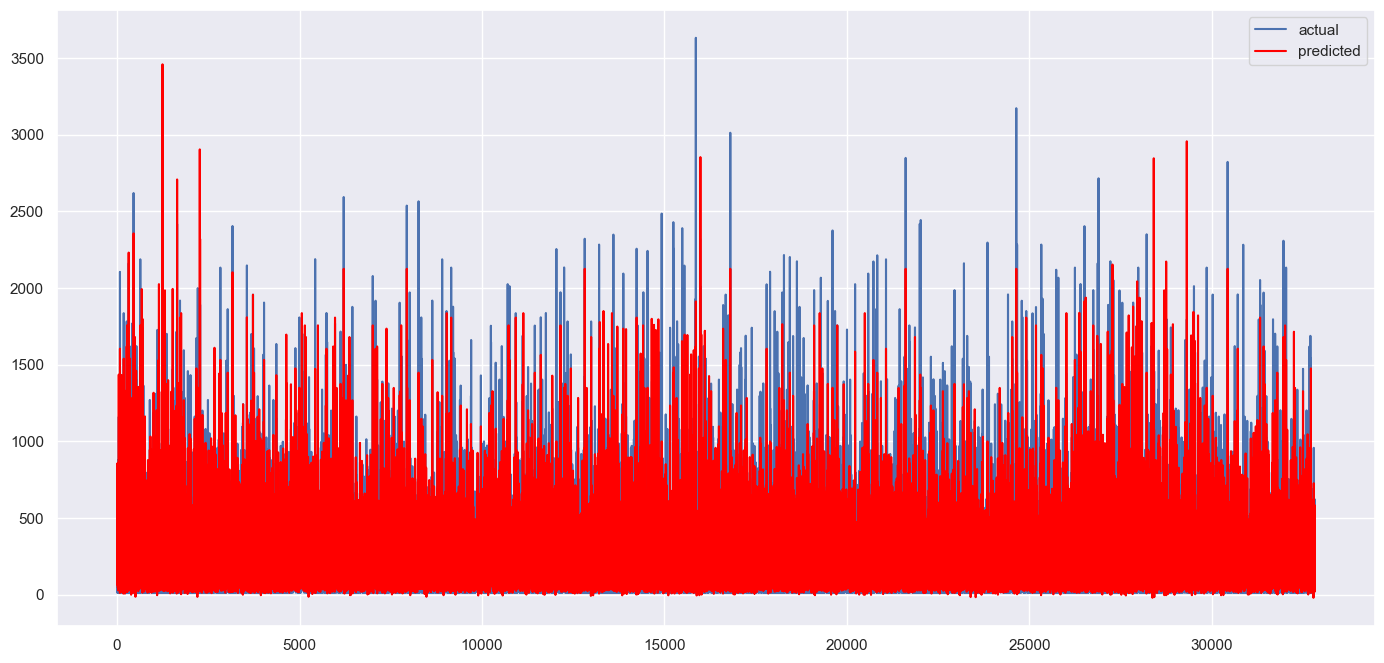

In [204]:
visualize_predictions(final_test_labels, predictions)

# Cat Boost

In [207]:
from catboost import CatBoostRegressor

cat_reg = CatBoostRegressor(random_seed=42)
cat_reg.fit(final_train_data, final_train_labels)
predictions = cat_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

Learning rate set to 0.106478
0:	learn: 386.7205753	total: 35.8ms	remaining: 35.7s
1:	learn: 372.5111259	total: 144ms	remaining: 1m 11s
2:	learn: 360.3666720	total: 184ms	remaining: 1m 1s
3:	learn: 350.0153826	total: 222ms	remaining: 55.4s
4:	learn: 340.6522524	total: 263ms	remaining: 52.4s
5:	learn: 332.0988150	total: 303ms	remaining: 50.2s
6:	learn: 324.8930750	total: 346ms	remaining: 49.1s
7:	learn: 317.1389749	total: 387ms	remaining: 48s
8:	learn: 311.0109653	total: 426ms	remaining: 46.9s
9:	learn: 306.1920058	total: 463ms	remaining: 45.8s
10:	learn: 300.6124603	total: 501ms	remaining: 45.1s
11:	learn: 295.9279021	total: 539ms	remaining: 44.4s
12:	learn: 291.6010811	total: 580ms	remaining: 44s
13:	learn: 287.8079332	total: 618ms	remaining: 43.5s
14:	learn: 284.8060900	total: 656ms	remaining: 43.1s
15:	learn: 281.0994000	total: 696ms	remaining: 42.8s
16:	learn: 278.4711551	total: 735ms	remaining: 42.5s
17:	learn: 275.9350827	total: 771ms	remaining: 42.1s
18:	learn: 273.0465798	total

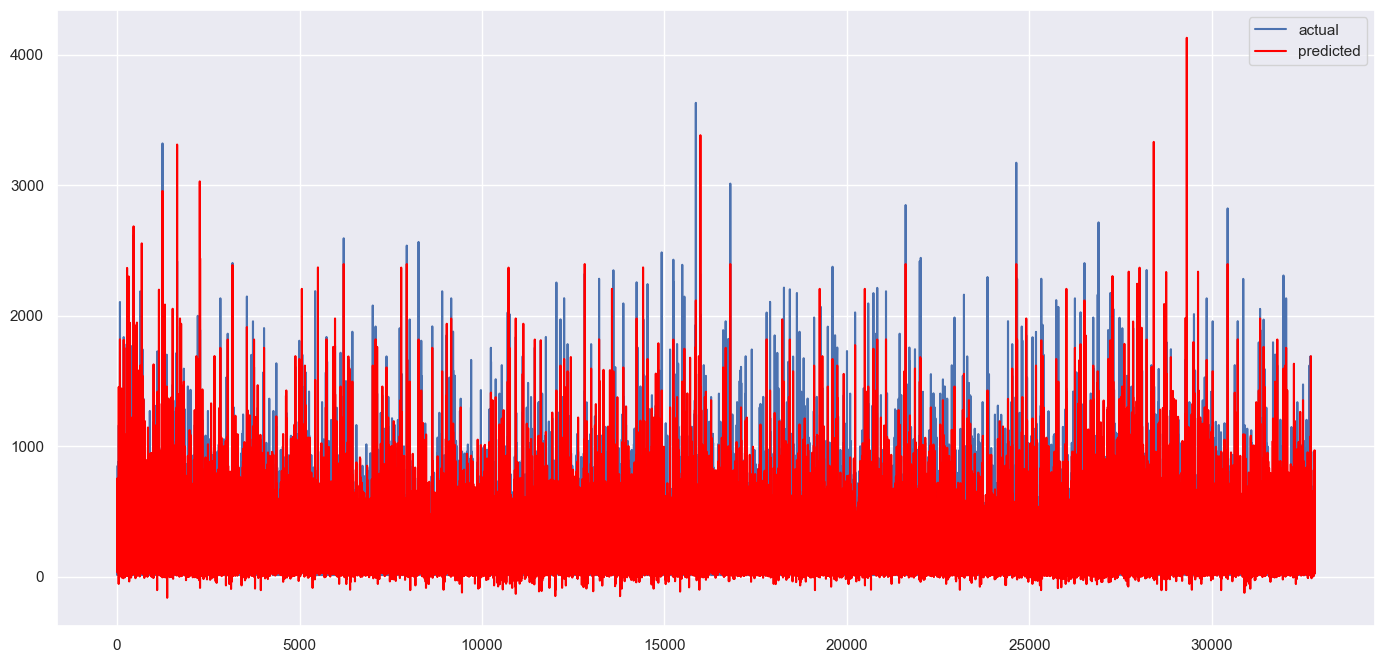

In [208]:
visualize_predictions(final_test_labels, predictions)

# Feature selection

Since we do not have cross fold validation, our only metric for deciding is the RMSE. If multiple validations are done using a rolling window approach, we could also check the SD or the CV%

## Keeping checkout and base prices instead of their bins

In [209]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine', 'center_type', 'checkout_price', 'base_price', 'discount_value', 'is_discount', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

cat_reg = CatBoostRegressor(random_seed=42)

cat_reg.fit(final_train_data, final_train_labels)
predictions = cat_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

Learning rate set to 0.106478
0:	learn: 385.0389008	total: 39.6ms	remaining: 39.6s
1:	learn: 370.0878086	total: 75.4ms	remaining: 37.6s
2:	learn: 357.5479419	total: 112ms	remaining: 37.1s
3:	learn: 346.0473975	total: 145ms	remaining: 36s
4:	learn: 336.1237389	total: 182ms	remaining: 36.2s
5:	learn: 327.4747340	total: 216ms	remaining: 35.7s
6:	learn: 319.0436181	total: 250ms	remaining: 35.5s
7:	learn: 311.3914757	total: 287ms	remaining: 35.6s
8:	learn: 305.5881826	total: 322ms	remaining: 35.4s
9:	learn: 300.6162712	total: 356ms	remaining: 35.2s
10:	learn: 295.7310559	total: 393ms	remaining: 35.3s
11:	learn: 291.4722553	total: 427ms	remaining: 35.2s
12:	learn: 286.4510797	total: 465ms	remaining: 35.3s
13:	learn: 282.1957702	total: 502ms	remaining: 35.4s
14:	learn: 278.7781482	total: 538ms	remaining: 35.3s
15:	learn: 275.1777897	total: 573ms	remaining: 35.2s
16:	learn: 272.1380167	total: 611ms	remaining: 35.3s
17:	learn: 269.5369973	total: 644ms	remaining: 35.1s
18:	learn: 266.6573083	tot

OBSERVATION: Using actual prices is better than using the price bins overall

## Checking if using op_area value instead of bins is better. Keeping only better versions as we go

In [210]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine','center_type', 'checkout_price', 'base_price', 'discount_value', 'is_discount', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

cat_reg = CatBoostRegressor(random_seed=42)

cat_reg.fit(final_train_data, final_train_labels)
predictions = cat_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

Learning rate set to 0.106478
0:	learn: 384.4857624	total: 32.1ms	remaining: 32s
1:	learn: 369.5704752	total: 64.2ms	remaining: 32s
2:	learn: 354.6995080	total: 95.6ms	remaining: 31.8s
3:	learn: 342.4509156	total: 131ms	remaining: 32.7s
4:	learn: 331.9627016	total: 165ms	remaining: 32.9s
5:	learn: 321.8174968	total: 203ms	remaining: 33.7s
6:	learn: 314.2325193	total: 238ms	remaining: 33.8s
7:	learn: 305.9870845	total: 277ms	remaining: 34.3s
8:	learn: 299.6527092	total: 313ms	remaining: 34.5s
9:	learn: 293.1510979	total: 352ms	remaining: 34.8s
10:	learn: 287.4011105	total: 388ms	remaining: 34.9s
11:	learn: 282.1756010	total: 427ms	remaining: 35.1s
12:	learn: 277.9002117	total: 462ms	remaining: 35.1s
13:	learn: 273.8748370	total: 495ms	remaining: 34.9s
14:	learn: 270.7294240	total: 534ms	remaining: 35.1s
15:	learn: 267.1389681	total: 579ms	remaining: 35.6s
16:	learn: 264.0699854	total: 614ms	remaining: 35.5s
17:	learn: 261.3884772	total: 649ms	remaining: 35.4s
18:	learn: 258.5452190	tota

OBS: Using actual value of op_area is worse. We will keep binning for op_area.

## Checking if using the category and cuisine separately instead of the combined category_cuisine

In [211]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'checkout_price', 'base_price', 'discount_value', 'is_discount', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category', 'cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

cat_reg = CatBoostRegressor(random_seed=42)

cat_reg.fit(final_train_data, final_train_labels)
predictions = cat_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

Learning rate set to 0.106478
0:	learn: 384.8533031	total: 36ms	remaining: 35.9s
1:	learn: 369.8968443	total: 71.4ms	remaining: 35.6s
2:	learn: 357.5897283	total: 105ms	remaining: 34.8s
3:	learn: 345.8477420	total: 142ms	remaining: 35.3s
4:	learn: 335.0468297	total: 180ms	remaining: 35.9s
5:	learn: 326.6993563	total: 220ms	remaining: 36.4s
6:	learn: 318.6637311	total: 259ms	remaining: 36.7s
7:	learn: 311.2498022	total: 297ms	remaining: 36.8s
8:	learn: 305.3129559	total: 334ms	remaining: 36.8s
9:	learn: 299.5192489	total: 370ms	remaining: 36.6s
10:	learn: 294.5184221	total: 409ms	remaining: 36.8s
11:	learn: 289.7635015	total: 446ms	remaining: 36.7s
12:	learn: 285.8534282	total: 483ms	remaining: 36.6s
13:	learn: 282.4482446	total: 518ms	remaining: 36.5s
14:	learn: 278.4159401	total: 556ms	remaining: 36.5s
15:	learn: 275.5421802	total: 592ms	remaining: 36.4s
16:	learn: 272.8315817	total: 628ms	remaining: 36.3s
17:	learn: 269.8773151	total: 662ms	remaining: 36.1s
18:	learn: 267.4469589	tot

OBS: category_cuisine seems to offer better performance than have it separately. We'll keep them together.

## Checking if discount features added are actually helping or not

In [212]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine', 'center_type', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

cat_reg = CatBoostRegressor(random_seed=42)

cat_reg.fit(final_train_data, final_train_labels)
predictions = cat_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

Learning rate set to 0.106478
0:	learn: 384.8855727	total: 32.5ms	remaining: 32.4s
1:	learn: 370.7803963	total: 63.9ms	remaining: 31.9s
2:	learn: 357.4688216	total: 94.4ms	remaining: 31.4s
3:	learn: 346.4553150	total: 128ms	remaining: 31.8s
4:	learn: 336.1401965	total: 162ms	remaining: 32.3s
5:	learn: 328.2524265	total: 198ms	remaining: 32.8s
6:	learn: 320.5413574	total: 239ms	remaining: 33.9s
7:	learn: 313.0825737	total: 279ms	remaining: 34.6s
8:	learn: 307.2176990	total: 316ms	remaining: 34.8s
9:	learn: 301.6439708	total: 352ms	remaining: 34.8s
10:	learn: 297.2015778	total: 389ms	remaining: 35s
11:	learn: 291.8163328	total: 427ms	remaining: 35.2s
12:	learn: 288.0207445	total: 463ms	remaining: 35.1s
13:	learn: 284.2250315	total: 500ms	remaining: 35.2s
14:	learn: 280.0966389	total: 540ms	remaining: 35.4s
15:	learn: 276.4293595	total: 574ms	remaining: 35.3s
16:	learn: 273.3742059	total: 612ms	remaining: 35.4s
17:	learn: 270.4479146	total: 647ms	remaining: 35.3s
18:	learn: 267.9174485	to

OBS: Engineered features discount_value and is_discount don't seem to help. Let's check them individually.

## Do both discount features help, or is only one better?
Testing with only discount_value

In [213]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine', 'center_type', 'checkout_price', 'base_price', 'discount_value', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

cat_reg = CatBoostRegressor(random_seed=42)

cat_reg.fit(final_train_data, final_train_labels)
predictions = cat_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

Learning rate set to 0.106478
0:	learn: 384.8855727	total: 32.7ms	remaining: 32.7s
1:	learn: 369.9370976	total: 69ms	remaining: 34.4s
2:	learn: 357.6761501	total: 101ms	remaining: 33.7s
3:	learn: 346.4578372	total: 133ms	remaining: 33.1s
4:	learn: 336.1241433	total: 168ms	remaining: 33.4s
5:	learn: 327.6620637	total: 202ms	remaining: 33.4s
6:	learn: 319.0272390	total: 239ms	remaining: 33.9s
7:	learn: 311.9001520	total: 278ms	remaining: 34.4s
8:	learn: 305.1681276	total: 313ms	remaining: 34.5s
9:	learn: 299.9368128	total: 349ms	remaining: 34.5s
10:	learn: 294.7735836	total: 385ms	remaining: 34.6s
11:	learn: 289.6789371	total: 422ms	remaining: 34.8s
12:	learn: 285.6948149	total: 457ms	remaining: 34.7s
13:	learn: 281.7076948	total: 493ms	remaining: 34.7s
14:	learn: 278.4109267	total: 529ms	remaining: 34.7s
15:	learn: 274.7408136	total: 566ms	remaining: 34.8s
16:	learn: 271.7207758	total: 603ms	remaining: 34.9s
17:	learn: 268.9483022	total: 640ms	remaining: 34.9s
18:	learn: 266.1874405	tot

Testing with only is_discount

In [214]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine', 'center_type', 'checkout_price', 'base_price', 'is_discount', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

cat_reg = CatBoostRegressor(random_seed=42)

cat_reg.fit(final_train_data, final_train_labels)
predictions = cat_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

Learning rate set to 0.106478
0:	learn: 385.4448300	total: 36.3ms	remaining: 36.2s
1:	learn: 370.7131470	total: 76.6ms	remaining: 38.2s
2:	learn: 358.1402464	total: 113ms	remaining: 37.6s
3:	learn: 346.4734383	total: 150ms	remaining: 37.4s
4:	learn: 337.0795489	total: 188ms	remaining: 37.4s
5:	learn: 327.6147986	total: 222ms	remaining: 36.8s
6:	learn: 319.8114745	total: 258ms	remaining: 36.7s
7:	learn: 312.8076878	total: 297ms	remaining: 36.8s
8:	learn: 305.9650157	total: 333ms	remaining: 36.7s
9:	learn: 300.0920730	total: 370ms	remaining: 36.6s
10:	learn: 295.2898198	total: 404ms	remaining: 36.3s
11:	learn: 290.5283080	total: 440ms	remaining: 36.2s
12:	learn: 286.0449696	total: 478ms	remaining: 36.3s
13:	learn: 282.7270613	total: 516ms	remaining: 36.3s
14:	learn: 278.7927574	total: 554ms	remaining: 36.4s
15:	learn: 275.0240589	total: 593ms	remaining: 36.5s
16:	learn: 272.3249943	total: 627ms	remaining: 36.2s
17:	learn: 268.9637584	total: 661ms	remaining: 36.1s
18:	learn: 266.3424816	t

OBS: It appears that is_discount is the actual feature that helps. discount_value, by itself, adds noise to the dataset. It's interesting to see, that both of them together give the best RMSE, but it is almost identical to only having is_discount .
We decided to proceed by only keeping is_discount as we're not sure how much noise discount_value can add when testing model generalization.

## Checking if meal_id helps or not

In [215]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine', 'center_type', 'checkout_price', 'base_price', 'is_discount', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

cat_reg = CatBoostRegressor(random_seed=42)

cat_reg.fit(final_train_data, final_train_labels)
predictions = cat_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

Learning rate set to 0.106478
0:	learn: 385.4448300	total: 46.3ms	remaining: 46.3s
1:	learn: 369.8850047	total: 115ms	remaining: 57.6s
2:	learn: 356.2384128	total: 154ms	remaining: 51.3s
3:	learn: 344.8779177	total: 191ms	remaining: 47.5s
4:	learn: 335.0548514	total: 230ms	remaining: 45.8s
5:	learn: 327.0865260	total: 268ms	remaining: 44.4s
6:	learn: 319.5618174	total: 306ms	remaining: 43.4s
7:	learn: 313.2192591	total: 345ms	remaining: 42.8s
8:	learn: 307.5691765	total: 382ms	remaining: 42s
9:	learn: 302.7480328	total: 418ms	remaining: 41.4s
10:	learn: 297.7404122	total: 458ms	remaining: 41.1s
11:	learn: 293.6935532	total: 496ms	remaining: 40.8s
12:	learn: 289.6109604	total: 539ms	remaining: 40.9s
13:	learn: 285.8325954	total: 579ms	remaining: 40.8s
14:	learn: 282.6879223	total: 616ms	remaining: 40.4s
15:	learn: 279.6396526	total: 653ms	remaining: 40.2s
16:	learn: 276.6911949	total: 692ms	remaining: 40s
17:	learn: 274.1254814	total: 729ms	remaining: 39.7s
18:	learn: 271.8015663	total:

OBS: Removing the meal_id is much worse due to high RMSE.

## Keeping meal id, but not doing 1-hot

In [216]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine', 'center_type', 'checkout_price', 'base_price', 'is_discount', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

cat_reg = CatBoostRegressor(random_seed=42)

cat_reg.fit(final_train_data, final_train_labels)
predictions = cat_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

Learning rate set to 0.106478
0:	learn: 385.4448300	total: 31.8ms	remaining: 31.7s
1:	learn: 369.6122624	total: 66.3ms	remaining: 33.1s
2:	learn: 355.9355810	total: 101ms	remaining: 33.5s
3:	learn: 344.6428951	total: 135ms	remaining: 33.6s
4:	learn: 335.0454459	total: 167ms	remaining: 33.3s
5:	learn: 326.7426458	total: 205ms	remaining: 34s
6:	learn: 319.2957832	total: 242ms	remaining: 34.3s
7:	learn: 312.6632122	total: 277ms	remaining: 34.3s
8:	learn: 307.4686168	total: 312ms	remaining: 34.4s
9:	learn: 301.6905061	total: 350ms	remaining: 34.7s
10:	learn: 297.2588283	total: 386ms	remaining: 34.7s
11:	learn: 292.8737504	total: 425ms	remaining: 35s
12:	learn: 288.3890362	total: 461ms	remaining: 35s
13:	learn: 284.6533708	total: 497ms	remaining: 35s
14:	learn: 280.8188180	total: 536ms	remaining: 35.2s
15:	learn: 277.8620885	total: 572ms	remaining: 35.2s
16:	learn: 274.6037387	total: 610ms	remaining: 35.3s
17:	learn: 271.6056912	total: 646ms	remaining: 35.3s
18:	learn: 268.7551709	total: 68

OBS: Removing the 1-hot enc from meal-id made it worse. We will keep meal id and the 1 hot enc on it.

## Is center id relevant?

In [217]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine', 'center_type', 'checkout_price', 'base_price', 'is_discount', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

cat_reg = CatBoostRegressor(random_seed=42)

cat_reg.fit(final_train_data, final_train_labels)
predictions = cat_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

Learning rate set to 0.106478
0:	learn: 385.0389008	total: 33.7ms	remaining: 33.6s
1:	learn: 370.0878086	total: 66.9ms	remaining: 33.4s
2:	learn: 357.8903078	total: 101ms	remaining: 33.7s
3:	learn: 346.6256296	total: 136ms	remaining: 33.7s
4:	learn: 335.9130959	total: 172ms	remaining: 34.2s
5:	learn: 327.4608610	total: 211ms	remaining: 34.9s
6:	learn: 319.1366579	total: 252ms	remaining: 35.8s
7:	learn: 312.5467891	total: 289ms	remaining: 35.9s
8:	learn: 305.8529333	total: 325ms	remaining: 35.8s
9:	learn: 300.1143307	total: 360ms	remaining: 35.6s
10:	learn: 295.3455950	total: 395ms	remaining: 35.5s
11:	learn: 290.8948993	total: 427ms	remaining: 35.2s
12:	learn: 287.3695833	total: 461ms	remaining: 35s
13:	learn: 283.5639474	total: 495ms	remaining: 34.8s
14:	learn: 280.1085797	total: 531ms	remaining: 34.9s
15:	learn: 276.7986362	total: 566ms	remaining: 34.8s
16:	learn: 273.6731544	total: 598ms	remaining: 34.6s
17:	learn: 271.2830190	total: 630ms	remaining: 34.4s
18:	learn: 268.4759117	tot

OBS: Worse without the center ID

## Is performance better without 1-hot enc on center ID?

In [218]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine','center_type', 'checkout_price', 'base_price', 'discount_value', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['meal_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg.fit(final_train_data, final_train_labels)
predictions = xgb_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

Learning rate set to 0.106478
0:	learn: 385.1514431	total: 37.3ms	remaining: 37.3s
1:	learn: 370.0957691	total: 75ms	remaining: 37.4s
2:	learn: 357.9466541	total: 113ms	remaining: 37.7s
3:	learn: 346.7927390	total: 153ms	remaining: 38s
4:	learn: 336.8324073	total: 188ms	remaining: 37.3s
5:	learn: 327.3631717	total: 223ms	remaining: 36.9s
6:	learn: 319.6690731	total: 258ms	remaining: 36.6s
7:	learn: 313.0707768	total: 293ms	remaining: 36.4s
8:	learn: 306.1843878	total: 332ms	remaining: 36.5s
9:	learn: 301.0473912	total: 370ms	remaining: 36.6s
10:	learn: 295.5986078	total: 405ms	remaining: 36.4s
11:	learn: 291.0854133	total: 439ms	remaining: 36.1s
12:	learn: 286.5216297	total: 473ms	remaining: 35.9s
13:	learn: 283.3966483	total: 512ms	remaining: 36.1s
14:	learn: 279.7617035	total: 554ms	remaining: 36.4s
15:	learn: 276.3377359	total: 591ms	remaining: 36.3s
16:	learn: 273.4800653	total: 628ms	remaining: 36.3s
17:	learn: 270.5119827	total: 662ms	remaining: 36.1s
18:	learn: 268.0780063	total

OBS: Removing 1-hot enc from center ID lowered the RMSE. 1-hot enc the center ID is logically correct. We will be keeping it.
It is more correct to assume that the meal id and center id are categorical attributes where the actual number on the IDs is not relevant. It is only a unique identifier.

## Is city code relevant?

In [219]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'region_code', 'category_cuisine','center_type', 'checkout_price', 'base_price', 'discount_value', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg.fit(final_train_data, final_train_labels)
predictions = xgb_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

Learning rate set to 0.106478
0:	learn: 385.4448300	total: 38.1ms	remaining: 38.1s
1:	learn: 371.1232525	total: 72ms	remaining: 35.9s
2:	learn: 358.5260651	total: 107ms	remaining: 35.5s
3:	learn: 347.0248456	total: 142ms	remaining: 35.4s
4:	learn: 337.3313186	total: 177ms	remaining: 35.2s
5:	learn: 328.5154310	total: 212ms	remaining: 35.1s
6:	learn: 319.8342524	total: 248ms	remaining: 35.2s
7:	learn: 312.8890787	total: 284ms	remaining: 35.2s
8:	learn: 306.3191772	total: 321ms	remaining: 35.3s
9:	learn: 300.3523671	total: 358ms	remaining: 35.5s
10:	learn: 295.7462228	total: 394ms	remaining: 35.4s
11:	learn: 290.7104699	total: 429ms	remaining: 35.3s
12:	learn: 286.9088428	total: 464ms	remaining: 35.2s
13:	learn: 282.9494450	total: 499ms	remaining: 35.1s
14:	learn: 279.4239398	total: 534ms	remaining: 35.1s
15:	learn: 275.8074626	total: 570ms	remaining: 35s
16:	learn: 272.5697920	total: 606ms	remaining: 35.1s
17:	learn: 269.9958928	total: 637ms	remaining: 34.8s
18:	learn: 267.1871080	total

OBS: removing the city code makes it worse.

## Is removing the 1 hot enc from city code better?

In [220]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine','center_type', 'checkout_price', 'base_price', 'discount_value', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg.fit(final_train_data, final_train_labels)
predictions = xgb_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

Learning rate set to 0.106478
0:	learn: 385.4448300	total: 48.6ms	remaining: 48.6s
1:	learn: 370.6630910	total: 104ms	remaining: 51.7s
2:	learn: 358.2980820	total: 205ms	remaining: 1m 8s
3:	learn: 347.0015531	total: 260ms	remaining: 1m 4s
4:	learn: 336.5272363	total: 316ms	remaining: 1m 2s
5:	learn: 327.8630521	total: 366ms	remaining: 1m
6:	learn: 319.9134740	total: 419ms	remaining: 59.4s
7:	learn: 312.4147526	total: 469ms	remaining: 58.2s
8:	learn: 306.3915065	total: 522ms	remaining: 57.5s
9:	learn: 301.2916082	total: 574ms	remaining: 56.9s
10:	learn: 295.6558666	total: 629ms	remaining: 56.5s
11:	learn: 291.4461580	total: 685ms	remaining: 56.4s
12:	learn: 286.7191892	total: 755ms	remaining: 57.3s
13:	learn: 283.3411718	total: 858ms	remaining: 1m
14:	learn: 279.8437301	total: 917ms	remaining: 1m
15:	learn: 276.1330156	total: 978ms	remaining: 1m
16:	learn: 273.1597727	total: 1.04s	remaining: 1m
17:	learn: 270.2208449	total: 1.09s	remaining: 59.8s
18:	learn: 267.7197993	total: 1.15s	rema

OBS: removing 1 hot enc makes it better. We will keep 1-hot encoding for now

## Is region code relevant?

In [221]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area_bin', 'city_code', 'category_cuisine', 'center_type', 'checkout_price', 'base_price', 'is_discount', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'op_area_bin', 'city_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

cat_reg = CatBoostRegressor(random_seed=42)

cat_reg.fit(final_train_data, final_train_labels)
predictions = cat_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

Learning rate set to 0.106478
0:	learn: 385.4033641	total: 36ms	remaining: 36s
1:	learn: 370.5716992	total: 75ms	remaining: 37.4s
2:	learn: 358.3620313	total: 110ms	remaining: 36.7s
3:	learn: 347.1087930	total: 146ms	remaining: 36.4s
4:	learn: 336.8995498	total: 183ms	remaining: 36.4s
5:	learn: 328.5344573	total: 219ms	remaining: 36.2s
6:	learn: 320.7358464	total: 254ms	remaining: 36s
7:	learn: 313.5669445	total: 289ms	remaining: 35.9s
8:	learn: 307.4996167	total: 327ms	remaining: 36s
9:	learn: 302.5771726	total: 362ms	remaining: 35.8s
10:	learn: 297.8728738	total: 397ms	remaining: 35.7s
11:	learn: 293.9293260	total: 431ms	remaining: 35.5s
12:	learn: 289.7442285	total: 465ms	remaining: 35.3s
13:	learn: 286.5189841	total: 500ms	remaining: 35.2s
14:	learn: 283.0420676	total: 535ms	remaining: 35.1s
15:	learn: 279.8022632	total: 568ms	remaining: 34.9s
16:	learn: 276.2414430	total: 604ms	remaining: 34.9s
17:	learn: 273.0397522	total: 638ms	remaining: 34.8s
18:	learn: 270.5047668	total: 674m

OBS: Removing it is worse

## Is removing the 1 hot enc from region code better?

In [222]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine', 'center_type', 'checkout_price', 'base_price', 'is_discount', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'op_area_bin', 'city_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

cat_reg = CatBoostRegressor(random_seed=42)

cat_reg.fit(final_train_data, final_train_labels)
predictions = cat_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

Learning rate set to 0.106478
0:	learn: 385.4408687	total: 34.3ms	remaining: 34.3s
1:	learn: 370.4903657	total: 70.2ms	remaining: 35s
2:	learn: 357.8924991	total: 107ms	remaining: 35.4s
3:	learn: 346.6013379	total: 145ms	remaining: 36s
4:	learn: 337.1935713	total: 186ms	remaining: 37s
5:	learn: 328.5118815	total: 225ms	remaining: 37.2s
6:	learn: 320.8879369	total: 264ms	remaining: 37.5s
7:	learn: 313.2403823	total: 304ms	remaining: 37.7s
8:	learn: 307.7849259	total: 345ms	remaining: 38s
9:	learn: 301.5915564	total: 384ms	remaining: 38.1s
10:	learn: 296.5871851	total: 424ms	remaining: 38.1s
11:	learn: 292.3927226	total: 462ms	remaining: 38s
12:	learn: 288.2100387	total: 501ms	remaining: 38.1s
13:	learn: 284.5968611	total: 543ms	remaining: 38.3s
14:	learn: 280.6350417	total: 585ms	remaining: 38.4s
15:	learn: 277.3819521	total: 622ms	remaining: 38.2s
16:	learn: 274.2306524	total: 660ms	remaining: 38.2s
17:	learn: 271.5458073	total: 698ms	remaining: 38.1s
18:	learn: 268.8063904	total: 734m

OBS: removing 1 hot encoding from region code made it better. We will keep 1 hot encoding for now

## Testing without any 1 hot encoding and letting CatBoost handle encoding.

In [226]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine', 'center_type', 'checkout_price', 'base_price', 'is_discount', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = []

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs, include_one_hot=False).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_train_data['week'] = final_train_data['week'].astype('int')
final_train_data['center_id'] = final_train_data['center_id'].astype('category')
final_train_data['meal_id'] = final_train_data['meal_id'].astype('category')
final_train_data['op_area_bin'] = final_train_data['op_area_bin'].astype('category')
final_train_data['city_code'] = final_train_data['city_code'].astype('category')
final_train_data['region_code'] = final_train_data['region_code'].astype('category')
final_train_data['category_cuisine'] = final_train_data['category_cuisine'].astype('category')
final_train_data['center_type'] = final_train_data['center_type'].astype('category')
final_train_data['checkout_price'] = final_train_data['checkout_price'].astype('float')
final_train_data['base_price'] = final_train_data['base_price'].astype('float')
final_train_data['is_discount'] = final_train_data['is_discount'].astype('int')
final_train_data['emailer_for_promotion'] = final_train_data['emailer_for_promotion'].astype('int')
final_train_data['homepage_featured'] = final_train_data['homepage_featured'].astype('int')

final_train_data.info()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

final_test_data['week'] = final_test_data['week'].astype('int')
final_test_data['center_id'] = final_test_data['center_id'].astype('category')
final_test_data['meal_id'] = final_test_data['meal_id'].astype('category')
final_test_data['op_area_bin'] = final_test_data['op_area_bin'].astype('category')
final_test_data['city_code'] = final_test_data['city_code'].astype('category')
final_test_data['region_code'] = final_test_data['region_code'].astype('category')
final_test_data['category_cuisine'] = final_test_data['category_cuisine'].astype('category')
final_test_data['center_type'] = final_test_data['center_type'].astype('category')
final_test_data['checkout_price'] = final_test_data['checkout_price'].astype('float')
final_test_data['base_price'] = final_test_data['base_price'].astype('float')
final_test_data['is_discount'] = final_test_data['is_discount'].astype('int')
final_test_data['emailer_for_promotion'] = final_test_data['emailer_for_promotion'].astype('int')
final_test_data['homepage_featured'] = final_test_data['homepage_featured'].astype('int')

final_test_data.info()


cat_features = ['center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine', 'center_type']

cat_reg = CatBoostRegressor(cat_features=cat_features, random_seed=42)

cat_reg.fit(final_train_data, final_train_labels)
predictions = cat_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423727 entries, 0 to 423726
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   week                   423727 non-null  int32   
 1   center_id              423727 non-null  category
 2   meal_id                423727 non-null  category
 3   op_area_bin            423727 non-null  category
 4   city_code              423727 non-null  category
 5   region_code            423727 non-null  category
 6   category_cuisine       423727 non-null  category
 7   center_type            423727 non-null  category
 8   checkout_price         423727 non-null  float64 
 9   base_price             423727 non-null  float64 
 10  is_discount            423727 non-null  int32   
 11  emailer_for_promotion  423727 non-null  int32   
 12  homepage_featured      423727 non-null  int32   
dtypes: category(7), float64(2), int32(4)
memory usage: 15.8 MB
<class 'pandas.

Score is not great. We will keep all 1 hot encoding, even though some values are better.

## Will scaling week instead of normalizing it be better?

In [227]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value', 'week']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine', 'center_type', 'checkout_price', 'base_price', 'is_discount', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

cat_reg = CatBoostRegressor(random_seed=42)

cat_reg.fit(final_train_data, final_train_labels)
predictions = cat_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

Learning rate set to 0.106478
0:	learn: 385.4448300	total: 33.7ms	remaining: 33.7s
1:	learn: 370.7131470	total: 70.2ms	remaining: 35s
2:	learn: 358.1402464	total: 107ms	remaining: 35.5s
3:	learn: 346.4734383	total: 145ms	remaining: 36.2s
4:	learn: 337.0795489	total: 183ms	remaining: 36.5s
5:	learn: 327.6147986	total: 219ms	remaining: 36.3s
6:	learn: 319.8114745	total: 260ms	remaining: 36.8s
7:	learn: 312.8076878	total: 302ms	remaining: 37.4s
8:	learn: 305.9650157	total: 341ms	remaining: 37.5s
9:	learn: 300.0920730	total: 380ms	remaining: 37.6s
10:	learn: 295.2898198	total: 416ms	remaining: 37.4s
11:	learn: 290.5283080	total: 455ms	remaining: 37.5s
12:	learn: 286.0449696	total: 497ms	remaining: 37.7s
13:	learn: 282.7270613	total: 535ms	remaining: 37.7s
14:	learn: 278.7927574	total: 584ms	remaining: 38.3s
15:	learn: 275.0240589	total: 622ms	remaining: 38.2s
16:	learn: 272.3249943	total: 657ms	remaining: 38s
17:	learn: 268.9637584	total: 693ms	remaining: 37.8s
18:	learn: 266.3424816	total

OBS: OK, would not help. So week should stay as numerical values, not normalized, not standardized.

## Is normalizing the price features better than scaling them?

In [229]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['op_area']
normalization_attribs = ['checkout_price', 'base_price', 'discount_value']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine', 'center_type', 'checkout_price', 'base_price', 'is_discount', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

cat_reg = CatBoostRegressor(random_seed=42)

cat_reg.fit(final_train_data, final_train_labels)
predictions = cat_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

Learning rate set to 0.106478
0:	learn: 385.4448300	total: 35.5ms	remaining: 35.5s
1:	learn: 370.7131470	total: 72.6ms	remaining: 36.2s
2:	learn: 358.1402464	total: 108ms	remaining: 35.8s
3:	learn: 346.4734383	total: 157ms	remaining: 39.1s
4:	learn: 337.0795489	total: 206ms	remaining: 41s
5:	learn: 327.6147986	total: 251ms	remaining: 41.6s
6:	learn: 319.8114745	total: 300ms	remaining: 42.6s
7:	learn: 312.8076878	total: 355ms	remaining: 44s
8:	learn: 305.9650157	total: 405ms	remaining: 44.6s
9:	learn: 300.0920730	total: 494ms	remaining: 48.9s
10:	learn: 295.2898198	total: 549ms	remaining: 49.3s
11:	learn: 290.5283080	total: 613ms	remaining: 50.5s
12:	learn: 286.0449696	total: 663ms	remaining: 50.3s
13:	learn: 282.7270613	total: 708ms	remaining: 49.8s
14:	learn: 278.7927574	total: 753ms	remaining: 49.5s
15:	learn: 275.0240589	total: 807ms	remaining: 49.6s
16:	learn: 272.3249943	total: 856ms	remaining: 49.5s
17:	learn: 268.9637584	total: 900ms	remaining: 49.1s
18:	learn: 266.3424816	total

OBS: Normalizing the prices is worse. This is because they will work on a different scale than other relevant training features like the op_area.

## Is scaling and normalization actually helping?

In [231]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = []
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine', 'center_type', 'checkout_price', 'base_price', 'is_discount', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

cat_reg = CatBoostRegressor(random_seed=42)

cat_reg.fit(final_train_data, final_train_labels)
predictions = cat_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

Learning rate set to 0.106478
0:	learn: 385.4448300	total: 39.9ms	remaining: 39.9s
1:	learn: 370.7131470	total: 77.7ms	remaining: 38.8s
2:	learn: 358.1402464	total: 115ms	remaining: 38.3s
3:	learn: 346.4734383	total: 157ms	remaining: 39s
4:	learn: 337.0795489	total: 202ms	remaining: 40.3s
5:	learn: 327.6147986	total: 250ms	remaining: 41.5s
6:	learn: 319.8114745	total: 302ms	remaining: 42.8s
7:	learn: 312.8076878	total: 346ms	remaining: 42.9s
8:	learn: 305.9650157	total: 394ms	remaining: 43.3s
9:	learn: 300.0920730	total: 440ms	remaining: 43.6s
10:	learn: 295.2898198	total: 487ms	remaining: 43.8s
11:	learn: 290.5283080	total: 542ms	remaining: 44.6s
12:	learn: 286.0449696	total: 593ms	remaining: 45s
13:	learn: 282.7270613	total: 637ms	remaining: 44.8s
14:	learn: 278.7927574	total: 680ms	remaining: 44.7s
15:	learn: 275.0240589	total: 727ms	remaining: 44.7s
16:	learn: 272.3249943	total: 772ms	remaining: 44.6s
17:	learn: 268.9637584	total: 817ms	remaining: 44.5s
18:	learn: 266.3424816	total

OBS: It's better without doing anything.

## Is using the engineered feature region_city better than the 2 separate features?

In [232]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = []
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area_bin', 'region_city', 'category_cuisine', 'center_type', 'checkout_price', 'base_price', 'is_discount', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'op_area_bin', 'region_city', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

cat_reg = CatBoostRegressor(random_seed=42)

cat_reg.fit(final_train_data, final_train_labels)
predictions = cat_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

Learning rate set to 0.106478
0:	learn: 385.4033641	total: 41.6ms	remaining: 41.6s
1:	learn: 370.5716992	total: 87.6ms	remaining: 43.7s
2:	learn: 358.3620313	total: 124ms	remaining: 41.2s
3:	learn: 347.1087930	total: 162ms	remaining: 40.4s
4:	learn: 336.8995498	total: 202ms	remaining: 40.2s
5:	learn: 328.5344573	total: 241ms	remaining: 40s
6:	learn: 320.7358464	total: 283ms	remaining: 40.2s
7:	learn: 313.5669445	total: 321ms	remaining: 39.8s
8:	learn: 307.4996167	total: 359ms	remaining: 39.6s
9:	learn: 302.5771726	total: 397ms	remaining: 39.3s
10:	learn: 297.8728738	total: 434ms	remaining: 39s
11:	learn: 293.9293260	total: 483ms	remaining: 39.8s
12:	learn: 289.7442285	total: 532ms	remaining: 40.4s
13:	learn: 286.5189841	total: 578ms	remaining: 40.7s
14:	learn: 283.0420676	total: 623ms	remaining: 40.9s
15:	learn: 279.8022632	total: 660ms	remaining: 40.6s
16:	learn: 276.2414430	total: 699ms	remaining: 40.4s
17:	learn: 273.0397522	total: 746ms	remaining: 40.7s
18:	learn: 270.5047668	total

OBS: Much worse, we will be keeping region and city separately

# Final Feature version before HyperParameter tuning

In [233]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = []
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine', 'center_type', 'checkout_price', 'base_price', 'is_discount', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

cat_reg = CatBoostRegressor(random_seed=42)

cat_reg.fit(final_train_data, final_train_labels)
predictions = cat_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

Learning rate set to 0.106478
0:	learn: 385.4448300	total: 32.8ms	remaining: 32.8s
1:	learn: 370.7131470	total: 64.1ms	remaining: 32s
2:	learn: 358.1402464	total: 119ms	remaining: 39.7s
3:	learn: 346.4734383	total: 154ms	remaining: 38.3s
4:	learn: 337.0795489	total: 189ms	remaining: 37.6s
5:	learn: 327.6147986	total: 223ms	remaining: 37s
6:	learn: 319.8114745	total: 260ms	remaining: 36.9s
7:	learn: 312.8076878	total: 298ms	remaining: 37s
8:	learn: 305.9650157	total: 334ms	remaining: 36.7s
9:	learn: 300.0920730	total: 369ms	remaining: 36.6s
10:	learn: 295.2898198	total: 405ms	remaining: 36.4s
11:	learn: 290.5283080	total: 442ms	remaining: 36.4s
12:	learn: 286.0449696	total: 479ms	remaining: 36.4s
13:	learn: 282.7270613	total: 514ms	remaining: 36.2s
14:	learn: 278.7927574	total: 548ms	remaining: 36s
15:	learn: 275.0240589	total: 582ms	remaining: 35.8s
16:	learn: 272.3249943	total: 617ms	remaining: 35.7s
17:	learn: 268.9637584	total: 652ms	remaining: 35.5s
18:	learn: 266.3424816	total: 69

In [ ]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = []
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine', 'center_type', 'checkout_price', 'base_price', 'is_discount', 'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs, selected_features, one_hot_attribs, include_one_hot=False).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

final_train_data['week'] = final_train_data['week'].astype('int')
final_train_data['center_id'] = final_train_data['center_id'].astype('category')
final_train_data['meal_id'] = final_train_data['meal_id'].astype('category')
final_train_data['op_area_bin'] = final_train_data['op_area_bin'].astype('category')
final_train_data['city_code'] = final_train_data['city_code'].astype('category')
final_train_data['region_code'] = final_train_data['region_code'].astype('category')
final_train_data['category_cuisine'] = final_train_data['category_cuisine'].astype('category')
final_train_data['center_type'] = final_train_data['center_type'].astype('category')
final_train_data['checkout_price'] = final_train_data['checkout_price'].astype('float')
final_train_data['base_price'] = final_train_data['base_price'].astype('float')
final_train_data['is_discount'] = final_train_data['is_discount'].astype('int')
final_train_data['emailer_for_promotion'] = final_train_data['emailer_for_promotion'].astype('int')
final_train_data['homepage_featured'] = final_train_data['homepage_featured'].astype('int')

final_train_data.info()

final_test_data = final_pipeline.fit_transform(sorted_test_set)
final_test_labels = sorted_test_set['num_orders'].copy()

final_test_data['week'] = final_test_data['week'].astype('int')
final_test_data['center_id'] = final_test_data['center_id'].astype('category')
final_test_data['meal_id'] = final_test_data['meal_id'].astype('category')
final_test_data['op_area_bin'] = final_test_data['op_area_bin'].astype('category')
final_test_data['city_code'] = final_test_data['city_code'].astype('category')
final_test_data['region_code'] = final_test_data['region_code'].astype('category')
final_test_data['category_cuisine'] = final_test_data['category_cuisine'].astype('category')
final_test_data['center_type'] = final_test_data['center_type'].astype('category')
final_test_data['checkout_price'] = final_test_data['checkout_price'].astype('float')
final_test_data['base_price'] = final_test_data['base_price'].astype('float')
final_test_data['is_discount'] = final_test_data['is_discount'].astype('int')
final_test_data['emailer_for_promotion'] = final_test_data['emailer_for_promotion'].astype('int')
final_test_data['homepage_featured'] = final_test_data['homepage_featured'].astype('int')

final_test_data.info()

cat_features = ['center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine', 'center_type']

cat_reg = CatBoostRegressor(cat_features = cat_features, random_seed=42)

cat_reg.fit(final_train_data, final_train_labels)
predictions = cat_reg.predict(final_test_data)

calculate_and_print_rmse(final_test_labels, predictions)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423727 entries, 0 to 423726
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   week                   423727 non-null  int32   
 1   center_id              423727 non-null  category
 2   meal_id                423727 non-null  category
 3   op_area_bin            423727 non-null  category
 4   city_code              423727 non-null  category
 5   region_code            423727 non-null  category
 6   category_cuisine       423727 non-null  category
 7   center_type            423727 non-null  category
 8   checkout_price         423727 non-null  float64 
 9   base_price             423727 non-null  float64 
 10  is_discount            423727 non-null  int32   
 11  emailer_for_promotion  423727 non-null  int32   
 12  homepage_featured      423727 non-null  int32   
dtypes: category(7), float64(2), int32(4)
memory usage: 15.8 MB
<class 'pandas.

# Fine-Tuning the Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import time

# A parameter grid for XGBoost
hyperparameter_grid = {
    'n_estimators': [100, 200, 400, 500],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.2],
    'min_child_weight': [1, 10, 100]
}

reg = XGBRegressor()

random_search = RandomizedSearchCV(reg, param_distributions=hyperparameter_grid,
                                   n_iter=50, cv=5, scoring='neg_mean_squared_error', n_jobs=4,
                                   verbose=15, return_train_score=True, random_state=42)

start = time.time()
random_search.fit(final_train_data, final_train_labels)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [ ]:
best_regressor = random_search.best_estimator_

In [ ]:
predictions_final = best_regressor.predict(final_test_data)

In [ ]:
calculate_and_print_rmse(final_test_labels, predictions_final)

# Checking performance on the test set

In [ ]:
sorted_test_data = test_set.sort_values(by=['week', 'id'], ascending=[True, True])
final_test_data = final_pipeline.fit_transform(sorted_test_data)
final_test_labels = sorted_test_data['num_orders'].copy()

xgb_reg = XGBRegressor()

sorted_train_data = train_set.sort_values(by=['week', 'id'], ascending=[True, True])
final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg.fit(final_train_data, final_train_labels)

predictions = xgb_reg.predict(final_test_data)

final_mse = mean_squared_error(final_test_labels, predictions)
final_rmse = np.sqrt(final_mse)
print("Final score on test set:", final_rmse)

In [ ]:
plt.figure(figsize=(17, 8))

plt.rcParams['agg.path.chunksize'] = 20000
plt.plot(final_test_labels.reset_index(drop=True), label="actual")
plt.plot(predictions, color='red', label="predicted")
plt.legend(loc='best')
#pyplot.plot(predictions, color='red')
plt.show()
